<a href="https://colab.research.google.com/github/stacs-cp/permutation-classes-cp/blob/main/CPModelsForPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following cell needs to be run so that the constraint modelling and solving tools are installed.

In [1]:
 !source <(curl -s https://raw.githubusercontent.com/conjure-cp/conjure-notebook/v0.0.9/scripts/install-colab.sh)
 %load_ext conjure


Installing Conjure version v2.5.1 and Conjure Notebook version v0.0.9...
Downloading...
Conjure: The Automated Constraint Modelling Tool
Release version 2.5.1
Repository version a9cbc2e (2023-11-07 23:44:00 +0000)


<IPython.core.display.Javascript object>

Conjure extension is loaded.
For usage help run: %conjure_help


The cell below contains 2 helper functions (written in Python) the first takes a single permutation and creates the 2D representation of it, the second will take an array of solutions and create all the diagrams, the array can be set/dictionary of solutions that the solver returns from the models.

In [4]:
# library of helper functions

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plotPermutation(sol):
    plt.figure(figsize=(len(sol), len(sol)), facecolor="w")
    plt.grid(True)
    plt.xticks(range(1, len(sol)+1))
    plt.yticks(range(1, len(sol)+1))
    plt.scatter(range(1,len(sol)+1), sol, s=200)

def plotPermutations(sols):
    for sol in sols:
        plotPermutation(sol["perm"])



# Pattern types

We have 6 pattern types.

For each pattern type, we will do avoidance and containment.

So we will have 12 models here.

The following applies to all the upcoming defintions.

We will consider a *permutation* to be an arrangement of the set $\{1, 2, \ldots , n\}$ for some $n\in\mathbb{N}$.
The length of a permutation $\pi$ is denoted $|\pi|$, and $S_n$ is used for the set of all permutations of length $n$.
We will represent permutations in their sequence notation

Two sequences $\pi = \pi(1),\ldots,\pi(n)$ and $\sigma = \sigma(1),\ldots,\sigma(n)$ of the same length are said to be *order isomorphic* if $\forall i, j, \pi(i) \leq \pi (j)$ if and only if $\sigma(i) \leq \sigma(j)$

## Classic containment

We say that a permutation $\pi = \pi(1)\ldots\pi(k)$ is *classically contained* in a permutation $\sigma = \sigma(1)\ldots\sigma(m)$, where $k \leq m$, if there is a subsequence $\sigma(i_1)\ldots \sigma(i_k)$ in $\sigma$ that is order isomorphic to $\pi$.

For example, the permutation $\pi=123$ can be found in $\sigma=521634$ as the order isomorphic subsequence $134$ at indices $[3,5,6]$.

In [2]:
# These are example parameters for the model. So in this case we are looking for permutations of length 6 which contain 123.
length = 6
classic_containment = [[1,2,3]]

In [3]:
# This is the classic containment model when run it will use the parameters given in the last cell.
%%conjure --number-of-solutions=all --solver=minion

given length : int
given classic_containment : set of sequence of int

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll pattern in classic_containment .
         (exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length) .
            (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2])))


```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4, 5, 6]}, {"perm": [1, 2, 3, 4, 6, 5]}, {"perm": [1, 2, 3, 5, 4, 6]}, {"perm": [1, 2, 3, 5, 6, 4]}, {"perm": [1, 2, 3, 6, 4, 5]}, {"perm": [1, 2, 3, 6, 5, 4]}, {"perm": [1, 2, 4, 3, 5, 6]}, {"perm": [1, 2, 4, 3, 6, 5]}, {"perm": [1, 2, 4, 5, 3, 6]}, {"perm": [1, 2, 4, 5, 6, 3]}, {"perm": [1, 2, 4, 6, 3, 5]}, {"perm": [1, 2, 4, 6, 5, 3]}, {"perm": [1, 2, 5, 3, 4, 6]}, {"perm": [1, 2, 5, 3, 6, 4]}, {"perm": [1, 2, 5, 4, 3, 6]}, {"perm": [1, 2, 5, 4, 6, 3]}, {"perm": [1, 2, 5, 6, 3, 4]}, {"perm": [1, 2, 5, 6, 4, 3]}, {"perm": [1, 2, 6, 3, 4, 5]}, {"perm": [1, 2, 6, 3, 5, 4]}, {"perm": [1, 2, 6, 4, 3, 5]}, {"perm": [1, 2, 6, 4, 5, 3]}, {"perm": [1, 2, 6, 5, 3, 4]}, {"perm": [1, 2, 6, 5, 4, 3]}, {"perm": [1, 3, 2, 4, 5, 6]}, {"perm": [1, 3, 2, 4, 6, 5]}, {"perm": [1, 3, 2, 5, 4, 6]}, {"perm": [1, 3, 2, 5, 6, 4]}, {"perm": [1, 3, 2, 6, 4, 5]}, {"perm": [1, 3, 2, 6, 5, 4]}, {"perm": [1, 3, 4, 2, 5, 6]}, {"perm": [1, 3, 4, 2, 6, 5]}, {"perm": [1, 3, 4, 5, 2, 6]}, {"perm": [1, 3, 4, 5, 6, 2]}, {"perm": [1, 3, 4, 6, 2, 5]}, {"perm": [1, 3, 4, 6, 5, 2]}, {"perm": [1, 3, 5, 2, 4, 6]}, {"perm": [1, 3, 5, 2, 6, 4]}, {"perm": [1, 3, 5, 4, 2, 6]}, {"perm": [1, 3, 5, 4, 6, 2]}, {"perm": [1, 3, 5, 6, 2, 4]}, {"perm": [1, 3, 5, 6, 4, 2]}, {"perm": [1, 3, 6, 2, 4, 5]}, {"perm": [1, 3, 6, 2, 5, 4]}, {"perm": [1, 3, 6, 4, 2, 5]}, {"perm": [1, 3, 6, 4, 5, 2]}, {"perm": [1, 3, 6, 5, 2, 4]}, {"perm": [1, 3, 6, 5, 4, 2]}, {"perm": [1, 4, 2, 3, 5, 6]}, {"perm": [1, 4, 2, 3, 6, 5]}, {"perm": [1, 4, 2, 5, 3, 6]}, {"perm": [1, 4, 2, 5, 6, 3]}, {"perm": [1, 4, 2, 6, 3, 5]}, {"perm": [1, 4, 2, 6, 5, 3]}, {"perm": [1, 4, 3, 2, 5, 6]}, {"perm": [1, 4, 3, 2, 6, 5]}, {"perm": [1, 4, 3, 5, 2, 6]}, {"perm": [1, 4, 3, 5, 6, 2]}, {"perm": [1, 4, 3, 6, 2, 5]}, {"perm": [1, 4, 3, 6, 5, 2]}, {"perm": [1, 4, 5, 2, 3, 6]}, {"perm": [1, 4, 5, 2, 6, 3]}, {"perm": [1, 4, 5, 3, 2, 6]}, {"perm": [1, 4, 5, 3, 6, 2]}, {"perm": [1, 4, 5, 6, 2, 3]}, {"perm": [1, 4, 5, 6, 3, 2]}, {"perm": [1, 4, 6, 2, 3, 5]}, {"perm": [1, 4, 6, 2, 5, 3]}, {"perm": [1, 4, 6, 3, 2, 5]}, {"perm": [1, 4, 6, 3, 5, 2]}, {"perm": [1, 4, 6, 5, 2, 3]}, {"perm": [1, 4, 6, 5, 3, 2]}, {"perm": [1, 5, 2, 3, 4, 6]}, {"perm": [1, 5, 2, 3, 6, 4]}, {"perm": [1, 5, 2, 4, 3, 6]}, {"perm": [1, 5, 2, 4, 6, 3]}, {"perm": [1, 5, 2, 6, 3, 4]}, {"perm": [1, 5, 2, 6, 4, 3]}, {"perm": [1, 5, 3, 2, 4, 6]}, {"perm": [1, 5, 3, 2, 6, 4]}, {"perm": [1, 5, 3, 4, 2, 6]}, {"perm": [1, 5, 3, 4, 6, 2]}, {"perm": [1, 5, 3, 6, 2, 4]}, {"perm": [1, 5, 3, 6, 4, 2]}, {"perm": [1, 5, 4, 2, 3, 6]}, {"perm": [1, 5, 4, 2, 6, 3]}, {"perm": [1, 5, 4, 3, 2, 6]}, {"perm": [1, 5, 4, 3, 6, 2]}, {"perm": [1, 5, 4, 6, 2, 3]}, {"perm": [1, 5, 4, 6, 3, 2]}, {"perm": [1, 5, 6, 2, 3, 4]}, {"perm": [1, 5, 6, 2, 4, 3]}, {"perm": [1, 5, 6, 3, 2, 4]}, {"perm": [1, 5, 6, 3, 4, 2]}, {"perm": [1, 5, 6, 4, 2, 3]}, {"perm": [1, 5, 6, 4, 3, 2]}, {"perm": [1, 6, 2, 3, 4, 5]}, {"perm": [1, 6, 2, 3, 5, 4]}, {"perm": [1, 6, 2, 4, 3, 5]}, {"perm": [1, 6, 2, 4, 5, 3]}, {"perm": [1, 6, 2, 5, 3, 4]}, {"perm": [1, 6, 2, 5, 4, 3]}, {"perm": [1, 6, 3, 2, 4, 5]}, {"perm": [1, 6, 3, 2, 5, 4]}, {"perm": [1, 6, 3, 4, 2, 5]}, {"perm": [1, 6, 3, 4, 5, 2]}, {"perm": [1, 6, 3, 5, 2, 4]}, {"perm": [1, 6, 3, 5, 4, 2]}, {"perm": [1, 6, 4, 2, 3, 5]}, {"perm": [1, 6, 4, 2, 5, 3]}, {"perm": [1, 6, 4, 3, 2, 5]}, {"perm": [1, 6, 4, 3, 5, 2]}, {"perm": [1, 6, 4, 5, 2, 3]}, {"perm": [1, 6, 4, 5, 3, 2]}, {"perm": [1, 6, 5, 2, 3, 4]}, {"perm": [1, 6, 5, 2, 4, 3]}, {"perm": [1, 6, 5, 3, 2, 4]}, {"perm": [1, 6, 5, 3, 4, 2]}, {"perm": [1, 6, 5, 4, 2, 3]}, {"perm": [2, 1, 3, 4, 5, 6]}, {"perm": [2, 1, 3, 4, 6, 5]}, {"perm": [2, 1, 3, 5, 4, 6]}, {"perm": [2, 1, 3, 5, 6, 4]}, {"perm": [2, 1, 3, 6, 4, 5]}, {"perm": [2, 1, 3, 6, 5, 4]}, {"perm": [2, 1, 4, 3, 5, 6]}, {"perm": [2, 1, 4, 3, 6, 5]}, {"perm": [2, 1, 4, 5, 3, 6]}, {"perm": [2, 1, 4, 5, 6, 3]}, {"perm": [2, 1, 4, 6, 3, 5]}, {"perm": [2, 1, 4, 6, 5, 3]}, {"perm": [2, 1, 5, 3, 4, 6]}, {"perm": [2, 1, 5, 3, 6, 4]}, {"perm": [2, 1, 5, 4, 3, 6]}, {"perm": [2, 1, 5, 4, 6, 3]}, {"perm": [2, 1, 5, 6, 3, 4]}, {"perm": [2, 1, 5, 6, 4, 3]}, {"perm": [2, 1, 6, 3, 4, 5]}, {"perm": [2, 1, 6, 3, 5, 4]}, {"perm": [2, 1, 6, 4, 3, 5]}, {"perm": [2, 1, 6, 4, 5, 3]}, {"perm": [2, 1, 6, 5, 3, 4]}, {"perm": [2, 3, 1, 4, 5, 6]}, {"perm": [2, 3, 1, 4, 6, 5]}, {"perm": [2, 3, 1, 5, 4, 6]}, {"perm": [2, 3, 1, 5, 6, 4]}, {"perm": [2, 3, 1, 6, 4, 5]}, {"perm": [2, 3, 1, 6, 5, 4]}, {"perm": [2, 3, 4, 1, 5, 6]}, {"perm": [2, 3, 4, 1, 6, 5]}, {"perm": [2, 3, 4, 5, 1, 6]}, {"perm": [2, 3, 4, 5, 6, 1]}, {"perm": [2, 3, 4, 6, 1, 5]}, {"perm": [2, 3, 4, 6, 5, 1]}, {"perm": [2, 3, 5, 1, 4, 6]}, {"perm": [2, 3, 5, 1, 6, 4]}, {"perm": [2, 3, 5, 4, 1, 6]}, {"perm": [2, 3, 5, 4, 6, 1]}, {"perm": [2, 3, 5, 6, 1, 4]}, {"perm": [2, 3, 5, 6, 4, 1]}, {"perm": [2, 3, 6, 1, 4, 5]}, {"perm": [2, 3, 6, 1, 5, 4]}, {"perm": [2, 3, 6, 4, 1, 5]}, {"perm": [2, 3, 6, 4, 5, 1]}, {"perm": [2, 3, 6, 5, 1, 4]}, {"perm": [2, 3, 6, 5, 4, 1]}, {"perm": [2, 4, 1, 3, 5, 6]}, {"perm": [2, 4, 1, 3, 6, 5]}, {"perm": [2, 4, 1, 5, 3, 6]}, {"perm": [2, 4, 1, 5, 6, 3]}, {"perm": [2, 4, 1, 6, 3, 5]}, {"perm": [2, 4, 1, 6, 5, 3]}, {"perm": [2, 4, 3, 1, 5, 6]}, {"perm": [2, 4, 3, 1, 6, 5]}, {"perm": [2, 4, 3, 5, 1, 6]}, {"perm": [2, 4, 3, 5, 6, 1]}, {"perm": [2, 4, 3, 6, 1, 5]}, {"perm": [2, 4, 3, 6, 5, 1]}, {"perm": [2, 4, 5, 1, 3, 6]}, {"perm": [2, 4, 5, 1, 6, 3]}, {"perm": [2, 4, 5, 3, 1, 6]}, {"perm": [2, 4, 5, 3, 6, 1]}, {"perm": [2, 4, 5, 6, 1, 3]}, {"perm": [2, 4, 5, 6, 3, 1]}, {"perm": [2, 4, 6, 1, 3, 5]}, {"perm": [2, 4, 6, 1, 5, 3]}, {"perm": [2, 4, 6, 3, 1, 5]}, {"perm": [2, 4, 6, 3, 5, 1]}, {"perm": [2, 4, 6, 5, 1, 3]}, {"perm": [2, 4, 6, 5, 3, 1]}, {"perm": [2, 5, 1, 3, 4, 6]}, {"perm": [2, 5, 1, 3, 6, 4]}, {"perm": [2, 5, 1, 4, 3, 6]}, {"perm": [2, 5, 1, 4, 6, 3]}, {"perm": [2, 5, 1, 6, 3, 4]}, {"perm": [2, 5, 1, 6, 4, 3]}, {"perm": [2, 5, 3, 1, 4, 6]}, {"perm": [2, 5, 3, 1, 6, 4]}, {"perm": [2, 5, 3, 4, 1, 6]}, {"perm": [2, 5, 3, 4, 6, 1]}, {"perm": [2, 5, 3, 6, 1, 4]}, {"perm": [2, 5, 3, 6, 4, 1]}, {"perm": [2, 5, 4, 1, 3, 6]}, {"perm": [2, 5, 4, 1, 6, 3]}, {"perm": [2, 5, 4, 3, 1, 6]}, {"perm": [2, 5, 4, 3, 6, 1]}, {"perm": [2, 5, 4, 6, 1, 3]}, {"perm": [2, 5, 4, 6, 3, 1]}, {"perm": [2, 5, 6, 1, 3, 4]}, {"perm": [2, 5, 6, 1, 4, 3]}, {"perm": [2, 5, 6, 3, 1, 4]}, {"perm": [2, 5, 6, 3, 4, 1]}, {"perm": [2, 5, 6, 4, 1, 3]}, {"perm": [2, 5, 6, 4, 3, 1]}, {"perm": [2, 6, 1, 3, 4, 5]}, {"perm": [2, 6, 1, 3, 5, 4]}, {"perm": [2, 6, 1, 4, 3, 5]}, {"perm": [2, 6, 1, 4, 5, 3]}, {"perm": [2, 6, 1, 5, 3, 4]}, {"perm": [2, 6, 3, 1, 4, 5]}, {"perm": [2, 6, 3, 1, 5, 4]}, {"perm": [2, 6, 3, 4, 1, 5]}, {"perm": [2, 6, 3, 4, 5, 1]}, {"perm": [2, 6, 3, 5, 1, 4]}, {"perm": [2, 6, 3, 5, 4, 1]}, {"perm": [2, 6, 4, 1, 3, 5]}, {"perm": [2, 6, 4, 1, 5, 3]}, {"perm": [2, 6, 4, 3, 1, 5]}, {"perm": [2, 6, 4, 3, 5, 1]}, {"perm": [2, 6, 4, 5, 1, 3]}, {"perm": [2, 6, 4, 5, 3, 1]}, {"perm": [2, 6, 5, 1, 3, 4]}, {"perm": [2, 6, 5, 3, 1, 4]}, {"perm": [2, 6, 5, 3, 4, 1]}, {"perm": [3, 1, 2, 4, 5, 6]}, {"perm": [3, 1, 2, 4, 6, 5]}, {"perm": [3, 1, 2, 5, 4, 6]}, {"perm": [3, 1, 2, 5, 6, 4]}, {"perm": [3, 1, 2, 6, 4, 5]}, {"perm": [3, 1, 2, 6, 5, 4]}, {"perm": [3, 1, 4, 2, 5, 6]}, {"perm": [3, 1, 4, 2, 6, 5]}, {"perm": [3, 1, 4, 5, 2, 6]}, {"perm": [3, 1, 4, 5, 6, 2]}, {"perm": [3, 1, 4, 6, 2, 5]}, {"perm": [3, 1, 4, 6, 5, 2]}, {"perm": [3, 1, 5, 2, 4, 6]}, {"perm": [3, 1, 5, 2, 6, 4]}, {"perm": [3, 1, 5, 4, 2, 6]}, {"perm": [3, 1, 5, 4, 6, 2]}, {"perm": [3, 1, 5, 6, 2, 4]}, {"perm": [3, 1, 5, 6, 4, 2]}, {"perm": [3, 1, 6, 2, 4, 5]}, {"perm": [3, 1, 6, 2, 5, 4]}, {"perm": [3, 1, 6, 4, 2, 5]}, {"perm": [3, 1, 6, 4, 5, 2]}, {"perm": [3, 1, 6, 5, 2, 4]}, {"perm": [3, 2, 1, 4, 5, 6]}, {"perm": [3, 2, 1, 4, 6, 5]}, {"perm": [3, 2, 1, 5, 4, 6]}, {"perm": [3, 2, 1, 5, 6, 4]}, {"perm": [3, 2, 1, 6, 4, 5]}, {"perm": [3, 2, 4, 1, 5, 6]}, {"perm": [3, 2, 4, 1, 6, 5]}, {"perm": [3, 2, 4, 5, 1, 6]}, {"perm": [3, 2, 4, 5, 6, 1]}, {"perm": [3, 2, 4, 6, 1, 5]}, {"perm": [3, 2, 4, 6, 5, 1]}, {"perm": [3, 2, 5, 1, 4, 6]}, {"perm": [3, 2, 5, 1, 6, 4]}, {"perm": [3, 2, 5, 4, 1, 6]}, {"perm": [3, 2, 5, 4, 6, 1]}, {"perm": [3, 2, 5, 6, 1, 4]}, {"perm": [3, 2, 5, 6, 4, 1]}, {"perm": [3, 2, 6, 1, 4, 5]}, {"perm": [3, 2, 6, 4, 1, 5]}, {"perm": [3, 2, 6, 4, 5, 1]}, {"perm": [3, 4, 1, 2, 5, 6]}, {"perm": [3, 4, 1, 2, 6, 5]}, {"perm": [3, 4, 1, 5, 2, 6]}, {"perm": [3, 4, 1, 5, 6, 2]}, {"perm": [3, 4, 1, 6, 2, 5]}, {"perm": [3, 4, 1, 6, 5, 2]}, {"perm": [3, 4, 2, 1, 5, 6]}, {"perm": [3, 4, 2, 1, 6, 5]}, {"perm": [3, 4, 2, 5, 1, 6]}, {"perm": [3, 4, 2, 5, 6, 1]}, {"perm": [3, 4, 2, 6, 1, 5]}, {"perm": [3, 4, 2, 6, 5, 1]}, {"perm": [3, 4, 5, 1, 2, 6]}, {"perm": [3, 4, 5, 1, 6, 2]}, {"perm": [3, 4, 5, 2, 1, 6]}, {"perm": [3, 4, 5, 2, 6, 1]}, {"perm": [3, 4, 5, 6, 1, 2]}, {"perm": [3, 4, 5, 6, 2, 1]}, {"perm": [3, 4, 6, 1, 2, 5]}, {"perm": [3, 4, 6, 1, 5, 2]}, {"perm": [3, 4, 6, 2, 1, 5]}, {"perm": [3, 4, 6, 2, 5, 1]}, {"perm": [3, 4, 6, 5, 1, 2]}, {"perm": [3, 4, 6, 5, 2, 1]}, {"perm": [3, 5, 1, 2, 4, 6]}, {"perm": [3, 5, 1, 2, 6, 4]}, {"perm": [3, 5, 1, 4, 2, 6]}, {"perm": [3, 5, 1, 4, 6, 2]}, {"perm": [3, 5, 1, 6, 2, 4]}, {"perm": [3, 5, 1, 6, 4, 2]}, {"perm": [3, 5, 2, 1, 4, 6]}, {"perm": [3, 5, 2, 1, 6, 4]}, {"perm": [3, 5, 2, 4, 1, 6]}, {"perm": [3, 5, 2, 4, 6, 1]}, {"perm": [3, 5, 2, 6, 1, 4]}, {"perm": [3, 5, 2, 6, 4, 1]}, {"perm": [3, 5, 4, 1, 2, 6]}, {"perm": [3, 5, 4, 1, 6, 2]}, {"perm": [3, 5, 4, 2, 1, 6]}, {"perm": [3, 5, 4, 2, 6, 1]}, {"perm": [3, 5, 4, 6, 1, 2]}, {"perm": [3, 5, 4, 6, 2, 1]}, {"perm": [3, 5, 6, 1, 2, 4]}, {"perm": [3, 5, 6, 1, 4, 2]}, {"perm": [3, 5, 6, 2, 1, 4]}, {"perm": [3, 5, 6, 2, 4, 1]}, {"perm": [3, 5, 6, 4, 1, 2]}, {"perm": [3, 5, 6, 4, 2, 1]}, {"perm": [3, 6, 1, 2, 4, 5]}, {"perm": [3, 6, 1, 2, 5, 4]}, {"perm": [3, 6, 1, 4, 2, 5]}, {"perm": [3, 6, 1, 4, 5, 2]}, {"perm": [3, 6, 1, 5, 2, 4]}, {"perm": [3, 6, 2, 1, 4, 5]}, {"perm": [3, 6, 2, 4, 1, 5]}, {"perm": [3, 6, 2, 4, 5, 1]}, {"perm": [3, 6, 4, 1, 2, 5]}, {"perm": [3, 6, 4, 1, 5, 2]}, {"perm": [3, 6, 4, 2, 1, 5]}, {"perm": [3, 6, 4, 2, 5, 1]}, {"perm": [3, 6, 4, 5, 1, 2]}, {"perm": [3, 6, 4, 5, 2, 1]}, {"perm": [3, 6, 5, 1, 2, 4]}, {"perm": [4, 1, 2, 3, 5, 6]}, {"perm": [4, 1, 2, 3, 6, 5]}, {"perm": [4, 1, 2, 5, 3, 6]}, {"perm": [4, 1, 2, 5, 6, 3]}, {"perm": [4, 1, 2, 6, 3, 5]}, {"perm": [4, 1, 2, 6, 5, 3]}, {"perm": [4, 1, 3, 2, 5, 6]}, {"perm": [4, 1, 3, 2, 6, 5]}, {"perm": [4, 1, 3, 5, 2, 6]}, {"perm": [4, 1, 3, 5, 6, 2]}, {"perm": [4, 1, 3, 6, 2, 5]}, {"perm": [4, 1, 3, 6, 5, 2]}, {"perm": [4, 1, 5, 2, 3, 6]}, {"perm": [4, 1, 5, 2, 6, 3]}, {"perm": [4, 1, 5, 3, 2, 6]}, {"perm": [4, 1, 5, 3, 6, 2]}, {"perm": [4, 1, 5, 6, 2, 3]}, {"perm": [4, 1, 5, 6, 3, 2]}, {"perm": [4, 1, 6, 2, 3, 5]}, {"perm": [4, 1, 6, 2, 5, 3]}, {"perm": [4, 1, 6, 3, 2, 5]}, {"perm": [4, 1, 6, 3, 5, 2]}, {"perm": [4, 1, 6, 5, 2, 3]}, {"perm": [4, 2, 1, 3, 5, 6]}, {"perm": [4, 2, 1, 3, 6, 5]}, {"perm": [4, 2, 1, 5, 3, 6]}, {"perm": [4, 2, 1, 5, 6, 3]}, {"perm": [4, 2, 1, 6, 3, 5]}, {"perm": [4, 2, 3, 1, 5, 6]}, {"perm": [4, 2, 3, 1, 6, 5]}, {"perm": [4, 2, 3, 5, 1, 6]}, {"perm": [4, 2, 3, 5, 6, 1]}, {"perm": [4, 2, 3, 6, 1, 5]}, {"perm": [4, 2, 3, 6, 5, 1]}, {"perm": [4, 2, 5, 1, 3, 6]}, {"perm": [4, 2, 5, 1, 6, 3]}, {"perm": [4, 2, 5, 3, 1, 6]}, {"perm": [4, 2, 5, 3, 6, 1]}, {"perm": [4, 2, 5, 6, 1, 3]}, {"perm": [4, 2, 5, 6, 3, 1]}, {"perm": [4, 2, 6, 1, 3, 5]}, {"perm": [4, 2, 6, 3, 1, 5]}, {"perm": [4, 2, 6, 3, 5, 1]}, {"perm": [4, 3, 1, 2, 5, 6]}, {"perm": [4, 3, 1, 2, 6, 5]}, {"perm": [4, 3, 1, 5, 2, 6]}, {"perm": [4, 3, 1, 5, 6, 2]}, {"perm": [4, 3, 1, 6, 2, 5]}, {"perm": [4, 3, 2, 1, 5, 6]}, {"perm": [4, 3, 2, 5, 1, 6]}, {"perm": [4, 3, 2, 5, 6, 1]}, {"perm": [4, 3, 5, 1, 2, 6]}, {"perm": [4, 3, 5, 1, 6, 2]}, {"perm": [4, 3, 5, 2, 1, 6]}, {"perm": [4, 3, 5, 2, 6, 1]}, {"perm": [4, 3, 5, 6, 1, 2]}, {"perm": [4, 3, 5, 6, 2, 1]}, {"perm": [4, 3, 6, 1, 2, 5]}, {"perm": [4, 5, 1, 2, 3, 6]}, {"perm": [4, 5, 1, 2, 6, 3]}, {"perm": [4, 5, 1, 3, 2, 6]}, {"perm": [4, 5, 1, 3, 6, 2]}, {"perm": [4, 5, 1, 6, 2, 3]}, {"perm": [4, 5, 1, 6, 3, 2]}, {"perm": [4, 5, 2, 1, 3, 6]}, {"perm": [4, 5, 2, 1, 6, 3]}, {"perm": [4, 5, 2, 3, 1, 6]}, {"perm": [4, 5, 2, 3, 6, 1]}, {"perm": [4, 5, 2, 6, 1, 3]}, {"perm": [4, 5, 2, 6, 3, 1]}, {"perm": [4, 5, 3, 1, 2, 6]}, {"perm": [4, 5, 3, 1, 6, 2]}, {"perm": [4, 5, 3, 2, 1, 6]}, {"perm": [4, 5, 3, 2, 6, 1]}, {"perm": [4, 5, 3, 6, 1, 2]}, {"perm": [4, 5, 3, 6, 2, 1]}, {"perm": [4, 5, 6, 1, 2, 3]}, {"perm": [4, 5, 6, 1, 3, 2]}, {"perm": [4, 5, 6, 2, 1, 3]}, {"perm": [4, 5, 6, 2, 3, 1]}, {"perm": [4, 5, 6, 3, 1, 2]}, {"perm": [4, 5, 6, 3, 2, 1]}, {"perm": [4, 6, 1, 2, 3, 5]}, {"perm": [4, 6, 1, 2, 5, 3]}, {"perm": [4, 6, 1, 3, 2, 5]}, {"perm": [4, 6, 1, 3, 5, 2]}, {"perm": [4, 6, 1, 5, 2, 3]}, {"perm": [4, 6, 2, 1, 3, 5]}, {"perm": [4, 6, 2, 3, 1, 5]}, {"perm": [4, 6, 2, 3, 5, 1]}, {"perm": [4, 6, 3, 1, 2, 5]}, {"perm": [4, 6, 5, 1, 2, 3]}, {"perm": [5, 1, 2, 3, 4, 6]}, {"perm": [5, 1, 2, 3, 6, 4]}, {"perm": [5, 1, 2, 4, 3, 6]}, {"perm": [5, 1, 2, 4, 6, 3]}, {"perm": [5, 1, 2, 6, 3, 4]}, {"perm": [5, 1, 2, 6, 4, 3]}, {"perm": [5, 1, 3, 2, 4, 6]}, {"perm": [5, 1, 3, 2, 6, 4]}, {"perm": [5, 1, 3, 4, 2, 6]}, {"perm": [5, 1, 3, 4, 6, 2]}, {"perm": [5, 1, 3, 6, 2, 4]}, {"perm": [5, 1, 3, 6, 4, 2]}, {"perm": [5, 1, 4, 2, 3, 6]}, {"perm": [5, 1, 4, 2, 6, 3]}, {"perm": [5, 1, 4, 3, 2, 6]}, {"perm": [5, 1, 4, 3, 6, 2]}, {"perm": [5, 1, 4, 6, 2, 3]}, {"perm": [5, 1, 4, 6, 3, 2]}, {"perm": [5, 1, 6, 2, 3, 4]}, {"perm": [5, 1, 6, 2, 4, 3]}, {"perm": [5, 1, 6, 3, 2, 4]}, {"perm": [5, 1, 6, 3, 4, 2]}, {"perm": [5, 1, 6, 4, 2, 3]}, {"perm": [5, 2, 1, 3, 4, 6]}, {"perm": [5, 2, 1, 3, 6, 4]}, {"perm": [5, 2, 1, 4, 3, 6]}, {"perm": [5, 2, 1, 4, 6, 3]}, {"perm": [5, 2, 1, 6, 3, 4]}, {"perm": [5, 2, 3, 1, 4, 6]}, {"perm": [5, 2, 3, 1, 6, 4]}, {"perm": [5, 2, 3, 4, 1, 6]}, {"perm": [5, 2, 3, 4, 6, 1]}, {"perm": [5, 2, 3, 6, 1, 4]}, {"perm": [5, 2, 3, 6, 4, 1]}, {"perm": [5, 2, 4, 1, 3, 6]}, {"perm": [5, 2, 4, 1, 6, 3]}, {"perm": [5, 2, 4, 3, 1, 6]}, {"perm": [5, 2, 4, 3, 6, 1]}, {"perm": [5, 2, 4, 6, 1, 3]}, {"perm": [5, 2, 4, 6, 3, 1]}, {"perm": [5, 2, 6, 1, 3, 4]}, {"perm": [5, 2, 6, 3, 1, 4]}, {"perm": [5, 2, 6, 3, 4, 1]}, {"perm": [5, 3, 1, 2, 4, 6]}, {"perm": [5, 3, 1, 2, 6, 4]}, {"perm": [5, 3, 1, 4, 2, 6]}, {"perm": [5, 3, 1, 4, 6, 2]}, {"perm": [5, 3, 1, 6, 2, 4]}, {"perm": [5, 3, 2, 1, 4, 6]}, {"perm": [5, 3, 2, 4, 1, 6]}, {"perm": [5, 3, 2, 4, 6, 1]}, {"perm": [5, 3, 4, 1, 2, 6]}, {"perm": [5, 3, 4, 1, 6, 2]}, {"perm": [5, 3, 4, 2, 1, 6]}, {"perm": [5, 3, 4, 2, 6, 1]}, {"perm": [5, 3, 4, 6, 1, 2]}, {"perm": [5, 3, 4, 6, 2, 1]}, {"perm": [5, 3, 6, 1, 2, 4]}, {"perm": [5, 4, 1, 2, 3, 6]}, {"perm": [5, 4, 1, 2, 6, 3]}, {"perm": [5, 4, 1, 3, 2, 6]}, {"perm": [5, 4, 1, 3, 6, 2]}, {"perm": [5, 4, 1, 6, 2, 3]}, {"perm": [5, 4, 2, 1, 3, 6]}, {"perm": [5, 4, 2, 3, 1, 6]}, {"perm": [5, 4, 2, 3, 6, 1]}, {"perm": [5, 4, 3, 1, 2, 6]}, {"perm": [5, 4, 6, 1, 2, 3]}, {"perm": [5, 6, 1, 2, 3, 4]}, {"perm": [5, 6, 1, 2, 4, 3]}, {"perm": [5, 6, 1, 3, 2, 4]}, {"perm": [5, 6, 1, 3, 4, 2]}, {"perm": [5, 6, 1, 4, 2, 3]}, {"perm": [5, 6, 2, 1, 3, 4]}, {"perm": [5, 6, 2, 3, 1, 4]}, {"perm": [5, 6, 2, 3, 4, 1]}, {"perm": [5, 6, 3, 1, 2, 4]}, {"perm": [5, 6, 4, 1, 2, 3]}, {"perm": [6, 1, 2, 3, 4, 5]}, {"perm": [6, 1, 2, 3, 5, 4]}, {"perm": [6, 1, 2, 4, 3, 5]}, {"perm": [6, 1, 2, 4, 5, 3]}, {"perm": [6, 1, 2, 5, 3, 4]}, {"perm": [6, 1, 2, 5, 4, 3]}, {"perm": [6, 1, 3, 2, 4, 5]}, {"perm": [6, 1, 3, 2, 5, 4]}, {"perm": [6, 1, 3, 4, 2, 5]}, {"perm": [6, 1, 3, 4, 5, 2]}, {"perm": [6, 1, 3, 5, 2, 4]}, {"perm": [6, 1, 3, 5, 4, 2]}, {"perm": [6, 1, 4, 2, 3, 5]}, {"perm": [6, 1, 4, 2, 5, 3]}, {"perm": [6, 1, 4, 3, 2, 5]}, {"perm": [6, 1, 4, 3, 5, 2]}, {"perm": [6, 1, 4, 5, 2, 3]}, {"perm": [6, 1, 4, 5, 3, 2]}, {"perm": [6, 1, 5, 2, 3, 4]}, {"perm": [6, 1, 5, 2, 4, 3]}, {"perm": [6, 1, 5, 3, 2, 4]}, {"perm": [6, 1, 5, 3, 4, 2]}, {"perm": [6, 1, 5, 4, 2, 3]}, {"perm": [6, 2, 1, 3, 4, 5]}, {"perm": [6, 2, 1, 3, 5, 4]}, {"perm": [6, 2, 1, 4, 3, 5]}, {"perm": [6, 2, 1, 4, 5, 3]}, {"perm": [6, 2, 1, 5, 3, 4]}, {"perm": [6, 2, 3, 1, 4, 5]}, {"perm": [6, 2, 3, 1, 5, 4]}, {"perm": [6, 2, 3, 4, 1, 5]}, {"perm": [6, 2, 3, 4, 5, 1]}, {"perm": [6, 2, 3, 5, 1, 4]}, {"perm": [6, 2, 3, 5, 4, 1]}, {"perm": [6, 2, 4, 1, 3, 5]}, {"perm": [6, 2, 4, 1, 5, 3]}, {"perm": [6, 2, 4, 3, 1, 5]}, {"perm": [6, 2, 4, 3, 5, 1]}, {"perm": [6, 2, 4, 5, 1, 3]}, {"perm": [6, 2, 4, 5, 3, 1]}, {"perm": [6, 2, 5, 1, 3, 4]}, {"perm": [6, 2, 5, 3, 1, 4]}, {"perm": [6, 2, 5, 3, 4, 1]}, {"perm": [6, 3, 1, 2, 4, 5]}, {"perm": [6, 3, 1, 2, 5, 4]}, {"perm": [6, 3, 1, 4, 2, 5]}, {"perm": [6, 3, 1, 4, 5, 2]}, {"perm": [6, 3, 1, 5, 2, 4]}, {"perm": [6, 3, 2, 1, 4, 5]}, {"perm": [6, 3, 2, 4, 1, 5]}, {"perm": [6, 3, 2, 4, 5, 1]}, {"perm": [6, 3, 4, 1, 2, 5]}, {"perm": [6, 3, 4, 1, 5, 2]}, {"perm": [6, 3, 4, 2, 1, 5]}, {"perm": [6, 3, 4, 2, 5, 1]}, {"perm": [6, 3, 4, 5, 1, 2]}, {"perm": [6, 3, 4, 5, 2, 1]}, {"perm": [6, 3, 5, 1, 2, 4]}, {"perm": [6, 4, 1, 2, 3, 5]}, {"perm": [6, 4, 1, 2, 5, 3]}, {"perm": [6, 4, 1, 3, 2, 5]}, {"perm": [6, 4, 1, 3, 5, 2]}, {"perm": [6, 4, 1, 5, 2, 3]}, {"perm": [6, 4, 2, 1, 3, 5]}, {"perm": [6, 4, 2, 3, 1, 5]}, {"perm": [6, 4, 2, 3, 5, 1]}, {"perm": [6, 4, 3, 1, 2, 5]}, {"perm": [6, 4, 5, 1, 2, 3]}, {"perm": [6, 5, 1, 2, 3, 4]}, {"perm": [6, 5, 1, 2, 4, 3]}, {"perm": [6, 5, 1, 3, 2, 4]}, {"perm": [6, 5, 1, 3, 4, 2]}, {"perm": [6, 5, 1, 4, 2, 3]}, {"perm": [6, 5, 2, 1, 3, 4]}, {"perm": [6, 5, 2, 3, 1, 4]}, {"perm": [6, 5, 2, 3, 4, 1]}, {"perm": [6, 5, 3, 1, 2, 4]}, {"perm": [6, 5, 4, 1, 2, 3]}]}
```

## Classic avoidance

We say that a permutation $\pi$ is not contained in a permutation $\sigma$, or that $\sigma$ *classically avoids* $\pi$ if there is no subsequence in $\sigma$ that is order isomorphic to $\pi$.
For example, the permutation $\pi=123$ is not contained in the permutation $\sigma=654312$.

In [5]:
length = 6
classic_avoidance = [[1,2,3]]

In [6]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given classic_avoidance : set of sequence of int

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll pattern in classic_avoidance .
        !(exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length) .
            (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2])))


```json
{"conjure_solutions": [{"perm": [1, 6, 5, 4, 3, 2]}, {"perm": [2, 1, 6, 5, 4, 3]}, {"perm": [2, 6, 1, 5, 4, 3]}, {"perm": [2, 6, 5, 1, 4, 3]}, {"perm": [2, 6, 5, 4, 1, 3]}, {"perm": [2, 6, 5, 4, 3, 1]}, {"perm": [3, 1, 6, 5, 4, 2]}, {"perm": [3, 2, 1, 6, 5, 4]}, {"perm": [3, 2, 6, 1, 5, 4]}, {"perm": [3, 2, 6, 5, 1, 4]}, {"perm": [3, 2, 6, 5, 4, 1]}, {"perm": [3, 6, 1, 5, 4, 2]}, {"perm": [3, 6, 2, 1, 5, 4]}, {"perm": [3, 6, 2, 5, 1, 4]}, {"perm": [3, 6, 2, 5, 4, 1]}, {"perm": [3, 6, 5, 1, 4, 2]}, {"perm": [3, 6, 5, 2, 1, 4]}, {"perm": [3, 6, 5, 2, 4, 1]}, {"perm": [3, 6, 5, 4, 1, 2]}, {"perm": [3, 6, 5, 4, 2, 1]}, {"perm": [4, 1, 6, 5, 3, 2]}, {"perm": [4, 2, 1, 6, 5, 3]}, {"perm": [4, 2, 6, 1, 5, 3]}, {"perm": [4, 2, 6, 5, 1, 3]}, {"perm": [4, 2, 6, 5, 3, 1]}, {"perm": [4, 3, 1, 6, 5, 2]}, {"perm": [4, 3, 2, 1, 6, 5]}, {"perm": [4, 3, 2, 6, 1, 5]}, {"perm": [4, 3, 2, 6, 5, 1]}, {"perm": [4, 3, 6, 1, 5, 2]}, {"perm": [4, 3, 6, 2, 1, 5]}, {"perm": [4, 3, 6, 2, 5, 1]}, {"perm": [4, 3, 6, 5, 1, 2]}, {"perm": [4, 3, 6, 5, 2, 1]}, {"perm": [4, 6, 1, 5, 3, 2]}, {"perm": [4, 6, 2, 1, 5, 3]}, {"perm": [4, 6, 2, 5, 1, 3]}, {"perm": [4, 6, 2, 5, 3, 1]}, {"perm": [4, 6, 3, 1, 5, 2]}, {"perm": [4, 6, 3, 2, 1, 5]}, {"perm": [4, 6, 3, 2, 5, 1]}, {"perm": [4, 6, 3, 5, 1, 2]}, {"perm": [4, 6, 3, 5, 2, 1]}, {"perm": [4, 6, 5, 1, 3, 2]}, {"perm": [4, 6, 5, 2, 1, 3]}, {"perm": [4, 6, 5, 2, 3, 1]}, {"perm": [4, 6, 5, 3, 1, 2]}, {"perm": [4, 6, 5, 3, 2, 1]}, {"perm": [5, 1, 6, 4, 3, 2]}, {"perm": [5, 2, 1, 6, 4, 3]}, {"perm": [5, 2, 6, 1, 4, 3]}, {"perm": [5, 2, 6, 4, 1, 3]}, {"perm": [5, 2, 6, 4, 3, 1]}, {"perm": [5, 3, 1, 6, 4, 2]}, {"perm": [5, 3, 2, 1, 6, 4]}, {"perm": [5, 3, 2, 6, 1, 4]}, {"perm": [5, 3, 2, 6, 4, 1]}, {"perm": [5, 3, 6, 1, 4, 2]}, {"perm": [5, 3, 6, 2, 1, 4]}, {"perm": [5, 3, 6, 2, 4, 1]}, {"perm": [5, 3, 6, 4, 1, 2]}, {"perm": [5, 3, 6, 4, 2, 1]}, {"perm": [5, 4, 1, 6, 3, 2]}, {"perm": [5, 4, 2, 1, 6, 3]}, {"perm": [5, 4, 2, 6, 1, 3]}, {"perm": [5, 4, 2, 6, 3, 1]}, {"perm": [5, 4, 3, 1, 6, 2]}, {"perm": [5, 4, 3, 2, 1, 6]}, {"perm": [5, 4, 3, 2, 6, 1]}, {"perm": [5, 4, 3, 6, 1, 2]}, {"perm": [5, 4, 3, 6, 2, 1]}, {"perm": [5, 4, 6, 1, 3, 2]}, {"perm": [5, 4, 6, 2, 1, 3]}, {"perm": [5, 4, 6, 2, 3, 1]}, {"perm": [5, 4, 6, 3, 1, 2]}, {"perm": [5, 4, 6, 3, 2, 1]}, {"perm": [5, 6, 1, 4, 3, 2]}, {"perm": [5, 6, 2, 1, 4, 3]}, {"perm": [5, 6, 2, 4, 1, 3]}, {"perm": [5, 6, 2, 4, 3, 1]}, {"perm": [5, 6, 3, 1, 4, 2]}, {"perm": [5, 6, 3, 2, 1, 4]}, {"perm": [5, 6, 3, 2, 4, 1]}, {"perm": [5, 6, 3, 4, 1, 2]}, {"perm": [5, 6, 3, 4, 2, 1]}, {"perm": [5, 6, 4, 1, 3, 2]}, {"perm": [5, 6, 4, 2, 1, 3]}, {"perm": [5, 6, 4, 2, 3, 1]}, {"perm": [5, 6, 4, 3, 1, 2]}, {"perm": [5, 6, 4, 3, 2, 1]}, {"perm": [6, 1, 5, 4, 3, 2]}, {"perm": [6, 2, 1, 5, 4, 3]}, {"perm": [6, 2, 5, 1, 4, 3]}, {"perm": [6, 2, 5, 4, 1, 3]}, {"perm": [6, 2, 5, 4, 3, 1]}, {"perm": [6, 3, 1, 5, 4, 2]}, {"perm": [6, 3, 2, 1, 5, 4]}, {"perm": [6, 3, 2, 5, 1, 4]}, {"perm": [6, 3, 2, 5, 4, 1]}, {"perm": [6, 3, 5, 1, 4, 2]}, {"perm": [6, 3, 5, 2, 1, 4]}, {"perm": [6, 3, 5, 2, 4, 1]}, {"perm": [6, 3, 5, 4, 1, 2]}, {"perm": [6, 3, 5, 4, 2, 1]}, {"perm": [6, 4, 1, 5, 3, 2]}, {"perm": [6, 4, 2, 1, 5, 3]}, {"perm": [6, 4, 2, 5, 1, 3]}, {"perm": [6, 4, 2, 5, 3, 1]}, {"perm": [6, 4, 3, 1, 5, 2]}, {"perm": [6, 4, 3, 2, 1, 5]}, {"perm": [6, 4, 3, 2, 5, 1]}, {"perm": [6, 4, 3, 5, 1, 2]}, {"perm": [6, 4, 3, 5, 2, 1]}, {"perm": [6, 4, 5, 1, 3, 2]}, {"perm": [6, 4, 5, 2, 1, 3]}, {"perm": [6, 4, 5, 2, 3, 1]}, {"perm": [6, 4, 5, 3, 1, 2]}, {"perm": [6, 4, 5, 3, 2, 1]}, {"perm": [6, 5, 1, 4, 3, 2]}, {"perm": [6, 5, 2, 1, 4, 3]}, {"perm": [6, 5, 2, 4, 1, 3]}, {"perm": [6, 5, 2, 4, 3, 1]}, {"perm": [6, 5, 3, 1, 4, 2]}, {"perm": [6, 5, 3, 2, 1, 4]}, {"perm": [6, 5, 3, 2, 4, 1]}, {"perm": [6, 5, 3, 4, 1, 2]}, {"perm": [6, 5, 3, 4, 2, 1]}, {"perm": [6, 5, 4, 1, 3, 2]}, {"perm": [6, 5, 4, 2, 1, 3]}, {"perm": [6, 5, 4, 2, 3, 1]}, {"perm": [6, 5, 4, 3, 1, 2]}, {"perm": [6, 5, 4, 3, 2, 1]}]}
```

## Vincular containment

Vincluar patterns were introduced by Babson and Steingrimsson in 2000 to express Mahonian statistics as combinations of permutation patterns.

*Vincular patterns* specify adjacency conditions.
Let $\pi=\pi(1) \ldots \pi(k)$, $\sigma=\sigma(1)\ldots \sigma(m)$ and let $A \subseteq \{1,\ldots,k-1\}$.
An occurrence of the vincular pattern $(\pi, A)$ in $\sigma$ is a subsequence $\sigma(i_1)\ldots \sigma(i_k)$ of $\sigma$ such that
$\sigma(i_1)\ldots\sigma(i_k)$ is an occurrence of $\pi$ in the classical sense, and $\forall a \in A.\ i_{a+1}=i_{a} +1$.
We call $A$ the set of *adjacencies*.

For example, the vincular pattern $(132,\{1\})$ can be found in $\sigma=521634$ as the subsequence $164$.

In [7]:
length = 6
vincular_containment = [ [ [1,3,2]
                         , [1]
                         ]
                       ]

In [8]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given vincular_containment : set of (sequence (injective) of int, set of int)

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll (pattern, bars) in vincular_containment .
        exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length)

            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            (forAll bar in bars . ix[bar] + 1 = ix[bar+1])


```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4, 6, 5]}, {"perm": [1, 2, 3, 5, 4, 6]}, {"perm": [1, 2, 3, 5, 6, 4]}, {"perm": [1, 2, 3, 6, 4, 5]}, {"perm": [1, 2, 3, 6, 5, 4]}, {"perm": [1, 2, 4, 3, 5, 6]}, {"perm": [1, 2, 4, 3, 6, 5]}, {"perm": [1, 2, 4, 5, 3, 6]}, {"perm": [1, 2, 4, 5, 6, 3]}, {"perm": [1, 2, 4, 6, 3, 5]}, {"perm": [1, 2, 4, 6, 5, 3]}, {"perm": [1, 2, 5, 3, 4, 6]}, {"perm": [1, 2, 5, 3, 6, 4]}, {"perm": [1, 2, 5, 4, 3, 6]}, {"perm": [1, 2, 5, 4, 6, 3]}, {"perm": [1, 2, 5, 6, 3, 4]}, {"perm": [1, 2, 5, 6, 4, 3]}, {"perm": [1, 2, 6, 3, 4, 5]}, {"perm": [1, 2, 6, 3, 5, 4]}, {"perm": [1, 2, 6, 4, 3, 5]}, {"perm": [1, 2, 6, 4, 5, 3]}, {"perm": [1, 2, 6, 5, 3, 4]}, {"perm": [1, 2, 6, 5, 4, 3]}, {"perm": [1, 3, 2, 4, 5, 6]}, {"perm": [1, 3, 2, 4, 6, 5]}, {"perm": [1, 3, 2, 5, 4, 6]}, {"perm": [1, 3, 2, 5, 6, 4]}, {"perm": [1, 3, 2, 6, 4, 5]}, {"perm": [1, 3, 2, 6, 5, 4]}, {"perm": [1, 3, 4, 2, 5, 6]}, {"perm": [1, 3, 4, 2, 6, 5]}, {"perm": [1, 3, 4, 5, 2, 6]}, {"perm": [1, 3, 4, 5, 6, 2]}, {"perm": [1, 3, 4, 6, 2, 5]}, {"perm": [1, 3, 4, 6, 5, 2]}, {"perm": [1, 3, 5, 2, 4, 6]}, {"perm": [1, 3, 5, 2, 6, 4]}, {"perm": [1, 3, 5, 4, 2, 6]}, {"perm": [1, 3, 5, 4, 6, 2]}, {"perm": [1, 3, 5, 6, 2, 4]}, {"perm": [1, 3, 5, 6, 4, 2]}, {"perm": [1, 3, 6, 2, 4, 5]}, {"perm": [1, 3, 6, 2, 5, 4]}, {"perm": [1, 3, 6, 4, 2, 5]}, {"perm": [1, 3, 6, 4, 5, 2]}, {"perm": [1, 3, 6, 5, 2, 4]}, {"perm": [1, 3, 6, 5, 4, 2]}, {"perm": [1, 4, 2, 3, 5, 6]}, {"perm": [1, 4, 2, 3, 6, 5]}, {"perm": [1, 4, 2, 5, 3, 6]}, {"perm": [1, 4, 2, 5, 6, 3]}, {"perm": [1, 4, 2, 6, 3, 5]}, {"perm": [1, 4, 2, 6, 5, 3]}, {"perm": [1, 4, 3, 2, 5, 6]}, {"perm": [1, 4, 3, 2, 6, 5]}, {"perm": [1, 4, 3, 5, 2, 6]}, {"perm": [1, 4, 3, 5, 6, 2]}, {"perm": [1, 4, 3, 6, 2, 5]}, {"perm": [1, 4, 3, 6, 5, 2]}, {"perm": [1, 4, 5, 2, 3, 6]}, {"perm": [1, 4, 5, 2, 6, 3]}, {"perm": [1, 4, 5, 3, 2, 6]}, {"perm": [1, 4, 5, 3, 6, 2]}, {"perm": [1, 4, 5, 6, 2, 3]}, {"perm": [1, 4, 5, 6, 3, 2]}, {"perm": [1, 4, 6, 2, 3, 5]}, {"perm": [1, 4, 6, 2, 5, 3]}, {"perm": [1, 4, 6, 3, 2, 5]}, {"perm": [1, 4, 6, 3, 5, 2]}, {"perm": [1, 4, 6, 5, 2, 3]}, {"perm": [1, 4, 6, 5, 3, 2]}, {"perm": [1, 5, 2, 3, 4, 6]}, {"perm": [1, 5, 2, 3, 6, 4]}, {"perm": [1, 5, 2, 4, 3, 6]}, {"perm": [1, 5, 2, 4, 6, 3]}, {"perm": [1, 5, 2, 6, 3, 4]}, {"perm": [1, 5, 2, 6, 4, 3]}, {"perm": [1, 5, 3, 2, 4, 6]}, {"perm": [1, 5, 3, 2, 6, 4]}, {"perm": [1, 5, 3, 4, 2, 6]}, {"perm": [1, 5, 3, 4, 6, 2]}, {"perm": [1, 5, 3, 6, 2, 4]}, {"perm": [1, 5, 3, 6, 4, 2]}, {"perm": [1, 5, 4, 2, 3, 6]}, {"perm": [1, 5, 4, 2, 6, 3]}, {"perm": [1, 5, 4, 3, 2, 6]}, {"perm": [1, 5, 4, 3, 6, 2]}, {"perm": [1, 5, 4, 6, 2, 3]}, {"perm": [1, 5, 4, 6, 3, 2]}, {"perm": [1, 5, 6, 2, 3, 4]}, {"perm": [1, 5, 6, 2, 4, 3]}, {"perm": [1, 5, 6, 3, 2, 4]}, {"perm": [1, 5, 6, 3, 4, 2]}, {"perm": [1, 5, 6, 4, 2, 3]}, {"perm": [1, 5, 6, 4, 3, 2]}, {"perm": [1, 6, 2, 3, 4, 5]}, {"perm": [1, 6, 2, 3, 5, 4]}, {"perm": [1, 6, 2, 4, 3, 5]}, {"perm": [1, 6, 2, 4, 5, 3]}, {"perm": [1, 6, 2, 5, 3, 4]}, {"perm": [1, 6, 2, 5, 4, 3]}, {"perm": [1, 6, 3, 2, 4, 5]}, {"perm": [1, 6, 3, 2, 5, 4]}, {"perm": [1, 6, 3, 4, 2, 5]}, {"perm": [1, 6, 3, 4, 5, 2]}, {"perm": [1, 6, 3, 5, 2, 4]}, {"perm": [1, 6, 3, 5, 4, 2]}, {"perm": [1, 6, 4, 2, 3, 5]}, {"perm": [1, 6, 4, 2, 5, 3]}, {"perm": [1, 6, 4, 3, 2, 5]}, {"perm": [1, 6, 4, 3, 5, 2]}, {"perm": [1, 6, 4, 5, 2, 3]}, {"perm": [1, 6, 4, 5, 3, 2]}, {"perm": [1, 6, 5, 2, 3, 4]}, {"perm": [1, 6, 5, 2, 4, 3]}, {"perm": [1, 6, 5, 3, 2, 4]}, {"perm": [1, 6, 5, 3, 4, 2]}, {"perm": [1, 6, 5, 4, 2, 3]}, {"perm": [1, 6, 5, 4, 3, 2]}, {"perm": [2, 1, 3, 4, 6, 5]}, {"perm": [2, 1, 3, 5, 4, 6]}, {"perm": [2, 1, 3, 5, 6, 4]}, {"perm": [2, 1, 3, 6, 4, 5]}, {"perm": [2, 1, 3, 6, 5, 4]}, {"perm": [2, 1, 4, 3, 5, 6]}, {"perm": [2, 1, 4, 3, 6, 5]}, {"perm": [2, 1, 4, 5, 3, 6]}, {"perm": [2, 1, 4, 5, 6, 3]}, {"perm": [2, 1, 4, 6, 3, 5]}, {"perm": [2, 1, 4, 6, 5, 3]}, {"perm": [2, 1, 5, 3, 4, 6]}, {"perm": [2, 1, 5, 3, 6, 4]}, {"perm": [2, 1, 5, 4, 3, 6]}, {"perm": [2, 1, 5, 4, 6, 3]}, {"perm": [2, 1, 5, 6, 3, 4]}, {"perm": [2, 1, 5, 6, 4, 3]}, {"perm": [2, 1, 6, 3, 4, 5]}, {"perm": [2, 1, 6, 3, 5, 4]}, {"perm": [2, 1, 6, 4, 3, 5]}, {"perm": [2, 1, 6, 4, 5, 3]}, {"perm": [2, 1, 6, 5, 3, 4]}, {"perm": [2, 1, 6, 5, 4, 3]}, {"perm": [2, 3, 1, 4, 6, 5]}, {"perm": [2, 3, 1, 5, 4, 6]}, {"perm": [2, 3, 1, 5, 6, 4]}, {"perm": [2, 3, 1, 6, 4, 5]}, {"perm": [2, 3, 1, 6, 5, 4]}, {"perm": [2, 3, 4, 1, 6, 5]}, {"perm": [2, 3, 4, 6, 1, 5]}, {"perm": [2, 3, 4, 6, 5, 1]}, {"perm": [2, 3, 5, 1, 4, 6]}, {"perm": [2, 3, 5, 1, 6, 4]}, {"perm": [2, 3, 5, 4, 1, 6]}, {"perm": [2, 3, 5, 4, 6, 1]}, {"perm": [2, 3, 5, 6, 1, 4]}, {"perm": [2, 3, 5, 6, 4, 1]}, {"perm": [2, 3, 6, 1, 4, 5]}, {"perm": [2, 3, 6, 1, 5, 4]}, {"perm": [2, 3, 6, 4, 1, 5]}, {"perm": [2, 3, 6, 4, 5, 1]}, {"perm": [2, 3, 6, 5, 1, 4]}, {"perm": [2, 3, 6, 5, 4, 1]}, {"perm": [2, 4, 1, 3, 5, 6]}, {"perm": [2, 4, 1, 3, 6, 5]}, {"perm": [2, 4, 1, 5, 3, 6]}, {"perm": [2, 4, 1, 5, 6, 3]}, {"perm": [2, 4, 1, 6, 3, 5]}, {"perm": [2, 4, 1, 6, 5, 3]}, {"perm": [2, 4, 3, 1, 5, 6]}, {"perm": [2, 4, 3, 1, 6, 5]}, {"perm": [2, 4, 3, 5, 1, 6]}, {"perm": [2, 4, 3, 5, 6, 1]}, {"perm": [2, 4, 3, 6, 1, 5]}, {"perm": [2, 4, 3, 6, 5, 1]}, {"perm": [2, 4, 5, 1, 3, 6]}, {"perm": [2, 4, 5, 1, 6, 3]}, {"perm": [2, 4, 5, 3, 1, 6]}, {"perm": [2, 4, 5, 3, 6, 1]}, {"perm": [2, 4, 5, 6, 1, 3]}, {"perm": [2, 4, 5, 6, 3, 1]}, {"perm": [2, 4, 6, 1, 3, 5]}, {"perm": [2, 4, 6, 1, 5, 3]}, {"perm": [2, 4, 6, 3, 1, 5]}, {"perm": [2, 4, 6, 3, 5, 1]}, {"perm": [2, 4, 6, 5, 1, 3]}, {"perm": [2, 4, 6, 5, 3, 1]}, {"perm": [2, 5, 1, 3, 4, 6]}, {"perm": [2, 5, 1, 3, 6, 4]}, {"perm": [2, 5, 1, 4, 3, 6]}, {"perm": [2, 5, 1, 4, 6, 3]}, {"perm": [2, 5, 1, 6, 3, 4]}, {"perm": [2, 5, 1, 6, 4, 3]}, {"perm": [2, 5, 3, 1, 4, 6]}, {"perm": [2, 5, 3, 1, 6, 4]}, {"perm": [2, 5, 3, 4, 1, 6]}, {"perm": [2, 5, 3, 4, 6, 1]}, {"perm": [2, 5, 3, 6, 1, 4]}, {"perm": [2, 5, 3, 6, 4, 1]}, {"perm": [2, 5, 4, 1, 3, 6]}, {"perm": [2, 5, 4, 1, 6, 3]}, {"perm": [2, 5, 4, 3, 1, 6]}, {"perm": [2, 5, 4, 3, 6, 1]}, {"perm": [2, 5, 4, 6, 1, 3]}, {"perm": [2, 5, 4, 6, 3, 1]}, {"perm": [2, 5, 6, 1, 3, 4]}, {"perm": [2, 5, 6, 1, 4, 3]}, {"perm": [2, 5, 6, 3, 1, 4]}, {"perm": [2, 5, 6, 3, 4, 1]}, {"perm": [2, 5, 6, 4, 1, 3]}, {"perm": [2, 5, 6, 4, 3, 1]}, {"perm": [2, 6, 1, 3, 4, 5]}, {"perm": [2, 6, 1, 3, 5, 4]}, {"perm": [2, 6, 1, 4, 3, 5]}, {"perm": [2, 6, 1, 4, 5, 3]}, {"perm": [2, 6, 1, 5, 3, 4]}, {"perm": [2, 6, 1, 5, 4, 3]}, {"perm": [2, 6, 3, 1, 4, 5]}, {"perm": [2, 6, 3, 1, 5, 4]}, {"perm": [2, 6, 3, 4, 1, 5]}, {"perm": [2, 6, 3, 4, 5, 1]}, {"perm": [2, 6, 3, 5, 1, 4]}, {"perm": [2, 6, 3, 5, 4, 1]}, {"perm": [2, 6, 4, 1, 3, 5]}, {"perm": [2, 6, 4, 1, 5, 3]}, {"perm": [2, 6, 4, 3, 1, 5]}, {"perm": [2, 6, 4, 3, 5, 1]}, {"perm": [2, 6, 4, 5, 1, 3]}, {"perm": [2, 6, 4, 5, 3, 1]}, {"perm": [2, 6, 5, 1, 3, 4]}, {"perm": [2, 6, 5, 1, 4, 3]}, {"perm": [2, 6, 5, 3, 1, 4]}, {"perm": [2, 6, 5, 3, 4, 1]}, {"perm": [2, 6, 5, 4, 1, 3]}, {"perm": [2, 6, 5, 4, 3, 1]}, {"perm": [3, 1, 2, 4, 6, 5]}, {"perm": [3, 1, 2, 5, 4, 6]}, {"perm": [3, 1, 2, 5, 6, 4]}, {"perm": [3, 1, 2, 6, 4, 5]}, {"perm": [3, 1, 2, 6, 5, 4]}, {"perm": [3, 1, 4, 2, 5, 6]}, {"perm": [3, 1, 4, 2, 6, 5]}, {"perm": [3, 1, 4, 5, 2, 6]}, {"perm": [3, 1, 4, 5, 6, 2]}, {"perm": [3, 1, 4, 6, 2, 5]}, {"perm": [3, 1, 4, 6, 5, 2]}, {"perm": [3, 1, 5, 2, 4, 6]}, {"perm": [3, 1, 5, 2, 6, 4]}, {"perm": [3, 1, 5, 4, 2, 6]}, {"perm": [3, 1, 5, 4, 6, 2]}, {"perm": [3, 1, 5, 6, 2, 4]}, {"perm": [3, 1, 5, 6, 4, 2]}, {"perm": [3, 1, 6, 2, 4, 5]}, {"perm": [3, 1, 6, 2, 5, 4]}, {"perm": [3, 1, 6, 4, 2, 5]}, {"perm": [3, 1, 6, 4, 5, 2]}, {"perm": [3, 1, 6, 5, 2, 4]}, {"perm": [3, 1, 6, 5, 4, 2]}, {"perm": [3, 2, 1, 4, 6, 5]}, {"perm": [3, 2, 1, 5, 4, 6]}, {"perm": [3, 2, 1, 5, 6, 4]}, {"perm": [3, 2, 1, 6, 4, 5]}, {"perm": [3, 2, 1, 6, 5, 4]}, {"perm": [3, 2, 4, 1, 6, 5]}, {"perm": [3, 2, 4, 6, 1, 5]}, {"perm": [3, 2, 4, 6, 5, 1]}, {"perm": [3, 2, 5, 1, 4, 6]}, {"perm": [3, 2, 5, 1, 6, 4]}, {"perm": [3, 2, 5, 4, 1, 6]}, {"perm": [3, 2, 5, 4, 6, 1]}, {"perm": [3, 2, 5, 6, 1, 4]}, {"perm": [3, 2, 5, 6, 4, 1]}, {"perm": [3, 2, 6, 1, 4, 5]}, {"perm": [3, 2, 6, 1, 5, 4]}, {"perm": [3, 2, 6, 4, 1, 5]}, {"perm": [3, 2, 6, 4, 5, 1]}, {"perm": [3, 2, 6, 5, 1, 4]}, {"perm": [3, 2, 6, 5, 4, 1]}, {"perm": [3, 4, 1, 2, 6, 5]}, {"perm": [3, 4, 1, 5, 2, 6]}, {"perm": [3, 4, 1, 5, 6, 2]}, {"perm": [3, 4, 1, 6, 2, 5]}, {"perm": [3, 4, 1, 6, 5, 2]}, {"perm": [3, 4, 2, 1, 6, 5]}, {"perm": [3, 4, 2, 6, 1, 5]}, {"perm": [3, 4, 2, 6, 5, 1]}, {"perm": [3, 4, 5, 1, 6, 2]}, {"perm": [3, 4, 6, 1, 2, 5]}, {"perm": [3, 4, 6, 1, 5, 2]}, {"perm": [3, 4, 6, 2, 1, 5]}, {"perm": [3, 4, 6, 2, 5, 1]}, {"perm": [3, 4, 6, 5, 1, 2]}, {"perm": [3, 4, 6, 5, 2, 1]}, {"perm": [3, 5, 1, 2, 4, 6]}, {"perm": [3, 5, 1, 2, 6, 4]}, {"perm": [3, 5, 1, 4, 2, 6]}, {"perm": [3, 5, 1, 4, 6, 2]}, {"perm": [3, 5, 1, 6, 2, 4]}, {"perm": [3, 5, 1, 6, 4, 2]}, {"perm": [3, 5, 2, 1, 4, 6]}, {"perm": [3, 5, 2, 1, 6, 4]}, {"perm": [3, 5, 2, 4, 1, 6]}, {"perm": [3, 5, 2, 4, 6, 1]}, {"perm": [3, 5, 2, 6, 1, 4]}, {"perm": [3, 5, 2, 6, 4, 1]}, {"perm": [3, 5, 4, 1, 2, 6]}, {"perm": [3, 5, 4, 1, 6, 2]}, {"perm": [3, 5, 4, 2, 1, 6]}, {"perm": [3, 5, 4, 2, 6, 1]}, {"perm": [3, 5, 4, 6, 1, 2]}, {"perm": [3, 5, 4, 6, 2, 1]}, {"perm": [3, 5, 6, 1, 2, 4]}, {"perm": [3, 5, 6, 1, 4, 2]}, {"perm": [3, 5, 6, 2, 1, 4]}, {"perm": [3, 5, 6, 2, 4, 1]}, {"perm": [3, 5, 6, 4, 1, 2]}, {"perm": [3, 5, 6, 4, 2, 1]}, {"perm": [3, 6, 1, 2, 4, 5]}, {"perm": [3, 6, 1, 2, 5, 4]}, {"perm": [3, 6, 1, 4, 2, 5]}, {"perm": [3, 6, 1, 4, 5, 2]}, {"perm": [3, 6, 1, 5, 2, 4]}, {"perm": [3, 6, 1, 5, 4, 2]}, {"perm": [3, 6, 2, 1, 4, 5]}, {"perm": [3, 6, 2, 1, 5, 4]}, {"perm": [3, 6, 2, 4, 1, 5]}, {"perm": [3, 6, 2, 4, 5, 1]}, {"perm": [3, 6, 2, 5, 1, 4]}, {"perm": [3, 6, 2, 5, 4, 1]}, {"perm": [3, 6, 4, 1, 2, 5]}, {"perm": [3, 6, 4, 1, 5, 2]}, {"perm": [3, 6, 4, 2, 1, 5]}, {"perm": [3, 6, 4, 2, 5, 1]}, {"perm": [3, 6, 4, 5, 1, 2]}, {"perm": [3, 6, 4, 5, 2, 1]}, {"perm": [3, 6, 5, 1, 2, 4]}, {"perm": [3, 6, 5, 1, 4, 2]}, {"perm": [3, 6, 5, 2, 1, 4]}, {"perm": [3, 6, 5, 2, 4, 1]}, {"perm": [3, 6, 5, 4, 1, 2]}, {"perm": [3, 6, 5, 4, 2, 1]}, {"perm": [4, 1, 2, 3, 6, 5]}, {"perm": [4, 1, 2, 5, 3, 6]}, {"perm": [4, 1, 2, 5, 6, 3]}, {"perm": [4, 1, 2, 6, 3, 5]}, {"perm": [4, 1, 2, 6, 5, 3]}, {"perm": [4, 1, 3, 2, 5, 6]}, {"perm": [4, 1, 3, 2, 6, 5]}, {"perm": [4, 1, 3, 5, 2, 6]}, {"perm": [4, 1, 3, 5, 6, 2]}, {"perm": [4, 1, 3, 6, 2, 5]}, {"perm": [4, 1, 3, 6, 5, 2]}, {"perm": [4, 1, 5, 2, 3, 6]}, {"perm": [4, 1, 5, 2, 6, 3]}, {"perm": [4, 1, 5, 3, 2, 6]}, {"perm": [4, 1, 5, 3, 6, 2]}, {"perm": [4, 1, 5, 6, 2, 3]}, {"perm": [4, 1, 5, 6, 3, 2]}, {"perm": [4, 1, 6, 2, 3, 5]}, {"perm": [4, 1, 6, 2, 5, 3]}, {"perm": [4, 1, 6, 3, 2, 5]}, {"perm": [4, 1, 6, 3, 5, 2]}, {"perm": [4, 1, 6, 5, 2, 3]}, {"perm": [4, 1, 6, 5, 3, 2]}, {"perm": [4, 2, 1, 3, 6, 5]}, {"perm": [4, 2, 1, 5, 3, 6]}, {"perm": [4, 2, 1, 5, 6, 3]}, {"perm": [4, 2, 1, 6, 3, 5]}, {"perm": [4, 2, 1, 6, 5, 3]}, {"perm": [4, 2, 3, 1, 6, 5]}, {"perm": [4, 2, 3, 6, 1, 5]}, {"perm": [4, 2, 3, 6, 5, 1]}, {"perm": [4, 2, 5, 1, 3, 6]}, {"perm": [4, 2, 5, 1, 6, 3]}, {"perm": [4, 2, 5, 3, 1, 6]}, {"perm": [4, 2, 5, 3, 6, 1]}, {"perm": [4, 2, 5, 6, 1, 3]}, {"perm": [4, 2, 5, 6, 3, 1]}, {"perm": [4, 2, 6, 1, 3, 5]}, {"perm": [4, 2, 6, 1, 5, 3]}, {"perm": [4, 2, 6, 3, 1, 5]}, {"perm": [4, 2, 6, 3, 5, 1]}, {"perm": [4, 2, 6, 5, 1, 3]}, {"perm": [4, 2, 6, 5, 3, 1]}, {"perm": [4, 3, 1, 2, 6, 5]}, {"perm": [4, 3, 1, 5, 2, 6]}, {"perm": [4, 3, 1, 5, 6, 2]}, {"perm": [4, 3, 1, 6, 2, 5]}, {"perm": [4, 3, 1, 6, 5, 2]}, {"perm": [4, 3, 2, 1, 6, 5]}, {"perm": [4, 3, 2, 6, 1, 5]}, {"perm": [4, 3, 2, 6, 5, 1]}, {"perm": [4, 3, 5, 1, 6, 2]}, {"perm": [4, 3, 6, 1, 2, 5]}, {"perm": [4, 3, 6, 1, 5, 2]}, {"perm": [4, 3, 6, 2, 1, 5]}, {"perm": [4, 3, 6, 2, 5, 1]}, {"perm": [4, 3, 6, 5, 1, 2]}, {"perm": [4, 3, 6, 5, 2, 1]}, {"perm": [4, 5, 1, 2, 6, 3]}, {"perm": [4, 5, 1, 3, 2, 6]}, {"perm": [4, 5, 1, 3, 6, 2]}, {"perm": [4, 5, 1, 6, 2, 3]}, {"perm": [4, 5, 1, 6, 3, 2]}, {"perm": [4, 5, 2, 1, 6, 3]}, {"perm": [4, 5, 2, 6, 1, 3]}, {"perm": [4, 5, 2, 6, 3, 1]}, {"perm": [4, 5, 3, 1, 6, 2]}, {"perm": [4, 5, 6, 1, 3, 2]}, {"perm": [4, 6, 1, 2, 3, 5]}, {"perm": [4, 6, 1, 2, 5, 3]}, {"perm": [4, 6, 1, 3, 2, 5]}, {"perm": [4, 6, 1, 3, 5, 2]}, {"perm": [4, 6, 1, 5, 2, 3]}, {"perm": [4, 6, 1, 5, 3, 2]}, {"perm": [4, 6, 2, 1, 3, 5]}, {"perm": [4, 6, 2, 1, 5, 3]}, {"perm": [4, 6, 2, 3, 1, 5]}, {"perm": [4, 6, 2, 3, 5, 1]}, {"perm": [4, 6, 2, 5, 1, 3]}, {"perm": [4, 6, 2, 5, 3, 1]}, {"perm": [4, 6, 3, 1, 2, 5]}, {"perm": [4, 6, 3, 1, 5, 2]}, {"perm": [4, 6, 3, 2, 1, 5]}, {"perm": [4, 6, 3, 2, 5, 1]}, {"perm": [4, 6, 3, 5, 1, 2]}, {"perm": [4, 6, 3, 5, 2, 1]}, {"perm": [4, 6, 5, 1, 2, 3]}, {"perm": [4, 6, 5, 1, 3, 2]}, {"perm": [4, 6, 5, 2, 1, 3]}, {"perm": [4, 6, 5, 2, 3, 1]}, {"perm": [4, 6, 5, 3, 1, 2]}, {"perm": [4, 6, 5, 3, 2, 1]}, {"perm": [5, 1, 2, 3, 6, 4]}, {"perm": [5, 1, 2, 4, 3, 6]}, {"perm": [5, 1, 2, 4, 6, 3]}, {"perm": [5, 1, 2, 6, 3, 4]}, {"perm": [5, 1, 2, 6, 4, 3]}, {"perm": [5, 1, 3, 2, 4, 6]}, {"perm": [5, 1, 3, 2, 6, 4]}, {"perm": [5, 1, 3, 4, 2, 6]}, {"perm": [5, 1, 3, 4, 6, 2]}, {"perm": [5, 1, 3, 6, 2, 4]}, {"perm": [5, 1, 3, 6, 4, 2]}, {"perm": [5, 1, 4, 2, 3, 6]}, {"perm": [5, 1, 4, 2, 6, 3]}, {"perm": [5, 1, 4, 3, 2, 6]}, {"perm": [5, 1, 4, 3, 6, 2]}, {"perm": [5, 1, 4, 6, 2, 3]}, {"perm": [5, 1, 4, 6, 3, 2]}, {"perm": [5, 1, 6, 2, 3, 4]}, {"perm": [5, 1, 6, 2, 4, 3]}, {"perm": [5, 1, 6, 3, 2, 4]}, {"perm": [5, 1, 6, 3, 4, 2]}, {"perm": [5, 1, 6, 4, 2, 3]}, {"perm": [5, 1, 6, 4, 3, 2]}, {"perm": [5, 2, 1, 3, 6, 4]}, {"perm": [5, 2, 1, 4, 3, 6]}, {"perm": [5, 2, 1, 4, 6, 3]}, {"perm": [5, 2, 1, 6, 3, 4]}, {"perm": [5, 2, 1, 6, 4, 3]}, {"perm": [5, 2, 3, 1, 6, 4]}, {"perm": [5, 2, 3, 6, 1, 4]}, {"perm": [5, 2, 3, 6, 4, 1]}, {"perm": [5, 2, 4, 1, 3, 6]}, {"perm": [5, 2, 4, 1, 6, 3]}, {"perm": [5, 2, 4, 3, 1, 6]}, {"perm": [5, 2, 4, 3, 6, 1]}, {"perm": [5, 2, 4, 6, 1, 3]}, {"perm": [5, 2, 4, 6, 3, 1]}, {"perm": [5, 2, 6, 1, 3, 4]}, {"perm": [5, 2, 6, 1, 4, 3]}, {"perm": [5, 2, 6, 3, 1, 4]}, {"perm": [5, 2, 6, 3, 4, 1]}, {"perm": [5, 2, 6, 4, 1, 3]}, {"perm": [5, 2, 6, 4, 3, 1]}, {"perm": [5, 3, 1, 2, 6, 4]}, {"perm": [5, 3, 1, 4, 2, 6]}, {"perm": [5, 3, 1, 4, 6, 2]}, {"perm": [5, 3, 1, 6, 2, 4]}, {"perm": [5, 3, 1, 6, 4, 2]}, {"perm": [5, 3, 2, 1, 6, 4]}, {"perm": [5, 3, 2, 6, 1, 4]}, {"perm": [5, 3, 2, 6, 4, 1]}, {"perm": [5, 3, 4, 1, 6, 2]}, {"perm": [5, 3, 6, 1, 2, 4]}, {"perm": [5, 3, 6, 1, 4, 2]}, {"perm": [5, 3, 6, 2, 1, 4]}, {"perm": [5, 3, 6, 2, 4, 1]}, {"perm": [5, 3, 6, 4, 1, 2]}, {"perm": [5, 3, 6, 4, 2, 1]}, {"perm": [5, 4, 1, 2, 6, 3]}, {"perm": [5, 4, 1, 3, 2, 6]}, {"perm": [5, 4, 1, 3, 6, 2]}, {"perm": [5, 4, 1, 6, 2, 3]}, {"perm": [5, 4, 1, 6, 3, 2]}, {"perm": [5, 4, 2, 1, 6, 3]}, {"perm": [5, 4, 2, 6, 1, 3]}, {"perm": [5, 4, 2, 6, 3, 1]}, {"perm": [5, 4, 3, 1, 6, 2]}, {"perm": [5, 4, 6, 1, 3, 2]}, {"perm": [5, 6, 1, 2, 4, 3]}, {"perm": [5, 6, 1, 3, 2, 4]}, {"perm": [5, 6, 1, 3, 4, 2]}, {"perm": [5, 6, 1, 4, 2, 3]}, {"perm": [5, 6, 1, 4, 3, 2]}, {"perm": [5, 6, 2, 1, 4, 3]}, {"perm": [5, 6, 2, 4, 1, 3]}, {"perm": [5, 6, 2, 4, 3, 1]}, {"perm": [5, 6, 3, 1, 4, 2]}, {"perm": [5, 6, 4, 1, 3, 2]}, {"perm": [6, 1, 2, 3, 5, 4]}, {"perm": [6, 1, 2, 4, 3, 5]}, {"perm": [6, 1, 2, 4, 5, 3]}, {"perm": [6, 1, 2, 5, 3, 4]}, {"perm": [6, 1, 2, 5, 4, 3]}, {"perm": [6, 1, 3, 2, 4, 5]}, {"perm": [6, 1, 3, 2, 5, 4]}, {"perm": [6, 1, 3, 4, 2, 5]}, {"perm": [6, 1, 3, 4, 5, 2]}, {"perm": [6, 1, 3, 5, 2, 4]}, {"perm": [6, 1, 3, 5, 4, 2]}, {"perm": [6, 1, 4, 2, 3, 5]}, {"perm": [6, 1, 4, 2, 5, 3]}, {"perm": [6, 1, 4, 3, 2, 5]}, {"perm": [6, 1, 4, 3, 5, 2]}, {"perm": [6, 1, 4, 5, 2, 3]}, {"perm": [6, 1, 4, 5, 3, 2]}, {"perm": [6, 1, 5, 2, 3, 4]}, {"perm": [6, 1, 5, 2, 4, 3]}, {"perm": [6, 1, 5, 3, 2, 4]}, {"perm": [6, 1, 5, 3, 4, 2]}, {"perm": [6, 1, 5, 4, 2, 3]}, {"perm": [6, 1, 5, 4, 3, 2]}, {"perm": [6, 2, 1, 3, 5, 4]}, {"perm": [6, 2, 1, 4, 3, 5]}, {"perm": [6, 2, 1, 4, 5, 3]}, {"perm": [6, 2, 1, 5, 3, 4]}, {"perm": [6, 2, 1, 5, 4, 3]}, {"perm": [6, 2, 3, 1, 5, 4]}, {"perm": [6, 2, 3, 5, 1, 4]}, {"perm": [6, 2, 3, 5, 4, 1]}, {"perm": [6, 2, 4, 1, 3, 5]}, {"perm": [6, 2, 4, 1, 5, 3]}, {"perm": [6, 2, 4, 3, 1, 5]}, {"perm": [6, 2, 4, 3, 5, 1]}, {"perm": [6, 2, 4, 5, 1, 3]}, {"perm": [6, 2, 4, 5, 3, 1]}, {"perm": [6, 2, 5, 1, 3, 4]}, {"perm": [6, 2, 5, 1, 4, 3]}, {"perm": [6, 2, 5, 3, 1, 4]}, {"perm": [6, 2, 5, 3, 4, 1]}, {"perm": [6, 2, 5, 4, 1, 3]}, {"perm": [6, 2, 5, 4, 3, 1]}, {"perm": [6, 3, 1, 2, 5, 4]}, {"perm": [6, 3, 1, 4, 2, 5]}, {"perm": [6, 3, 1, 4, 5, 2]}, {"perm": [6, 3, 1, 5, 2, 4]}, {"perm": [6, 3, 1, 5, 4, 2]}, {"perm": [6, 3, 2, 1, 5, 4]}, {"perm": [6, 3, 2, 5, 1, 4]}, {"perm": [6, 3, 2, 5, 4, 1]}, {"perm": [6, 3, 4, 1, 5, 2]}, {"perm": [6, 3, 5, 1, 2, 4]}, {"perm": [6, 3, 5, 1, 4, 2]}, {"perm": [6, 3, 5, 2, 1, 4]}, {"perm": [6, 3, 5, 2, 4, 1]}, {"perm": [6, 3, 5, 4, 1, 2]}, {"perm": [6, 3, 5, 4, 2, 1]}, {"perm": [6, 4, 1, 2, 5, 3]}, {"perm": [6, 4, 1, 3, 2, 5]}, {"perm": [6, 4, 1, 3, 5, 2]}, {"perm": [6, 4, 1, 5, 2, 3]}, {"perm": [6, 4, 1, 5, 3, 2]}, {"perm": [6, 4, 2, 1, 5, 3]}, {"perm": [6, 4, 2, 5, 1, 3]}, {"perm": [6, 4, 2, 5, 3, 1]}, {"perm": [6, 4, 3, 1, 5, 2]}, {"perm": [6, 4, 5, 1, 3, 2]}, {"perm": [6, 5, 1, 2, 4, 3]}, {"perm": [6, 5, 1, 3, 2, 4]}, {"perm": [6, 5, 1, 3, 4, 2]}, {"perm": [6, 5, 1, 4, 2, 3]}, {"perm": [6, 5, 1, 4, 3, 2]}, {"perm": [6, 5, 2, 1, 4, 3]}, {"perm": [6, 5, 2, 4, 1, 3]}, {"perm": [6, 5, 2, 4, 3, 1]}, {"perm": [6, 5, 3, 1, 4, 2]}, {"perm": [6, 5, 4, 1, 3, 2]}]}
```

In [9]:
# This is just an example how python code can be used to analyse the output from the constraint solver. conjure_solutions is the dictionary that contains them all.
print(len(conjure_solutions))

588


## Vincular avoidance

We say that a permutation $\sigma$ *avoids* a vincular pattern $(\pi, A)$ if either it classically avoids $\pi$ or for each classical occurence of $\pi$ the entries are not adjacent.

For example, $\pi=\underline{23}1$, $(231,\{1\})$, cannot be found in $\sigma=654312$, as the permutation $231$ is not contained in $\sigma$. Another example is  $\pi=\underline{23}1$, is not contained in $\sigma=631542$, even though the permutation $132$ can be found in $\sigma$ as $352$, but there is an entry between $3$ and $5$ (which is $1$).


In [10]:
length = 6
vincular_avoidance = [ [ [2,3,1]
                       , [1]
                       ]
                     ]

In [11]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given vincular_avoidance : set of (sequence (injective) of int, set of int)

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll (pattern, bars) in vincular_avoidance .
        forAll ix : matrix indexed by [int(1..|pattern|)] of int(1..length)

            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            !(forAll bar in bars . ix[bar] + 1 = ix[bar+1])


```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4, 5, 6]}, {"perm": [1, 2, 3, 4, 6, 5]}, {"perm": [1, 2, 3, 5, 4, 6]}, {"perm": [1, 2, 3, 6, 4, 5]}, {"perm": [1, 2, 3, 6, 5, 4]}, {"perm": [1, 2, 4, 3, 5, 6]}, {"perm": [1, 2, 4, 3, 6, 5]}, {"perm": [1, 2, 5, 3, 4, 6]}, {"perm": [1, 2, 5, 3, 6, 4]}, {"perm": [1, 2, 5, 4, 3, 6]}, {"perm": [1, 2, 6, 3, 4, 5]}, {"perm": [1, 2, 6, 3, 5, 4]}, {"perm": [1, 2, 6, 4, 3, 5]}, {"perm": [1, 2, 6, 5, 3, 4]}, {"perm": [1, 2, 6, 5, 4, 3]}, {"perm": [1, 3, 2, 4, 5, 6]}, {"perm": [1, 3, 2, 4, 6, 5]}, {"perm": [1, 3, 2, 5, 4, 6]}, {"perm": [1, 3, 2, 6, 4, 5]}, {"perm": [1, 3, 2, 6, 5, 4]}, {"perm": [1, 4, 2, 3, 5, 6]}, {"perm": [1, 4, 2, 3, 6, 5]}, {"perm": [1, 4, 2, 5, 3, 6]}, {"perm": [1, 4, 2, 6, 3, 5]}, {"perm": [1, 4, 2, 6, 5, 3]}, {"perm": [1, 4, 3, 2, 5, 6]}, {"perm": [1, 4, 3, 2, 6, 5]}, {"perm": [1, 5, 2, 3, 4, 6]}, {"perm": [1, 5, 2, 3, 6, 4]}, {"perm": [1, 5, 2, 4, 3, 6]}, {"perm": [1, 5, 2, 6, 3, 4]}, {"perm": [1, 5, 2, 6, 4, 3]}, {"perm": [1, 5, 3, 2, 4, 6]}, {"perm": [1, 5, 3, 2, 6, 4]}, {"perm": [1, 5, 4, 2, 3, 6]}, {"perm": [1, 5, 4, 2, 6, 3]}, {"perm": [1, 5, 4, 3, 2, 6]}, {"perm": [1, 6, 2, 3, 4, 5]}, {"perm": [1, 6, 2, 3, 5, 4]}, {"perm": [1, 6, 2, 4, 3, 5]}, {"perm": [1, 6, 2, 5, 3, 4]}, {"perm": [1, 6, 2, 5, 4, 3]}, {"perm": [1, 6, 3, 2, 4, 5]}, {"perm": [1, 6, 3, 2, 5, 4]}, {"perm": [1, 6, 4, 2, 3, 5]}, {"perm": [1, 6, 4, 2, 5, 3]}, {"perm": [1, 6, 4, 3, 2, 5]}, {"perm": [1, 6, 5, 2, 3, 4]}, {"perm": [1, 6, 5, 2, 4, 3]}, {"perm": [1, 6, 5, 3, 2, 4]}, {"perm": [1, 6, 5, 4, 2, 3]}, {"perm": [1, 6, 5, 4, 3, 2]}, {"perm": [2, 1, 3, 4, 5, 6]}, {"perm": [2, 1, 3, 4, 6, 5]}, {"perm": [2, 1, 3, 5, 4, 6]}, {"perm": [2, 1, 3, 6, 4, 5]}, {"perm": [2, 1, 3, 6, 5, 4]}, {"perm": [2, 1, 4, 3, 5, 6]}, {"perm": [2, 1, 4, 3, 6, 5]}, {"perm": [2, 1, 5, 3, 4, 6]}, {"perm": [2, 1, 5, 3, 6, 4]}, {"perm": [2, 1, 5, 4, 3, 6]}, {"perm": [2, 1, 6, 3, 4, 5]}, {"perm": [2, 1, 6, 3, 5, 4]}, {"perm": [2, 1, 6, 4, 3, 5]}, {"perm": [2, 1, 6, 5, 3, 4]}, {"perm": [2, 1, 6, 5, 4, 3]}, {"perm": [3, 1, 2, 4, 5, 6]}, {"perm": [3, 1, 2, 4, 6, 5]}, {"perm": [3, 1, 2, 5, 4, 6]}, {"perm": [3, 1, 2, 6, 4, 5]}, {"perm": [3, 1, 2, 6, 5, 4]}, {"perm": [3, 1, 4, 2, 5, 6]}, {"perm": [3, 1, 4, 2, 6, 5]}, {"perm": [3, 1, 5, 2, 4, 6]}, {"perm": [3, 1, 5, 2, 6, 4]}, {"perm": [3, 1, 5, 4, 2, 6]}, {"perm": [3, 1, 6, 2, 4, 5]}, {"perm": [3, 1, 6, 2, 5, 4]}, {"perm": [3, 1, 6, 4, 2, 5]}, {"perm": [3, 1, 6, 5, 2, 4]}, {"perm": [3, 1, 6, 5, 4, 2]}, {"perm": [3, 2, 1, 4, 5, 6]}, {"perm": [3, 2, 1, 4, 6, 5]}, {"perm": [3, 2, 1, 5, 4, 6]}, {"perm": [3, 2, 1, 6, 4, 5]}, {"perm": [3, 2, 1, 6, 5, 4]}, {"perm": [4, 1, 2, 3, 5, 6]}, {"perm": [4, 1, 2, 3, 6, 5]}, {"perm": [4, 1, 2, 5, 3, 6]}, {"perm": [4, 1, 2, 6, 3, 5]}, {"perm": [4, 1, 2, 6, 5, 3]}, {"perm": [4, 1, 3, 2, 5, 6]}, {"perm": [4, 1, 3, 2, 6, 5]}, {"perm": [4, 1, 5, 2, 3, 6]}, {"perm": [4, 1, 5, 2, 6, 3]}, {"perm": [4, 1, 5, 3, 2, 6]}, {"perm": [4, 1, 6, 2, 3, 5]}, {"perm": [4, 1, 6, 2, 5, 3]}, {"perm": [4, 1, 6, 3, 2, 5]}, {"perm": [4, 1, 6, 5, 2, 3]}, {"perm": [4, 1, 6, 5, 3, 2]}, {"perm": [4, 2, 1, 3, 5, 6]}, {"perm": [4, 2, 1, 3, 6, 5]}, {"perm": [4, 2, 1, 5, 3, 6]}, {"perm": [4, 2, 1, 6, 3, 5]}, {"perm": [4, 2, 1, 6, 5, 3]}, {"perm": [4, 3, 1, 2, 5, 6]}, {"perm": [4, 3, 1, 2, 6, 5]}, {"perm": [4, 3, 1, 5, 2, 6]}, {"perm": [4, 3, 1, 6, 2, 5]}, {"perm": [4, 3, 1, 6, 5, 2]}, {"perm": [4, 3, 2, 1, 5, 6]}, {"perm": [4, 3, 2, 1, 6, 5]}, {"perm": [5, 1, 2, 3, 4, 6]}, {"perm": [5, 1, 2, 3, 6, 4]}, {"perm": [5, 1, 2, 4, 3, 6]}, {"perm": [5, 1, 2, 6, 3, 4]}, {"perm": [5, 1, 2, 6, 4, 3]}, {"perm": [5, 1, 3, 2, 4, 6]}, {"perm": [5, 1, 3, 2, 6, 4]}, {"perm": [5, 1, 4, 2, 3, 6]}, {"perm": [5, 1, 4, 2, 6, 3]}, {"perm": [5, 1, 4, 3, 2, 6]}, {"perm": [5, 1, 6, 2, 3, 4]}, {"perm": [5, 1, 6, 2, 4, 3]}, {"perm": [5, 1, 6, 3, 2, 4]}, {"perm": [5, 1, 6, 4, 2, 3]}, {"perm": [5, 1, 6, 4, 3, 2]}, {"perm": [5, 2, 1, 3, 4, 6]}, {"perm": [5, 2, 1, 3, 6, 4]}, {"perm": [5, 2, 1, 4, 3, 6]}, {"perm": [5, 2, 1, 6, 3, 4]}, {"perm": [5, 2, 1, 6, 4, 3]}, {"perm": [5, 3, 1, 2, 4, 6]}, {"perm": [5, 3, 1, 2, 6, 4]}, {"perm": [5, 3, 1, 4, 2, 6]}, {"perm": [5, 3, 1, 6, 2, 4]}, {"perm": [5, 3, 1, 6, 4, 2]}, {"perm": [5, 3, 2, 1, 4, 6]}, {"perm": [5, 3, 2, 1, 6, 4]}, {"perm": [5, 4, 1, 2, 3, 6]}, {"perm": [5, 4, 1, 2, 6, 3]}, {"perm": [5, 4, 1, 3, 2, 6]}, {"perm": [5, 4, 1, 6, 2, 3]}, {"perm": [5, 4, 1, 6, 3, 2]}, {"perm": [5, 4, 2, 1, 3, 6]}, {"perm": [5, 4, 2, 1, 6, 3]}, {"perm": [5, 4, 3, 1, 2, 6]}, {"perm": [5, 4, 3, 1, 6, 2]}, {"perm": [5, 4, 3, 2, 1, 6]}, {"perm": [6, 1, 2, 3, 4, 5]}, {"perm": [6, 1, 2, 3, 5, 4]}, {"perm": [6, 1, 2, 4, 3, 5]}, {"perm": [6, 1, 2, 5, 3, 4]}, {"perm": [6, 1, 2, 5, 4, 3]}, {"perm": [6, 1, 3, 2, 4, 5]}, {"perm": [6, 1, 3, 2, 5, 4]}, {"perm": [6, 1, 4, 2, 3, 5]}, {"perm": [6, 1, 4, 2, 5, 3]}, {"perm": [6, 1, 4, 3, 2, 5]}, {"perm": [6, 1, 5, 2, 3, 4]}, {"perm": [6, 1, 5, 2, 4, 3]}, {"perm": [6, 1, 5, 3, 2, 4]}, {"perm": [6, 1, 5, 4, 2, 3]}, {"perm": [6, 1, 5, 4, 3, 2]}, {"perm": [6, 2, 1, 3, 4, 5]}, {"perm": [6, 2, 1, 3, 5, 4]}, {"perm": [6, 2, 1, 4, 3, 5]}, {"perm": [6, 2, 1, 5, 3, 4]}, {"perm": [6, 2, 1, 5, 4, 3]}, {"perm": [6, 3, 1, 2, 4, 5]}, {"perm": [6, 3, 1, 2, 5, 4]}, {"perm": [6, 3, 1, 4, 2, 5]}, {"perm": [6, 3, 1, 5, 2, 4]}, {"perm": [6, 3, 1, 5, 4, 2]}, {"perm": [6, 3, 2, 1, 4, 5]}, {"perm": [6, 3, 2, 1, 5, 4]}, {"perm": [6, 4, 1, 2, 3, 5]}, {"perm": [6, 4, 1, 2, 5, 3]}, {"perm": [6, 4, 1, 3, 2, 5]}, {"perm": [6, 4, 1, 5, 2, 3]}, {"perm": [6, 4, 1, 5, 3, 2]}, {"perm": [6, 4, 2, 1, 3, 5]}, {"perm": [6, 4, 2, 1, 5, 3]}, {"perm": [6, 4, 3, 1, 2, 5]}, {"perm": [6, 4, 3, 1, 5, 2]}, {"perm": [6, 4, 3, 2, 1, 5]}, {"perm": [6, 5, 1, 2, 3, 4]}, {"perm": [6, 5, 1, 2, 4, 3]}, {"perm": [6, 5, 1, 3, 2, 4]}, {"perm": [6, 5, 1, 4, 2, 3]}, {"perm": [6, 5, 1, 4, 3, 2]}, {"perm": [6, 5, 2, 1, 3, 4]}, {"perm": [6, 5, 2, 1, 4, 3]}, {"perm": [6, 5, 3, 1, 2, 4]}, {"perm": [6, 5, 3, 1, 4, 2]}, {"perm": [6, 5, 3, 2, 1, 4]}, {"perm": [6, 5, 4, 1, 2, 3]}, {"perm": [6, 5, 4, 1, 3, 2]}, {"perm": [6, 5, 4, 2, 1, 3]}, {"perm": [6, 5, 4, 3, 1, 2]}, {"perm": [6, 5, 4, 3, 2, 1]}]}
```

In [12]:
print(len(conjure_solutions))

203


## Bivincular containment

Bivincular patterns were introduced by Bousquet-Melou, Claesson, Dukes and Kitaev in 2010 in the studies related to interval orders counted by the Fishburn numbers.

*Bivincular patterns* are vincular patterns which have an additional set defining which values have to be adjacent.

More formally, an occurrence of the bivincular pattern $(\pi, A, B)$ in $\sigma$ is a subsequence $\sigma(i_1)\ldots \sigma(i_k)$ of $\sigma$ such that the following all hold:

* $\sigma(i_1)\ldots\sigma(i_k)$ is an occurrence of $\pi$ in the classical sense,
* $\forall a\in A.\ i_{a+1}=i_{a}+1$
* $\forall b\in b.\ \sigma(i_{b+1}) = \sigma(i_{b})+1$

As with vincular patterns, $A$ is the set of adjacencies of indexes, but now the set $B$ defines the adjacencies of values.
For example, the bivincular pattern $(312,\{2\},\{2\})$ can be found in $\sigma=521634$ as the subsequence $534$.

In [16]:
length = 6
bivincular_containment = [ [ [3,1,2], [2], [2] ] ]

In [17]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given bivincular_containment : set of (sequence (injective) of int, set of int, set of int)

find perm : sequence (size length, injective) of int(1..length)

$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . permPadded[i] = perm(i)

such that
    forAll (pattern, ind_bars, val_bars) in bivincular_containment .

    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).


        $ Look for all places where the pattern can occur
        exists ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ])

            .
            (  (forAll bar in ind_bars . ix[bar] + 1 = ix[bar+1])
             /\
             (forAll bar in val_bars . permPadded[ix[patterninv[bar]]]+1 = permPadded[ix[patterninv[bar+1]]])
            )

```json
{"conjure_solutions": [{"perm": [1, 2, 3, 6, 4, 5], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 3, "4": 6, "5": 4, "6": 5, "7": 7}}, {"perm": [1, 2, 4, 6, 3, 5], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 4, "4": 6, "5": 3, "6": 5, "7": 7}}, {"perm": [1, 2, 5, 3, 4, 6], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 5, "4": 3, "5": 4, "6": 6, "7": 7}}, {"perm": [1, 2, 5, 6, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 5, "4": 6, "5": 3, "6": 4, "7": 7}}, {"perm": [1, 2, 6, 3, 4, 5], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 6, "4": 3, "5": 4, "6": 5, "7": 7}}, {"perm": [1, 2, 6, 3, 5, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 6, "4": 3, "5": 5, "6": 4, "7": 7}}, {"perm": [1, 2, 6, 4, 3, 5], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 6, "4": 4, "5": 3, "6": 5, "7": 7}}, {"perm": [1, 2, 6, 4, 5, 3], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 6, "4": 4, "5": 5, "6": 3, "7": 7}}, {"perm": [1, 2, 6, 5, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 6, "4": 5, "5": 3, "6": 4, "7": 7}}, {"perm": [1, 3, 2, 6, 4, 5], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 2, "4": 6, "5": 4, "6": 5, "7": 7}}, {"perm": [1, 3, 4, 6, 2, 5], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 4, "4": 6, "5": 2, "6": 5, "7": 7}}, {"perm": [1, 3, 5, 2, 4, 6], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 5, "4": 2, "5": 4, "6": 6, "7": 7}}, {"perm": [1, 3, 5, 6, 2, 4], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 5, "4": 6, "5": 2, "6": 4, "7": 7}}, {"perm": [1, 3, 6, 2, 4, 5], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 6, "4": 2, "5": 4, "6": 5, "7": 7}}, {"perm": [1, 3, 6, 2, 5, 4], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 6, "4": 2, "5": 5, "6": 4, "7": 7}}, {"perm": [1, 3, 6, 4, 2, 5], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 6, "4": 4, "5": 2, "6": 5, "7": 7}}, {"perm": [1, 3, 6, 4, 5, 2], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 6, "4": 4, "5": 5, "6": 2, "7": 7}}, {"perm": [1, 3, 6, 5, 2, 4], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 6, "4": 5, "5": 2, "6": 4, "7": 7}}, {"perm": [1, 4, 2, 3, 5, 6], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 2, "4": 3, "5": 5, "6": 6, "7": 7}}, {"perm": [1, 4, 2, 3, 6, 5], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 2, "4": 3, "5": 6, "6": 5, "7": 7}}, {"perm": [1, 4, 2, 6, 3, 5], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 2, "4": 6, "5": 3, "6": 5, "7": 7}}, {"perm": [1, 4, 3, 6, 2, 5], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 3, "4": 6, "5": 2, "6": 5, "7": 7}}, {"perm": [1, 4, 5, 2, 3, 6], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 5, "4": 2, "5": 3, "6": 6, "7": 7}}, {"perm": [1, 4, 5, 6, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 5, "4": 6, "5": 2, "6": 3, "7": 7}}, {"perm": [1, 4, 6, 2, 3, 5], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 6, "4": 2, "5": 3, "6": 5, "7": 7}}, {"perm": [1, 4, 6, 2, 5, 3], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 6, "4": 2, "5": 5, "6": 3, "7": 7}}, {"perm": [1, 4, 6, 3, 2, 5], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 6, "4": 3, "5": 2, "6": 5, "7": 7}}, {"perm": [1, 4, 6, 3, 5, 2], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 6, "4": 3, "5": 5, "6": 2, "7": 7}}, {"perm": [1, 4, 6, 5, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 6, "4": 5, "5": 2, "6": 3, "7": 7}}, {"perm": [1, 5, 2, 3, 4, 6], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 2, "4": 3, "5": 4, "6": 6, "7": 7}}, {"perm": [1, 5, 2, 4, 3, 6], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 2, "4": 4, "5": 3, "6": 6, "7": 7}}, {"perm": [1, 5, 2, 4, 6, 3], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 2, "4": 4, "5": 6, "6": 3, "7": 7}}, {"perm": [1, 5, 2, 6, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 2, "4": 6, "5": 3, "6": 4, "7": 7}}, {"perm": [1, 5, 3, 2, 4, 6], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 3, "4": 2, "5": 4, "6": 6, "7": 7}}, {"perm": [1, 5, 3, 4, 2, 6], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 3, "4": 4, "5": 2, "6": 6, "7": 7}}, {"perm": [1, 5, 3, 4, 6, 2], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 3, "4": 4, "5": 6, "6": 2, "7": 7}}, {"perm": [1, 5, 3, 6, 2, 4], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 3, "4": 6, "5": 2, "6": 4, "7": 7}}, {"perm": [1, 5, 4, 2, 3, 6], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 4, "4": 2, "5": 3, "6": 6, "7": 7}}, {"perm": [1, 5, 4, 6, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 4, "4": 6, "5": 2, "6": 3, "7": 7}}, {"perm": [1, 5, 6, 2, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 6, "4": 2, "5": 3, "6": 4, "7": 7}}, {"perm": [1, 5, 6, 2, 4, 3], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 6, "4": 2, "5": 4, "6": 3, "7": 7}}, {"perm": [1, 5, 6, 3, 2, 4], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 6, "4": 3, "5": 2, "6": 4, "7": 7}}, {"perm": [1, 5, 6, 3, 4, 2], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 6, "4": 3, "5": 4, "6": 2, "7": 7}}, {"perm": [1, 5, 6, 4, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 6, "4": 4, "5": 2, "6": 3, "7": 7}}, {"perm": [1, 6, 2, 3, 4, 5], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 2, "4": 3, "5": 4, "6": 5, "7": 7}}, {"perm": [1, 6, 2, 3, 5, 4], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 2, "4": 3, "5": 5, "6": 4, "7": 7}}, {"perm": [1, 6, 2, 4, 3, 5], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 2, "4": 4, "5": 3, "6": 5, "7": 7}}, {"perm": [1, 6, 2, 4, 5, 3], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 2, "4": 4, "5": 5, "6": 3, "7": 7}}, {"perm": [1, 6, 2, 5, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 2, "4": 5, "5": 3, "6": 4, "7": 7}}, {"perm": [1, 6, 2, 5, 4, 3], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 2, "4": 5, "5": 4, "6": 3, "7": 7}}, {"perm": [1, 6, 3, 2, 4, 5], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 3, "4": 2, "5": 4, "6": 5, "7": 7}}, {"perm": [1, 6, 3, 2, 5, 4], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 3, "4": 2, "5": 5, "6": 4, "7": 7}}, {"perm": [1, 6, 3, 4, 2, 5], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 3, "4": 4, "5": 2, "6": 5, "7": 7}}, {"perm": [1, 6, 3, 4, 5, 2], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 3, "4": 4, "5": 5, "6": 2, "7": 7}}, {"perm": [1, 6, 3, 5, 2, 4], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 3, "4": 5, "5": 2, "6": 4, "7": 7}}, {"perm": [1, 6, 3, 5, 4, 2], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 3, "4": 5, "5": 4, "6": 2, "7": 7}}, {"perm": [1, 6, 4, 2, 3, 5], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 4, "4": 2, "5": 3, "6": 5, "7": 7}}, {"perm": [1, 6, 4, 2, 5, 3], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 4, "4": 2, "5": 5, "6": 3, "7": 7}}, {"perm": [1, 6, 4, 3, 2, 5], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 4, "4": 3, "5": 2, "6": 5, "7": 7}}, {"perm": [1, 6, 4, 3, 5, 2], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 4, "4": 3, "5": 5, "6": 2, "7": 7}}, {"perm": [1, 6, 4, 5, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 4, "4": 5, "5": 2, "6": 3, "7": 7}}, {"perm": [1, 6, 4, 5, 3, 2], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 4, "4": 5, "5": 3, "6": 2, "7": 7}}, {"perm": [1, 6, 5, 2, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 5, "4": 2, "5": 3, "6": 4, "7": 7}}, {"perm": [1, 6, 5, 2, 4, 3], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 5, "4": 2, "5": 4, "6": 3, "7": 7}}, {"perm": [1, 6, 5, 3, 2, 4], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 5, "4": 3, "5": 2, "6": 4, "7": 7}}, {"perm": [1, 6, 5, 3, 4, 2], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 5, "4": 3, "5": 4, "6": 2, "7": 7}}, {"perm": [1, 6, 5, 4, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 6, "3": 5, "4": 4, "5": 2, "6": 3, "7": 7}}, {"perm": [2, 1, 3, 6, 4, 5], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 3, "4": 6, "5": 4, "6": 5, "7": 7}}, {"perm": [2, 1, 4, 6, 3, 5], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 4, "4": 6, "5": 3, "6": 5, "7": 7}}, {"perm": [2, 1, 5, 3, 4, 6], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 5, "4": 3, "5": 4, "6": 6, "7": 7}}, {"perm": [2, 1, 5, 6, 3, 4], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 5, "4": 6, "5": 3, "6": 4, "7": 7}}, {"perm": [2, 1, 6, 3, 4, 5], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 6, "4": 3, "5": 4, "6": 5, "7": 7}}, {"perm": [2, 1, 6, 3, 5, 4], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 6, "4": 3, "5": 5, "6": 4, "7": 7}}, {"perm": [2, 1, 6, 4, 3, 5], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 6, "4": 4, "5": 3, "6": 5, "7": 7}}, {"perm": [2, 1, 6, 4, 5, 3], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 6, "4": 4, "5": 5, "6": 3, "7": 7}}, {"perm": [2, 1, 6, 5, 3, 4], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 6, "4": 5, "5": 3, "6": 4, "7": 7}}, {"perm": [2, 3, 1, 6, 4, 5], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 1, "4": 6, "5": 4, "6": 5, "7": 7}}, {"perm": [2, 3, 4, 6, 1, 5], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 4, "4": 6, "5": 1, "6": 5, "7": 7}}, {"perm": [2, 3, 5, 1, 4, 6], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 5, "4": 1, "5": 4, "6": 6, "7": 7}}, {"perm": [2, 3, 5, 6, 1, 4], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 5, "4": 6, "5": 1, "6": 4, "7": 7}}, {"perm": [2, 3, 6, 1, 4, 5], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 6, "4": 1, "5": 4, "6": 5, "7": 7}}, {"perm": [2, 3, 6, 1, 5, 4], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 6, "4": 1, "5": 5, "6": 4, "7": 7}}, {"perm": [2, 3, 6, 4, 1, 5], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 6, "4": 4, "5": 1, "6": 5, "7": 7}}, {"perm": [2, 3, 6, 4, 5, 1], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 6, "4": 4, "5": 5, "6": 1, "7": 7}}, {"perm": [2, 3, 6, 5, 1, 4], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 6, "4": 5, "5": 1, "6": 4, "7": 7}}, {"perm": [2, 4, 1, 3, 5, 6], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 1, "4": 3, "5": 5, "6": 6, "7": 7}}, {"perm": [2, 4, 1, 3, 6, 5], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 1, "4": 3, "5": 6, "6": 5, "7": 7}}, {"perm": [2, 4, 1, 6, 3, 5], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 1, "4": 6, "5": 3, "6": 5, "7": 7}}, {"perm": [2, 4, 3, 6, 1, 5], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 3, "4": 6, "5": 1, "6": 5, "7": 7}}, {"perm": [2, 4, 5, 1, 3, 6], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 5, "4": 1, "5": 3, "6": 6, "7": 7}}, {"perm": [2, 4, 5, 6, 1, 3], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 5, "4": 6, "5": 1, "6": 3, "7": 7}}, {"perm": [2, 4, 6, 1, 3, 5], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 6, "4": 1, "5": 3, "6": 5, "7": 7}}, {"perm": [2, 4, 6, 1, 5, 3], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 6, "4": 1, "5": 5, "6": 3, "7": 7}}, {"perm": [2, 4, 6, 3, 1, 5], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 6, "4": 3, "5": 1, "6": 5, "7": 7}}, {"perm": [2, 4, 6, 3, 5, 1], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 6, "4": 3, "5": 5, "6": 1, "7": 7}}, {"perm": [2, 4, 6, 5, 1, 3], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 6, "4": 5, "5": 1, "6": 3, "7": 7}}, {"perm": [2, 5, 1, 3, 4, 6], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 1, "4": 3, "5": 4, "6": 6, "7": 7}}, {"perm": [2, 5, 1, 4, 3, 6], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 1, "4": 4, "5": 3, "6": 6, "7": 7}}, {"perm": [2, 5, 1, 4, 6, 3], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 1, "4": 4, "5": 6, "6": 3, "7": 7}}, {"perm": [2, 5, 1, 6, 3, 4], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 1, "4": 6, "5": 3, "6": 4, "7": 7}}, {"perm": [2, 5, 3, 1, 4, 6], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 3, "4": 1, "5": 4, "6": 6, "7": 7}}, {"perm": [2, 5, 3, 4, 1, 6], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 3, "4": 4, "5": 1, "6": 6, "7": 7}}, {"perm": [2, 5, 3, 4, 6, 1], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 3, "4": 4, "5": 6, "6": 1, "7": 7}}, {"perm": [2, 5, 3, 6, 1, 4], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 3, "4": 6, "5": 1, "6": 4, "7": 7}}, {"perm": [2, 5, 4, 1, 3, 6], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 4, "4": 1, "5": 3, "6": 6, "7": 7}}, {"perm": [2, 5, 4, 6, 1, 3], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 4, "4": 6, "5": 1, "6": 3, "7": 7}}, {"perm": [2, 5, 6, 1, 3, 4], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 6, "4": 1, "5": 3, "6": 4, "7": 7}}, {"perm": [2, 5, 6, 1, 4, 3], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 6, "4": 1, "5": 4, "6": 3, "7": 7}}, {"perm": [2, 5, 6, 3, 1, 4], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 6, "4": 3, "5": 1, "6": 4, "7": 7}}, {"perm": [2, 5, 6, 3, 4, 1], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 6, "4": 3, "5": 4, "6": 1, "7": 7}}, {"perm": [2, 5, 6, 4, 1, 3], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 6, "4": 4, "5": 1, "6": 3, "7": 7}}, {"perm": [2, 6, 1, 3, 4, 5], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 1, "4": 3, "5": 4, "6": 5, "7": 7}}, {"perm": [2, 6, 1, 3, 5, 4], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 1, "4": 3, "5": 5, "6": 4, "7": 7}}, {"perm": [2, 6, 1, 4, 3, 5], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 1, "4": 4, "5": 3, "6": 5, "7": 7}}, {"perm": [2, 6, 1, 4, 5, 3], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 1, "4": 4, "5": 5, "6": 3, "7": 7}}, {"perm": [2, 6, 1, 5, 3, 4], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 1, "4": 5, "5": 3, "6": 4, "7": 7}}, {"perm": [2, 6, 1, 5, 4, 3], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 1, "4": 5, "5": 4, "6": 3, "7": 7}}, {"perm": [2, 6, 3, 1, 4, 5], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 3, "4": 1, "5": 4, "6": 5, "7": 7}}, {"perm": [2, 6, 3, 1, 5, 4], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 3, "4": 1, "5": 5, "6": 4, "7": 7}}, {"perm": [2, 6, 3, 4, 1, 5], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 3, "4": 4, "5": 1, "6": 5, "7": 7}}, {"perm": [2, 6, 3, 4, 5, 1], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 3, "4": 4, "5": 5, "6": 1, "7": 7}}, {"perm": [2, 6, 3, 5, 1, 4], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 3, "4": 5, "5": 1, "6": 4, "7": 7}}, {"perm": [2, 6, 3, 5, 4, 1], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 3, "4": 5, "5": 4, "6": 1, "7": 7}}, {"perm": [2, 6, 4, 1, 3, 5], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 4, "4": 1, "5": 3, "6": 5, "7": 7}}, {"perm": [2, 6, 4, 1, 5, 3], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 4, "4": 1, "5": 5, "6": 3, "7": 7}}, {"perm": [2, 6, 4, 3, 1, 5], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 4, "4": 3, "5": 1, "6": 5, "7": 7}}, {"perm": [2, 6, 4, 3, 5, 1], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 4, "4": 3, "5": 5, "6": 1, "7": 7}}, {"perm": [2, 6, 4, 5, 1, 3], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 4, "4": 5, "5": 1, "6": 3, "7": 7}}, {"perm": [2, 6, 4, 5, 3, 1], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 4, "4": 5, "5": 3, "6": 1, "7": 7}}, {"perm": [2, 6, 5, 1, 3, 4], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 5, "4": 1, "5": 3, "6": 4, "7": 7}}, {"perm": [2, 6, 5, 1, 4, 3], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 5, "4": 1, "5": 4, "6": 3, "7": 7}}, {"perm": [2, 6, 5, 3, 1, 4], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 5, "4": 3, "5": 1, "6": 4, "7": 7}}, {"perm": [2, 6, 5, 3, 4, 1], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 5, "4": 3, "5": 4, "6": 1, "7": 7}}, {"perm": [2, 6, 5, 4, 1, 3], "permPadded": {"0": 0, "1": 2, "2": 6, "3": 5, "4": 4, "5": 1, "6": 3, "7": 7}}, {"perm": [3, 1, 2, 4, 5, 6], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 2, "4": 4, "5": 5, "6": 6, "7": 7}}, {"perm": [3, 1, 2, 4, 6, 5], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 2, "4": 4, "5": 6, "6": 5, "7": 7}}, {"perm": [3, 1, 2, 5, 4, 6], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 2, "4": 5, "5": 4, "6": 6, "7": 7}}, {"perm": [3, 1, 2, 5, 6, 4], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 2, "4": 5, "5": 6, "6": 4, "7": 7}}, {"perm": [3, 1, 2, 6, 4, 5], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 2, "4": 6, "5": 4, "6": 5, "7": 7}}, {"perm": [3, 1, 2, 6, 5, 4], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 2, "4": 6, "5": 5, "6": 4, "7": 7}}, {"perm": [3, 1, 4, 6, 2, 5], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 4, "4": 6, "5": 2, "6": 5, "7": 7}}, {"perm": [3, 1, 5, 2, 4, 6], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 5, "4": 2, "5": 4, "6": 6, "7": 7}}, {"perm": [3, 1, 5, 6, 2, 4], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 5, "4": 6, "5": 2, "6": 4, "7": 7}}, {"perm": [3, 1, 6, 2, 4, 5], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 6, "4": 2, "5": 4, "6": 5, "7": 7}}, {"perm": [3, 1, 6, 2, 5, 4], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 6, "4": 2, "5": 5, "6": 4, "7": 7}}, {"perm": [3, 1, 6, 4, 2, 5], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 6, "4": 4, "5": 2, "6": 5, "7": 7}}, {"perm": [3, 1, 6, 4, 5, 2], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 6, "4": 4, "5": 5, "6": 2, "7": 7}}, {"perm": [3, 1, 6, 5, 2, 4], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 6, "4": 5, "5": 2, "6": 4, "7": 7}}, {"perm": [3, 2, 1, 6, 4, 5], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 1, "4": 6, "5": 4, "6": 5, "7": 7}}, {"perm": [3, 2, 4, 6, 1, 5], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 4, "4": 6, "5": 1, "6": 5, "7": 7}}, {"perm": [3, 2, 5, 1, 4, 6], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 5, "4": 1, "5": 4, "6": 6, "7": 7}}, {"perm": [3, 2, 5, 6, 1, 4], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 5, "4": 6, "5": 1, "6": 4, "7": 7}}, {"perm": [3, 2, 6, 1, 4, 5], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 6, "4": 1, "5": 4, "6": 5, "7": 7}}, {"perm": [3, 2, 6, 1, 5, 4], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 6, "4": 1, "5": 5, "6": 4, "7": 7}}, {"perm": [3, 2, 6, 4, 1, 5], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 6, "4": 4, "5": 1, "6": 5, "7": 7}}, {"perm": [3, 2, 6, 4, 5, 1], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 6, "4": 4, "5": 5, "6": 1, "7": 7}}, {"perm": [3, 2, 6, 5, 1, 4], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 6, "4": 5, "5": 1, "6": 4, "7": 7}}, {"perm": [3, 4, 1, 2, 5, 6], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 1, "4": 2, "5": 5, "6": 6, "7": 7}}, {"perm": [3, 4, 1, 2, 6, 5], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 1, "4": 2, "5": 6, "6": 5, "7": 7}}, {"perm": [3, 4, 1, 6, 2, 5], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 1, "4": 6, "5": 2, "6": 5, "7": 7}}, {"perm": [3, 4, 2, 6, 1, 5], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 2, "4": 6, "5": 1, "6": 5, "7": 7}}, {"perm": [3, 4, 5, 1, 2, 6], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 5, "4": 1, "5": 2, "6": 6, "7": 7}}, {"perm": [3, 4, 5, 6, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 5, "4": 6, "5": 1, "6": 2, "7": 7}}, {"perm": [3, 4, 6, 1, 2, 5], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 6, "4": 1, "5": 2, "6": 5, "7": 7}}, {"perm": [3, 4, 6, 1, 5, 2], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 6, "4": 1, "5": 5, "6": 2, "7": 7}}, {"perm": [3, 4, 6, 2, 1, 5], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 6, "4": 2, "5": 1, "6": 5, "7": 7}}, {"perm": [3, 4, 6, 2, 5, 1], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 6, "4": 2, "5": 5, "6": 1, "7": 7}}, {"perm": [3, 4, 6, 5, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 6, "4": 5, "5": 1, "6": 2, "7": 7}}, {"perm": [3, 5, 1, 2, 4, 6], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 1, "4": 2, "5": 4, "6": 6, "7": 7}}, {"perm": [3, 5, 1, 2, 6, 4], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 1, "4": 2, "5": 6, "6": 4, "7": 7}}, {"perm": [3, 5, 1, 4, 2, 6], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 1, "4": 4, "5": 2, "6": 6, "7": 7}}, {"perm": [3, 5, 1, 4, 6, 2], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 1, "4": 4, "5": 6, "6": 2, "7": 7}}, {"perm": [3, 5, 1, 6, 2, 4], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 1, "4": 6, "5": 2, "6": 4, "7": 7}}, {"perm": [3, 5, 2, 1, 4, 6], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 2, "4": 1, "5": 4, "6": 6, "7": 7}}, {"perm": [3, 5, 2, 4, 1, 6], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 2, "4": 4, "5": 1, "6": 6, "7": 7}}, {"perm": [3, 5, 2, 4, 6, 1], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 2, "4": 4, "5": 6, "6": 1, "7": 7}}, {"perm": [3, 5, 2, 6, 1, 4], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 2, "4": 6, "5": 1, "6": 4, "7": 7}}, {"perm": [3, 5, 4, 1, 2, 6], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 4, "4": 1, "5": 2, "6": 6, "7": 7}}, {"perm": [3, 5, 4, 6, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 4, "4": 6, "5": 1, "6": 2, "7": 7}}, {"perm": [3, 5, 6, 1, 2, 4], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 6, "4": 1, "5": 2, "6": 4, "7": 7}}, {"perm": [3, 5, 6, 1, 4, 2], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 6, "4": 1, "5": 4, "6": 2, "7": 7}}, {"perm": [3, 5, 6, 2, 1, 4], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 6, "4": 2, "5": 1, "6": 4, "7": 7}}, {"perm": [3, 5, 6, 2, 4, 1], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 6, "4": 2, "5": 4, "6": 1, "7": 7}}, {"perm": [3, 5, 6, 4, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 6, "4": 4, "5": 1, "6": 2, "7": 7}}, {"perm": [3, 6, 1, 2, 4, 5], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 1, "4": 2, "5": 4, "6": 5, "7": 7}}, {"perm": [3, 6, 1, 2, 5, 4], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 1, "4": 2, "5": 5, "6": 4, "7": 7}}, {"perm": [3, 6, 1, 4, 2, 5], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 1, "4": 4, "5": 2, "6": 5, "7": 7}}, {"perm": [3, 6, 1, 4, 5, 2], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 1, "4": 4, "5": 5, "6": 2, "7": 7}}, {"perm": [3, 6, 1, 5, 2, 4], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 1, "4": 5, "5": 2, "6": 4, "7": 7}}, {"perm": [3, 6, 1, 5, 4, 2], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 1, "4": 5, "5": 4, "6": 2, "7": 7}}, {"perm": [3, 6, 2, 1, 4, 5], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 2, "4": 1, "5": 4, "6": 5, "7": 7}}, {"perm": [3, 6, 2, 1, 5, 4], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 2, "4": 1, "5": 5, "6": 4, "7": 7}}, {"perm": [3, 6, 2, 4, 1, 5], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 2, "4": 4, "5": 1, "6": 5, "7": 7}}, {"perm": [3, 6, 2, 4, 5, 1], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 2, "4": 4, "5": 5, "6": 1, "7": 7}}, {"perm": [3, 6, 2, 5, 1, 4], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 2, "4": 5, "5": 1, "6": 4, "7": 7}}, {"perm": [3, 6, 2, 5, 4, 1], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 2, "4": 5, "5": 4, "6": 1, "7": 7}}, {"perm": [3, 6, 4, 1, 2, 5], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 4, "4": 1, "5": 2, "6": 5, "7": 7}}, {"perm": [3, 6, 4, 1, 5, 2], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 4, "4": 1, "5": 5, "6": 2, "7": 7}}, {"perm": [3, 6, 4, 2, 1, 5], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 4, "4": 2, "5": 1, "6": 5, "7": 7}}, {"perm": [3, 6, 4, 2, 5, 1], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 4, "4": 2, "5": 5, "6": 1, "7": 7}}, {"perm": [3, 6, 4, 5, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 4, "4": 5, "5": 1, "6": 2, "7": 7}}, {"perm": [3, 6, 4, 5, 2, 1], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 4, "4": 5, "5": 2, "6": 1, "7": 7}}, {"perm": [3, 6, 5, 1, 2, 4], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 5, "4": 1, "5": 2, "6": 4, "7": 7}}, {"perm": [3, 6, 5, 1, 4, 2], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 5, "4": 1, "5": 4, "6": 2, "7": 7}}, {"perm": [3, 6, 5, 2, 1, 4], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 5, "4": 2, "5": 1, "6": 4, "7": 7}}, {"perm": [3, 6, 5, 2, 4, 1], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 5, "4": 2, "5": 4, "6": 1, "7": 7}}, {"perm": [3, 6, 5, 4, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 6, "3": 5, "4": 4, "5": 1, "6": 2, "7": 7}}, {"perm": [4, 1, 2, 3, 5, 6], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 2, "4": 3, "5": 5, "6": 6, "7": 7}}, {"perm": [4, 1, 2, 3, 6, 5], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 2, "4": 3, "5": 6, "6": 5, "7": 7}}, {"perm": [4, 1, 2, 6, 3, 5], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 2, "4": 6, "5": 3, "6": 5, "7": 7}}, {"perm": [4, 1, 3, 2, 5, 6], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 3, "4": 2, "5": 5, "6": 6, "7": 7}}, {"perm": [4, 1, 3, 2, 6, 5], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 3, "4": 2, "5": 6, "6": 5, "7": 7}}, {"perm": [4, 1, 3, 5, 2, 6], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 3, "4": 5, "5": 2, "6": 6, "7": 7}}, {"perm": [4, 1, 3, 5, 6, 2], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 3, "4": 5, "5": 6, "6": 2, "7": 7}}, {"perm": [4, 1, 3, 6, 2, 5], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 3, "4": 6, "5": 2, "6": 5, "7": 7}}, {"perm": [4, 1, 3, 6, 5, 2], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 3, "4": 6, "5": 5, "6": 2, "7": 7}}, {"perm": [4, 1, 5, 2, 3, 6], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 5, "4": 2, "5": 3, "6": 6, "7": 7}}, {"perm": [4, 1, 5, 6, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 5, "4": 6, "5": 2, "6": 3, "7": 7}}, {"perm": [4, 1, 6, 2, 3, 5], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 6, "4": 2, "5": 3, "6": 5, "7": 7}}, {"perm": [4, 1, 6, 2, 5, 3], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 6, "4": 2, "5": 5, "6": 3, "7": 7}}, {"perm": [4, 1, 6, 3, 2, 5], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 6, "4": 3, "5": 2, "6": 5, "7": 7}}, {"perm": [4, 1, 6, 3, 5, 2], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 6, "4": 3, "5": 5, "6": 2, "7": 7}}, {"perm": [4, 1, 6, 5, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 6, "4": 5, "5": 2, "6": 3, "7": 7}}, {"perm": [4, 2, 1, 3, 5, 6], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 1, "4": 3, "5": 5, "6": 6, "7": 7}}, {"perm": [4, 2, 1, 3, 6, 5], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 1, "4": 3, "5": 6, "6": 5, "7": 7}}, {"perm": [4, 2, 1, 6, 3, 5], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 1, "4": 6, "5": 3, "6": 5, "7": 7}}, {"perm": [4, 2, 3, 1, 5, 6], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 3, "4": 1, "5": 5, "6": 6, "7": 7}}, {"perm": [4, 2, 3, 1, 6, 5], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 3, "4": 1, "5": 6, "6": 5, "7": 7}}, {"perm": [4, 2, 3, 5, 1, 6], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 3, "4": 5, "5": 1, "6": 6, "7": 7}}, {"perm": [4, 2, 3, 5, 6, 1], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 3, "4": 5, "5": 6, "6": 1, "7": 7}}, {"perm": [4, 2, 3, 6, 1, 5], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 3, "4": 6, "5": 1, "6": 5, "7": 7}}, {"perm": [4, 2, 3, 6, 5, 1], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 3, "4": 6, "5": 5, "6": 1, "7": 7}}, {"perm": [4, 2, 5, 1, 3, 6], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 5, "4": 1, "5": 3, "6": 6, "7": 7}}, {"perm": [4, 2, 5, 6, 1, 3], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 5, "4": 6, "5": 1, "6": 3, "7": 7}}, {"perm": [4, 2, 6, 1, 3, 5], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 6, "4": 1, "5": 3, "6": 5, "7": 7}}, {"perm": [4, 2, 6, 1, 5, 3], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 6, "4": 1, "5": 5, "6": 3, "7": 7}}, {"perm": [4, 2, 6, 3, 1, 5], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 6, "4": 3, "5": 1, "6": 5, "7": 7}}, {"perm": [4, 2, 6, 3, 5, 1], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 6, "4": 3, "5": 5, "6": 1, "7": 7}}, {"perm": [4, 2, 6, 5, 1, 3], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 6, "4": 5, "5": 1, "6": 3, "7": 7}}, {"perm": [4, 3, 1, 2, 5, 6], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 1, "4": 2, "5": 5, "6": 6, "7": 7}}, {"perm": [4, 3, 1, 2, 6, 5], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 1, "4": 2, "5": 6, "6": 5, "7": 7}}, {"perm": [4, 3, 1, 6, 2, 5], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 1, "4": 6, "5": 2, "6": 5, "7": 7}}, {"perm": [4, 3, 2, 6, 1, 5], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 2, "4": 6, "5": 1, "6": 5, "7": 7}}, {"perm": [4, 3, 5, 1, 2, 6], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 5, "4": 1, "5": 2, "6": 6, "7": 7}}, {"perm": [4, 3, 5, 6, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 5, "4": 6, "5": 1, "6": 2, "7": 7}}, {"perm": [4, 3, 6, 1, 2, 5], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 6, "4": 1, "5": 2, "6": 5, "7": 7}}, {"perm": [4, 3, 6, 1, 5, 2], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 6, "4": 1, "5": 5, "6": 2, "7": 7}}, {"perm": [4, 3, 6, 2, 1, 5], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 6, "4": 2, "5": 1, "6": 5, "7": 7}}, {"perm": [4, 3, 6, 2, 5, 1], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 6, "4": 2, "5": 5, "6": 1, "7": 7}}, {"perm": [4, 3, 6, 5, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 6, "4": 5, "5": 1, "6": 2, "7": 7}}, {"perm": [4, 5, 1, 2, 3, 6], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 1, "4": 2, "5": 3, "6": 6, "7": 7}}, {"perm": [4, 5, 1, 3, 2, 6], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 1, "4": 3, "5": 2, "6": 6, "7": 7}}, {"perm": [4, 5, 1, 3, 6, 2], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 1, "4": 3, "5": 6, "6": 2, "7": 7}}, {"perm": [4, 5, 1, 6, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 1, "4": 6, "5": 2, "6": 3, "7": 7}}, {"perm": [4, 5, 2, 1, 3, 6], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 2, "4": 1, "5": 3, "6": 6, "7": 7}}, {"perm": [4, 5, 2, 3, 1, 6], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 2, "4": 3, "5": 1, "6": 6, "7": 7}}, {"perm": [4, 5, 2, 3, 6, 1], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 2, "4": 3, "5": 6, "6": 1, "7": 7}}, {"perm": [4, 5, 2, 6, 1, 3], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 2, "4": 6, "5": 1, "6": 3, "7": 7}}, {"perm": [4, 5, 3, 1, 2, 6], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 3, "4": 1, "5": 2, "6": 6, "7": 7}}, {"perm": [4, 5, 3, 6, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 3, "4": 6, "5": 1, "6": 2, "7": 7}}, {"perm": [4, 5, 6, 1, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 6, "4": 1, "5": 2, "6": 3, "7": 7}}, {"perm": [4, 5, 6, 1, 3, 2], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 6, "4": 1, "5": 3, "6": 2, "7": 7}}, {"perm": [4, 5, 6, 2, 1, 3], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 6, "4": 2, "5": 1, "6": 3, "7": 7}}, {"perm": [4, 5, 6, 2, 3, 1], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 6, "4": 2, "5": 3, "6": 1, "7": 7}}, {"perm": [4, 5, 6, 3, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 6, "4": 3, "5": 1, "6": 2, "7": 7}}, {"perm": [4, 6, 1, 2, 3, 5], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 1, "4": 2, "5": 3, "6": 5, "7": 7}}, {"perm": [4, 6, 1, 2, 5, 3], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 1, "4": 2, "5": 5, "6": 3, "7": 7}}, {"perm": [4, 6, 1, 3, 2, 5], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 1, "4": 3, "5": 2, "6": 5, "7": 7}}, {"perm": [4, 6, 1, 3, 5, 2], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 1, "4": 3, "5": 5, "6": 2, "7": 7}}, {"perm": [4, 6, 1, 5, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 1, "4": 5, "5": 2, "6": 3, "7": 7}}, {"perm": [4, 6, 1, 5, 3, 2], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 1, "4": 5, "5": 3, "6": 2, "7": 7}}, {"perm": [4, 6, 2, 1, 3, 5], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 2, "4": 1, "5": 3, "6": 5, "7": 7}}, {"perm": [4, 6, 2, 1, 5, 3], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 2, "4": 1, "5": 5, "6": 3, "7": 7}}, {"perm": [4, 6, 2, 3, 1, 5], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 2, "4": 3, "5": 1, "6": 5, "7": 7}}, {"perm": [4, 6, 2, 3, 5, 1], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 2, "4": 3, "5": 5, "6": 1, "7": 7}}, {"perm": [4, 6, 2, 5, 1, 3], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 2, "4": 5, "5": 1, "6": 3, "7": 7}}, {"perm": [4, 6, 2, 5, 3, 1], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 2, "4": 5, "5": 3, "6": 1, "7": 7}}, {"perm": [4, 6, 3, 1, 2, 5], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 3, "4": 1, "5": 2, "6": 5, "7": 7}}, {"perm": [4, 6, 3, 1, 5, 2], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 3, "4": 1, "5": 5, "6": 2, "7": 7}}, {"perm": [4, 6, 3, 2, 1, 5], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 3, "4": 2, "5": 1, "6": 5, "7": 7}}, {"perm": [4, 6, 3, 2, 5, 1], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 3, "4": 2, "5": 5, "6": 1, "7": 7}}, {"perm": [4, 6, 3, 5, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 3, "4": 5, "5": 1, "6": 2, "7": 7}}, {"perm": [4, 6, 3, 5, 2, 1], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 3, "4": 5, "5": 2, "6": 1, "7": 7}}, {"perm": [4, 6, 5, 1, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 5, "4": 1, "5": 2, "6": 3, "7": 7}}, {"perm": [4, 6, 5, 1, 3, 2], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 5, "4": 1, "5": 3, "6": 2, "7": 7}}, {"perm": [4, 6, 5, 2, 1, 3], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 5, "4": 2, "5": 1, "6": 3, "7": 7}}, {"perm": [4, 6, 5, 2, 3, 1], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 5, "4": 2, "5": 3, "6": 1, "7": 7}}, {"perm": [4, 6, 5, 3, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 6, "3": 5, "4": 3, "5": 1, "6": 2, "7": 7}}, {"perm": [5, 1, 2, 3, 4, 6], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 2, "4": 3, "5": 4, "6": 6, "7": 7}}, {"perm": [5, 1, 2, 4, 3, 6], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 2, "4": 4, "5": 3, "6": 6, "7": 7}}, {"perm": [5, 1, 2, 4, 6, 3], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 2, "4": 4, "5": 6, "6": 3, "7": 7}}, {"perm": [5, 1, 2, 6, 3, 4], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 2, "4": 6, "5": 3, "6": 4, "7": 7}}, {"perm": [5, 1, 3, 2, 4, 6], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 3, "4": 2, "5": 4, "6": 6, "7": 7}}, {"perm": [5, 1, 3, 4, 2, 6], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 3, "4": 4, "5": 2, "6": 6, "7": 7}}, {"perm": [5, 1, 3, 4, 6, 2], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 3, "4": 4, "5": 6, "6": 2, "7": 7}}, {"perm": [5, 1, 3, 6, 2, 4], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 3, "4": 6, "5": 2, "6": 4, "7": 7}}, {"perm": [5, 1, 4, 2, 3, 6], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 4, "4": 2, "5": 3, "6": 6, "7": 7}}, {"perm": [5, 1, 4, 2, 6, 3], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 4, "4": 2, "5": 6, "6": 3, "7": 7}}, {"perm": [5, 1, 4, 3, 2, 6], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 4, "4": 3, "5": 2, "6": 6, "7": 7}}, {"perm": [5, 1, 4, 3, 6, 2], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 4, "4": 3, "5": 6, "6": 2, "7": 7}}, {"perm": [5, 1, 4, 6, 2, 3], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 4, "4": 6, "5": 2, "6": 3, "7": 7}}, {"perm": [5, 1, 4, 6, 3, 2], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 4, "4": 6, "5": 3, "6": 2, "7": 7}}, {"perm": [5, 1, 6, 2, 3, 4], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 6, "4": 2, "5": 3, "6": 4, "7": 7}}, {"perm": [5, 1, 6, 2, 4, 3], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 6, "4": 2, "5": 4, "6": 3, "7": 7}}, {"perm": [5, 1, 6, 3, 2, 4], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 6, "4": 3, "5": 2, "6": 4, "7": 7}}, {"perm": [5, 1, 6, 3, 4, 2], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 6, "4": 3, "5": 4, "6": 2, "7": 7}}, {"perm": [5, 1, 6, 4, 2, 3], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 6, "4": 4, "5": 2, "6": 3, "7": 7}}, {"perm": [5, 2, 1, 3, 4, 6], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 1, "4": 3, "5": 4, "6": 6, "7": 7}}, {"perm": [5, 2, 1, 4, 3, 6], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 1, "4": 4, "5": 3, "6": 6, "7": 7}}, {"perm": [5, 2, 1, 4, 6, 3], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 1, "4": 4, "5": 6, "6": 3, "7": 7}}, {"perm": [5, 2, 1, 6, 3, 4], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 1, "4": 6, "5": 3, "6": 4, "7": 7}}, {"perm": [5, 2, 3, 1, 4, 6], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 3, "4": 1, "5": 4, "6": 6, "7": 7}}, {"perm": [5, 2, 3, 4, 1, 6], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 3, "4": 4, "5": 1, "6": 6, "7": 7}}, {"perm": [5, 2, 3, 4, 6, 1], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 3, "4": 4, "5": 6, "6": 1, "7": 7}}, {"perm": [5, 2, 3, 6, 1, 4], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 3, "4": 6, "5": 1, "6": 4, "7": 7}}, {"perm": [5, 2, 4, 1, 3, 6], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 4, "4": 1, "5": 3, "6": 6, "7": 7}}, {"perm": [5, 2, 4, 1, 6, 3], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 4, "4": 1, "5": 6, "6": 3, "7": 7}}, {"perm": [5, 2, 4, 3, 1, 6], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 4, "4": 3, "5": 1, "6": 6, "7": 7}}, {"perm": [5, 2, 4, 3, 6, 1], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 4, "4": 3, "5": 6, "6": 1, "7": 7}}, {"perm": [5, 2, 4, 6, 1, 3], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 4, "4": 6, "5": 1, "6": 3, "7": 7}}, {"perm": [5, 2, 4, 6, 3, 1], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 4, "4": 6, "5": 3, "6": 1, "7": 7}}, {"perm": [5, 2, 6, 1, 3, 4], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 6, "4": 1, "5": 3, "6": 4, "7": 7}}, {"perm": [5, 2, 6, 1, 4, 3], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 6, "4": 1, "5": 4, "6": 3, "7": 7}}, {"perm": [5, 2, 6, 3, 1, 4], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 6, "4": 3, "5": 1, "6": 4, "7": 7}}, {"perm": [5, 2, 6, 3, 4, 1], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 6, "4": 3, "5": 4, "6": 1, "7": 7}}, {"perm": [5, 2, 6, 4, 1, 3], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 6, "4": 4, "5": 1, "6": 3, "7": 7}}, {"perm": [5, 3, 1, 2, 4, 6], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 1, "4": 2, "5": 4, "6": 6, "7": 7}}, {"perm": [5, 3, 1, 2, 6, 4], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 1, "4": 2, "5": 6, "6": 4, "7": 7}}, {"perm": [5, 3, 1, 4, 2, 6], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 1, "4": 4, "5": 2, "6": 6, "7": 7}}, {"perm": [5, 3, 1, 4, 6, 2], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 1, "4": 4, "5": 6, "6": 2, "7": 7}}, {"perm": [5, 3, 1, 6, 2, 4], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 1, "4": 6, "5": 2, "6": 4, "7": 7}}, {"perm": [5, 3, 2, 1, 4, 6], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 2, "4": 1, "5": 4, "6": 6, "7": 7}}, {"perm": [5, 3, 2, 4, 1, 6], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 2, "4": 4, "5": 1, "6": 6, "7": 7}}, {"perm": [5, 3, 2, 4, 6, 1], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 2, "4": 4, "5": 6, "6": 1, "7": 7}}, {"perm": [5, 3, 2, 6, 1, 4], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 2, "4": 6, "5": 1, "6": 4, "7": 7}}, {"perm": [5, 3, 4, 1, 2, 6], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 4, "4": 1, "5": 2, "6": 6, "7": 7}}, {"perm": [5, 3, 4, 1, 6, 2], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 4, "4": 1, "5": 6, "6": 2, "7": 7}}, {"perm": [5, 3, 4, 2, 1, 6], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 4, "4": 2, "5": 1, "6": 6, "7": 7}}, {"perm": [5, 3, 4, 2, 6, 1], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 4, "4": 2, "5": 6, "6": 1, "7": 7}}, {"perm": [5, 3, 4, 6, 1, 2], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 4, "4": 6, "5": 1, "6": 2, "7": 7}}, {"perm": [5, 3, 4, 6, 2, 1], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 4, "4": 6, "5": 2, "6": 1, "7": 7}}, {"perm": [5, 3, 6, 1, 2, 4], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 6, "4": 1, "5": 2, "6": 4, "7": 7}}, {"perm": [5, 3, 6, 1, 4, 2], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 6, "4": 1, "5": 4, "6": 2, "7": 7}}, {"perm": [5, 3, 6, 2, 1, 4], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 6, "4": 2, "5": 1, "6": 4, "7": 7}}, {"perm": [5, 3, 6, 2, 4, 1], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 6, "4": 2, "5": 4, "6": 1, "7": 7}}, {"perm": [5, 3, 6, 4, 1, 2], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 6, "4": 4, "5": 1, "6": 2, "7": 7}}, {"perm": [5, 4, 1, 2, 3, 6], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 1, "4": 2, "5": 3, "6": 6, "7": 7}}, {"perm": [5, 4, 1, 3, 2, 6], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 1, "4": 3, "5": 2, "6": 6, "7": 7}}, {"perm": [5, 4, 1, 3, 6, 2], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 1, "4": 3, "5": 6, "6": 2, "7": 7}}, {"perm": [5, 4, 1, 6, 2, 3], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 1, "4": 6, "5": 2, "6": 3, "7": 7}}, {"perm": [5, 4, 2, 1, 3, 6], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 2, "4": 1, "5": 3, "6": 6, "7": 7}}, {"perm": [5, 4, 2, 3, 1, 6], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 2, "4": 3, "5": 1, "6": 6, "7": 7}}, {"perm": [5, 4, 2, 3, 6, 1], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 2, "4": 3, "5": 6, "6": 1, "7": 7}}, {"perm": [5, 4, 2, 6, 1, 3], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 2, "4": 6, "5": 1, "6": 3, "7": 7}}, {"perm": [5, 4, 3, 1, 2, 6], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 3, "4": 1, "5": 2, "6": 6, "7": 7}}, {"perm": [5, 4, 3, 6, 1, 2], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 3, "4": 6, "5": 1, "6": 2, "7": 7}}, {"perm": [5, 4, 6, 1, 2, 3], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 6, "4": 1, "5": 2, "6": 3, "7": 7}}, {"perm": [5, 4, 6, 1, 3, 2], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 6, "4": 1, "5": 3, "6": 2, "7": 7}}, {"perm": [5, 4, 6, 2, 1, 3], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 6, "4": 2, "5": 1, "6": 3, "7": 7}}, {"perm": [5, 4, 6, 2, 3, 1], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 6, "4": 2, "5": 3, "6": 1, "7": 7}}, {"perm": [5, 4, 6, 3, 1, 2], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 6, "4": 3, "5": 1, "6": 2, "7": 7}}, {"perm": [5, 6, 1, 2, 3, 4], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 1, "4": 2, "5": 3, "6": 4, "7": 7}}, {"perm": [5, 6, 1, 2, 4, 3], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 1, "4": 2, "5": 4, "6": 3, "7": 7}}, {"perm": [5, 6, 1, 3, 2, 4], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 1, "4": 3, "5": 2, "6": 4, "7": 7}}, {"perm": [5, 6, 1, 3, 4, 2], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 1, "4": 3, "5": 4, "6": 2, "7": 7}}, {"perm": [5, 6, 1, 4, 2, 3], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 1, "4": 4, "5": 2, "6": 3, "7": 7}}, {"perm": [5, 6, 1, 4, 3, 2], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 1, "4": 4, "5": 3, "6": 2, "7": 7}}, {"perm": [5, 6, 2, 1, 3, 4], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 2, "4": 1, "5": 3, "6": 4, "7": 7}}, {"perm": [5, 6, 2, 1, 4, 3], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 2, "4": 1, "5": 4, "6": 3, "7": 7}}, {"perm": [5, 6, 2, 3, 1, 4], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 2, "4": 3, "5": 1, "6": 4, "7": 7}}, {"perm": [5, 6, 2, 3, 4, 1], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 2, "4": 3, "5": 4, "6": 1, "7": 7}}, {"perm": [5, 6, 2, 4, 1, 3], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 2, "4": 4, "5": 1, "6": 3, "7": 7}}, {"perm": [5, 6, 2, 4, 3, 1], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 2, "4": 4, "5": 3, "6": 1, "7": 7}}, {"perm": [5, 6, 3, 1, 2, 4], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 3, "4": 1, "5": 2, "6": 4, "7": 7}}, {"perm": [5, 6, 3, 1, 4, 2], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 3, "4": 1, "5": 4, "6": 2, "7": 7}}, {"perm": [5, 6, 3, 2, 1, 4], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 3, "4": 2, "5": 1, "6": 4, "7": 7}}, {"perm": [5, 6, 3, 2, 4, 1], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 3, "4": 2, "5": 4, "6": 1, "7": 7}}, {"perm": [5, 6, 3, 4, 1, 2], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 3, "4": 4, "5": 1, "6": 2, "7": 7}}, {"perm": [5, 6, 3, 4, 2, 1], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 3, "4": 4, "5": 2, "6": 1, "7": 7}}, {"perm": [5, 6, 4, 1, 2, 3], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 4, "4": 1, "5": 2, "6": 3, "7": 7}}, {"perm": [5, 6, 4, 1, 3, 2], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 4, "4": 1, "5": 3, "6": 2, "7": 7}}, {"perm": [5, 6, 4, 2, 1, 3], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 4, "4": 2, "5": 1, "6": 3, "7": 7}}, {"perm": [5, 6, 4, 2, 3, 1], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 4, "4": 2, "5": 3, "6": 1, "7": 7}}, {"perm": [5, 6, 4, 3, 1, 2], "permPadded": {"0": 0, "1": 5, "2": 6, "3": 4, "4": 3, "5": 1, "6": 2, "7": 7}}, {"perm": [6, 1, 2, 3, 4, 5], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 2, "4": 3, "5": 4, "6": 5, "7": 7}}, {"perm": [6, 1, 2, 3, 5, 4], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 2, "4": 3, "5": 5, "6": 4, "7": 7}}, {"perm": [6, 1, 2, 4, 3, 5], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 2, "4": 4, "5": 3, "6": 5, "7": 7}}, {"perm": [6, 1, 2, 4, 5, 3], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 2, "4": 4, "5": 5, "6": 3, "7": 7}}, {"perm": [6, 1, 2, 5, 3, 4], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 2, "4": 5, "5": 3, "6": 4, "7": 7}}, {"perm": [6, 1, 2, 5, 4, 3], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 2, "4": 5, "5": 4, "6": 3, "7": 7}}, {"perm": [6, 1, 3, 2, 4, 5], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 3, "4": 2, "5": 4, "6": 5, "7": 7}}, {"perm": [6, 1, 3, 2, 5, 4], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 3, "4": 2, "5": 5, "6": 4, "7": 7}}, {"perm": [6, 1, 3, 4, 2, 5], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 3, "4": 4, "5": 2, "6": 5, "7": 7}}, {"perm": [6, 1, 3, 4, 5, 2], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 3, "4": 4, "5": 5, "6": 2, "7": 7}}, {"perm": [6, 1, 3, 5, 2, 4], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 3, "4": 5, "5": 2, "6": 4, "7": 7}}, {"perm": [6, 1, 3, 5, 4, 2], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 3, "4": 5, "5": 4, "6": 2, "7": 7}}, {"perm": [6, 1, 4, 2, 3, 5], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 4, "4": 2, "5": 3, "6": 5, "7": 7}}, {"perm": [6, 1, 4, 2, 5, 3], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 4, "4": 2, "5": 5, "6": 3, "7": 7}}, {"perm": [6, 1, 4, 3, 2, 5], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 4, "4": 3, "5": 2, "6": 5, "7": 7}}, {"perm": [6, 1, 4, 3, 5, 2], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 4, "4": 3, "5": 5, "6": 2, "7": 7}}, {"perm": [6, 1, 4, 5, 2, 3], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 4, "4": 5, "5": 2, "6": 3, "7": 7}}, {"perm": [6, 1, 4, 5, 3, 2], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 4, "4": 5, "5": 3, "6": 2, "7": 7}}, {"perm": [6, 1, 5, 2, 3, 4], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 5, "4": 2, "5": 3, "6": 4, "7": 7}}, {"perm": [6, 1, 5, 2, 4, 3], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 5, "4": 2, "5": 4, "6": 3, "7": 7}}, {"perm": [6, 1, 5, 3, 2, 4], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 5, "4": 3, "5": 2, "6": 4, "7": 7}}, {"perm": [6, 1, 5, 3, 4, 2], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 5, "4": 3, "5": 4, "6": 2, "7": 7}}, {"perm": [6, 1, 5, 4, 2, 3], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 5, "4": 4, "5": 2, "6": 3, "7": 7}}, {"perm": [6, 1, 5, 4, 3, 2], "permPadded": {"0": 0, "1": 6, "2": 1, "3": 5, "4": 4, "5": 3, "6": 2, "7": 7}}, {"perm": [6, 2, 1, 3, 4, 5], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 1, "4": 3, "5": 4, "6": 5, "7": 7}}, {"perm": [6, 2, 1, 3, 5, 4], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 1, "4": 3, "5": 5, "6": 4, "7": 7}}, {"perm": [6, 2, 1, 4, 3, 5], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 1, "4": 4, "5": 3, "6": 5, "7": 7}}, {"perm": [6, 2, 1, 4, 5, 3], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 1, "4": 4, "5": 5, "6": 3, "7": 7}}, {"perm": [6, 2, 1, 5, 3, 4], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 1, "4": 5, "5": 3, "6": 4, "7": 7}}, {"perm": [6, 2, 1, 5, 4, 3], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 1, "4": 5, "5": 4, "6": 3, "7": 7}}, {"perm": [6, 2, 3, 1, 4, 5], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 3, "4": 1, "5": 4, "6": 5, "7": 7}}, {"perm": [6, 2, 3, 1, 5, 4], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 3, "4": 1, "5": 5, "6": 4, "7": 7}}, {"perm": [6, 2, 3, 4, 1, 5], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 3, "4": 4, "5": 1, "6": 5, "7": 7}}, {"perm": [6, 2, 3, 4, 5, 1], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 3, "4": 4, "5": 5, "6": 1, "7": 7}}, {"perm": [6, 2, 3, 5, 1, 4], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 3, "4": 5, "5": 1, "6": 4, "7": 7}}, {"perm": [6, 2, 3, 5, 4, 1], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 3, "4": 5, "5": 4, "6": 1, "7": 7}}, {"perm": [6, 2, 4, 1, 3, 5], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 4, "4": 1, "5": 3, "6": 5, "7": 7}}, {"perm": [6, 2, 4, 1, 5, 3], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 4, "4": 1, "5": 5, "6": 3, "7": 7}}, {"perm": [6, 2, 4, 3, 1, 5], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 4, "4": 3, "5": 1, "6": 5, "7": 7}}, {"perm": [6, 2, 4, 3, 5, 1], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 4, "4": 3, "5": 5, "6": 1, "7": 7}}, {"perm": [6, 2, 4, 5, 1, 3], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 4, "4": 5, "5": 1, "6": 3, "7": 7}}, {"perm": [6, 2, 4, 5, 3, 1], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 4, "4": 5, "5": 3, "6": 1, "7": 7}}, {"perm": [6, 2, 5, 1, 3, 4], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 5, "4": 1, "5": 3, "6": 4, "7": 7}}, {"perm": [6, 2, 5, 1, 4, 3], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 5, "4": 1, "5": 4, "6": 3, "7": 7}}, {"perm": [6, 2, 5, 3, 1, 4], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 5, "4": 3, "5": 1, "6": 4, "7": 7}}, {"perm": [6, 2, 5, 3, 4, 1], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 5, "4": 3, "5": 4, "6": 1, "7": 7}}, {"perm": [6, 2, 5, 4, 1, 3], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 5, "4": 4, "5": 1, "6": 3, "7": 7}}, {"perm": [6, 2, 5, 4, 3, 1], "permPadded": {"0": 0, "1": 6, "2": 2, "3": 5, "4": 4, "5": 3, "6": 1, "7": 7}}, {"perm": [6, 3, 1, 2, 4, 5], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 1, "4": 2, "5": 4, "6": 5, "7": 7}}, {"perm": [6, 3, 1, 2, 5, 4], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 1, "4": 2, "5": 5, "6": 4, "7": 7}}, {"perm": [6, 3, 1, 4, 2, 5], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 1, "4": 4, "5": 2, "6": 5, "7": 7}}, {"perm": [6, 3, 1, 4, 5, 2], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 1, "4": 4, "5": 5, "6": 2, "7": 7}}, {"perm": [6, 3, 1, 5, 2, 4], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 1, "4": 5, "5": 2, "6": 4, "7": 7}}, {"perm": [6, 3, 1, 5, 4, 2], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 1, "4": 5, "5": 4, "6": 2, "7": 7}}, {"perm": [6, 3, 2, 1, 4, 5], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 2, "4": 1, "5": 4, "6": 5, "7": 7}}, {"perm": [6, 3, 2, 1, 5, 4], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 2, "4": 1, "5": 5, "6": 4, "7": 7}}, {"perm": [6, 3, 2, 4, 1, 5], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 2, "4": 4, "5": 1, "6": 5, "7": 7}}, {"perm": [6, 3, 2, 4, 5, 1], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 2, "4": 4, "5": 5, "6": 1, "7": 7}}, {"perm": [6, 3, 2, 5, 1, 4], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 2, "4": 5, "5": 1, "6": 4, "7": 7}}, {"perm": [6, 3, 2, 5, 4, 1], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 2, "4": 5, "5": 4, "6": 1, "7": 7}}, {"perm": [6, 3, 4, 1, 2, 5], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 4, "4": 1, "5": 2, "6": 5, "7": 7}}, {"perm": [6, 3, 4, 1, 5, 2], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 4, "4": 1, "5": 5, "6": 2, "7": 7}}, {"perm": [6, 3, 4, 2, 1, 5], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 4, "4": 2, "5": 1, "6": 5, "7": 7}}, {"perm": [6, 3, 4, 2, 5, 1], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 4, "4": 2, "5": 5, "6": 1, "7": 7}}, {"perm": [6, 3, 4, 5, 1, 2], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 4, "4": 5, "5": 1, "6": 2, "7": 7}}, {"perm": [6, 3, 4, 5, 2, 1], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 4, "4": 5, "5": 2, "6": 1, "7": 7}}, {"perm": [6, 3, 5, 1, 2, 4], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 5, "4": 1, "5": 2, "6": 4, "7": 7}}, {"perm": [6, 3, 5, 1, 4, 2], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 5, "4": 1, "5": 4, "6": 2, "7": 7}}, {"perm": [6, 3, 5, 2, 1, 4], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 5, "4": 2, "5": 1, "6": 4, "7": 7}}, {"perm": [6, 3, 5, 2, 4, 1], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 5, "4": 2, "5": 4, "6": 1, "7": 7}}, {"perm": [6, 3, 5, 4, 1, 2], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 5, "4": 4, "5": 1, "6": 2, "7": 7}}, {"perm": [6, 3, 5, 4, 2, 1], "permPadded": {"0": 0, "1": 6, "2": 3, "3": 5, "4": 4, "5": 2, "6": 1, "7": 7}}, {"perm": [6, 4, 1, 2, 3, 5], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 1, "4": 2, "5": 3, "6": 5, "7": 7}}, {"perm": [6, 4, 1, 2, 5, 3], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 1, "4": 2, "5": 5, "6": 3, "7": 7}}, {"perm": [6, 4, 1, 3, 2, 5], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 1, "4": 3, "5": 2, "6": 5, "7": 7}}, {"perm": [6, 4, 1, 3, 5, 2], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 1, "4": 3, "5": 5, "6": 2, "7": 7}}, {"perm": [6, 4, 1, 5, 2, 3], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 1, "4": 5, "5": 2, "6": 3, "7": 7}}, {"perm": [6, 4, 1, 5, 3, 2], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 1, "4": 5, "5": 3, "6": 2, "7": 7}}, {"perm": [6, 4, 2, 1, 3, 5], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 2, "4": 1, "5": 3, "6": 5, "7": 7}}, {"perm": [6, 4, 2, 1, 5, 3], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 2, "4": 1, "5": 5, "6": 3, "7": 7}}, {"perm": [6, 4, 2, 3, 1, 5], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 2, "4": 3, "5": 1, "6": 5, "7": 7}}, {"perm": [6, 4, 2, 3, 5, 1], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 2, "4": 3, "5": 5, "6": 1, "7": 7}}, {"perm": [6, 4, 2, 5, 1, 3], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 2, "4": 5, "5": 1, "6": 3, "7": 7}}, {"perm": [6, 4, 2, 5, 3, 1], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 2, "4": 5, "5": 3, "6": 1, "7": 7}}, {"perm": [6, 4, 3, 1, 2, 5], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 3, "4": 1, "5": 2, "6": 5, "7": 7}}, {"perm": [6, 4, 3, 1, 5, 2], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 3, "4": 1, "5": 5, "6": 2, "7": 7}}, {"perm": [6, 4, 3, 2, 1, 5], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 3, "4": 2, "5": 1, "6": 5, "7": 7}}, {"perm": [6, 4, 3, 2, 5, 1], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 3, "4": 2, "5": 5, "6": 1, "7": 7}}, {"perm": [6, 4, 3, 5, 1, 2], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 3, "4": 5, "5": 1, "6": 2, "7": 7}}, {"perm": [6, 4, 3, 5, 2, 1], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 3, "4": 5, "5": 2, "6": 1, "7": 7}}, {"perm": [6, 4, 5, 1, 2, 3], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 5, "4": 1, "5": 2, "6": 3, "7": 7}}, {"perm": [6, 4, 5, 1, 3, 2], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 5, "4": 1, "5": 3, "6": 2, "7": 7}}, {"perm": [6, 4, 5, 2, 1, 3], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 5, "4": 2, "5": 1, "6": 3, "7": 7}}, {"perm": [6, 4, 5, 2, 3, 1], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 5, "4": 2, "5": 3, "6": 1, "7": 7}}, {"perm": [6, 4, 5, 3, 1, 2], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 5, "4": 3, "5": 1, "6": 2, "7": 7}}, {"perm": [6, 4, 5, 3, 2, 1], "permPadded": {"0": 0, "1": 6, "2": 4, "3": 5, "4": 3, "5": 2, "6": 1, "7": 7}}, {"perm": [6, 5, 1, 2, 3, 4], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 1, "4": 2, "5": 3, "6": 4, "7": 7}}, {"perm": [6, 5, 1, 2, 4, 3], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 1, "4": 2, "5": 4, "6": 3, "7": 7}}, {"perm": [6, 5, 1, 3, 2, 4], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 1, "4": 3, "5": 2, "6": 4, "7": 7}}, {"perm": [6, 5, 1, 3, 4, 2], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 1, "4": 3, "5": 4, "6": 2, "7": 7}}, {"perm": [6, 5, 1, 4, 2, 3], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 1, "4": 4, "5": 2, "6": 3, "7": 7}}, {"perm": [6, 5, 1, 4, 3, 2], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 1, "4": 4, "5": 3, "6": 2, "7": 7}}, {"perm": [6, 5, 2, 1, 3, 4], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 2, "4": 1, "5": 3, "6": 4, "7": 7}}, {"perm": [6, 5, 2, 1, 4, 3], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 2, "4": 1, "5": 4, "6": 3, "7": 7}}, {"perm": [6, 5, 2, 3, 1, 4], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 2, "4": 3, "5": 1, "6": 4, "7": 7}}, {"perm": [6, 5, 2, 3, 4, 1], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 2, "4": 3, "5": 4, "6": 1, "7": 7}}, {"perm": [6, 5, 2, 4, 1, 3], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 2, "4": 4, "5": 1, "6": 3, "7": 7}}, {"perm": [6, 5, 2, 4, 3, 1], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 2, "4": 4, "5": 3, "6": 1, "7": 7}}, {"perm": [6, 5, 3, 1, 2, 4], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 3, "4": 1, "5": 2, "6": 4, "7": 7}}, {"perm": [6, 5, 3, 1, 4, 2], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 3, "4": 1, "5": 4, "6": 2, "7": 7}}, {"perm": [6, 5, 3, 2, 1, 4], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 3, "4": 2, "5": 1, "6": 4, "7": 7}}, {"perm": [6, 5, 3, 2, 4, 1], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 3, "4": 2, "5": 4, "6": 1, "7": 7}}, {"perm": [6, 5, 3, 4, 1, 2], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 3, "4": 4, "5": 1, "6": 2, "7": 7}}, {"perm": [6, 5, 3, 4, 2, 1], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 3, "4": 4, "5": 2, "6": 1, "7": 7}}, {"perm": [6, 5, 4, 1, 2, 3], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 4, "4": 1, "5": 2, "6": 3, "7": 7}}, {"perm": [6, 5, 4, 1, 3, 2], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 4, "4": 1, "5": 3, "6": 2, "7": 7}}, {"perm": [6, 5, 4, 2, 1, 3], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 4, "4": 2, "5": 1, "6": 3, "7": 7}}, {"perm": [6, 5, 4, 2, 3, 1], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 4, "4": 2, "5": 3, "6": 1, "7": 7}}, {"perm": [6, 5, 4, 3, 1, 2], "permPadded": {"0": 0, "1": 6, "2": 5, "3": 4, "4": 3, "5": 1, "6": 2, "7": 7}}]}
```

## Bivincular avoidance

Similarly to vincular avoidance, we say that $\sigma$ avoids a bivincular pattern $(\pi,A,B)$ if $\sigma$ classically avoids $\pi$ or for each occurence of $\pi$ in $\sigma$ one or both of the other conditions is violated.

For example, the pattern $(312,\{2\},\{1\})$ cannot be found in the permutation $421536$
Note that $(312,\{2\})$ as (just) a vincular pattern is also not contained in $421536$.

Another example is $(231,\{1\},\{2\})$ cannot be found in $\sigma=136542$ as the sequence.
Note that the pattern is avoided as a bivincular pattern in $\sigma=136542$ but $(231,\{1\})$ is contained in $\sigma$.

In [18]:
length = 4
bivincular_avoidance = [ [ [2,3,1], [2], [1] ] ]

In [19]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given bivincular_avoidance : set of (sequence (injective) of int, set of int, set of int)

find perm : sequence (size length, injective) of int(1..length)

$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . permPadded[i] = perm(i)


such that
    forAll (pattern, ind_bars, val_bars) in bivincular_avoidance .

    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).


        $ Look for all places where the pattern can occur
        forAll ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ])

            .
            !(  (forAll bar in ind_bars . ix[bar] + 1 = ix[bar+1])
             /\
             (forAll bar in val_bars . permPadded[ix[patterninv[bar]]]+1 = permPadded[ix[patterninv[bar+1]]])
            )

```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5}}, {"perm": [1, 2, 4, 3], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 4, "4": 3, "5": 5}}, {"perm": [1, 3, 2, 4], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 2, "4": 4, "5": 5}}, {"perm": [1, 4, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 2, "4": 3, "5": 5}}, {"perm": [1, 4, 3, 2], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 3, "4": 2, "5": 5}}, {"perm": [2, 1, 3, 4], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 3, "4": 4, "5": 5}}, {"perm": [2, 1, 4, 3], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 4, "4": 3, "5": 5}}, {"perm": [3, 1, 2, 4], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 2, "4": 4, "5": 5}}, {"perm": [3, 2, 1, 4], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 1, "4": 4, "5": 5}}, {"perm": [3, 4, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 1, "4": 2, "5": 5}}, {"perm": [4, 1, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 2, "4": 3, "5": 5}}, {"perm": [4, 1, 3, 2], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 3, "4": 2, "5": 5}}, {"perm": [4, 2, 1, 3], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 1, "4": 3, "5": 5}}, {"perm": [4, 3, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 1, "4": 2, "5": 5}}, {"perm": [4, 3, 2, 1], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 2, "4": 1, "5": 5}}]}
```

## Mesh containment

Mesh patterns were introduced by Branden and Claesson in 2011 to provide explicit expansions for certain permutation statistics as, possibly infinite, linear combinations of (classical) permutation patterns.

A *mesh pattern* of length $k$ is a pair $(\pi, R)$ with $\pi \in S_k$ and $R \subseteq [0, k] \times [0, k]$, a set of pairs of integers.
The elements of $R$ identify the lower left corners of unit squares in the plot of $\pi$ and specify forbidden regions.
An occurrence of a mesh pattern $(\pi, R)$ in a permutation $\sigma$ is a subsequence $\sigma(i_1)\ldots \sigma(i_k)$ such that the following holds

* $\sigma(i_1)\ldots \sigma(i_k)$ is order isomorphic to $\pi$
* $(x,y)\in R \Rightarrow$ there does not exist $i\in \{1,\ldots,n\} : i_{x} < i < i_{x+1} \land \sigma(i_{\pi^{-1}(y)}) < \sigma(i) < \sigma(i_{\pi^{-1}(y+1)})$.

An example of a mesh pattern in $\sigma=521634$ is $(132,(0,0),(2,1),(2,2))$, which can be found as the subsequence $263$.

In [20]:
length = 4
mesh_containment = [ [ [1,3,2]
                      , [ [0,0]
                         ,[2,1]
                         ,[2,2]
                        ]
                      ]
                    ]

In [21]:
%%conjure --number-of-solutions=all --solver=minion

$ This of mesh patterns to contain
given mesh_containment : set of (sequence(injective) of int, relation of (int * int))

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ pattern is the pattern, mesh is the mesh as a relation
    forAll (pattern, mesh) in mesh_containment .
    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).
        $ Look for all places where the pattern can occur
        exists ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            !(
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists (i,j) in mesh.
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[patterninv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[patterninv[j+1]]])
            )




```json
{"conjure_solutions": [{"perm": [1, 2, 4, 3], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 4, "4": 3, "5": 5}}, {"perm": [1, 3, 2, 4], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 2, "4": 4, "5": 5}}, {"perm": [1, 3, 4, 2], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 4, "4": 2, "5": 5}}, {"perm": [1, 4, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 2, "4": 3, "5": 5}}, {"perm": [1, 4, 3, 2], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 3, "4": 2, "5": 5}}, {"perm": [2, 1, 4, 3], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 4, "4": 3, "5": 5}}, {"perm": [2, 4, 1, 3], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 1, "4": 3, "5": 5}}, {"perm": [2, 4, 3, 1], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 3, "4": 1, "5": 5}}, {"perm": [3, 1, 4, 2], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 4, "4": 2, "5": 5}}, {"perm": [4, 1, 3, 2], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 3, "4": 2, "5": 5}}]}
```

## Mesh avoidance

We say that a permutation $\sigma$ avoids a mesh pattern $(\pi,R)$ if $\sigma$ classically avoids $\pi$ or for each occurence of $\pi$ in $\sigma$ one or more of the other mesh pattern constraints are violated.

Finally, $(132, (0,0),(2,0),(2,1),(2,2))$ is not contained in the permutation $652413$ even though there is an occurrence of $132$ in the permutation, namely as $243$, as there is an element of the permutation that violates the forbidden region.

In [ ]:
length = 4
mesh_avoidance = [ [ [1,3,2]
                      , [ [0,0]
                         ,[2,0]
                         ,[2,1]
                         ,[2,2]
                        ]
                      ]
                    ]



In [ ]:
%%conjure --number-of-solutions=all --solver=minion

$ This of mesh patterns to avoid
given mesh_avoidance : set of (sequence(injective) of int, relation of (int * int))

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ pattern is the pattern, mesh is the mesh as a relation
    forAll (pattern, mesh) in mesh_avoidance .
    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).
        $ Look for all places where the pattern can occur
        forAll ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            (
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists (i,j) in mesh.
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[patterninv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[patterninv[j+1]]])
            )




```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5}}, {"perm": [2, 1, 3, 4], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 3, "4": 4, "5": 5}}, {"perm": [2, 3, 1, 4], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 1, "4": 4, "5": 5}}, {"perm": [2, 3, 4, 1], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 4, "4": 1, "5": 5}}, {"perm": [3, 1, 2, 4], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 2, "4": 4, "5": 5}}, {"perm": [3, 2, 1, 4], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 1, "4": 4, "5": 5}}, {"perm": [3, 2, 4, 1], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 4, "4": 1, "5": 5}}, {"perm": [3, 4, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 1, "4": 2, "5": 5}}, {"perm": [3, 4, 2, 1], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 2, "4": 1, "5": 5}}, {"perm": [4, 1, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 2, "4": 3, "5": 5}}, {"perm": [4, 2, 1, 3], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 1, "4": 3, "5": 5}}, {"perm": [4, 2, 3, 1], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 3, "4": 1, "5": 5}}, {"perm": [4, 3, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 1, "4": 2, "5": 5}}, {"perm": [4, 3, 2, 1], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 2, "4": 1, "5": 5}}]}
```

## Boxed Mesh containment

Frame/Boxed Mesh patterns were introduced by Avgustinovich, Kitaev and Valyuzhenich in 2012.

A *boxed mesh pattern* (or *boxed pattern*), is a special case of a mesh pattern $P=(\pi, R)$ where $\pi$ is a permutation of length $k$ and $R=[1,k-1]\times[1,k-1]$.
$P$ is then denoted by \framebox{$\pi$}.
For example the boxed pattern \framebox{$231$} is contained in the permutation $236514$ as the subsequence $351$.

In [22]:
length = 4
boxed_mesh_containment = [ [2,3,1] ]


In [23]:
%%conjure --number-of-solutions=all --solver=minion

given boxed_mesh_containment : set of sequence(injective) of int

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ av is the pattern
    forAll av in boxed_mesh_containment .
    $ Build the inverse of 'av'. This is completely evaluated before solving.
    exists avinv: matrix indexed by [int(0..|av|+1)] of int(0..|av|+1),
                avinv[0] = 0 /\ avinv[|av|+1] = |av|+1 /\
                (forAll i: int(1..|av|) . avinv[av(i)] = i).
        $ Look for all places where the pattern can occur
        exists ix : matrix indexed by [int(0..|av|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|av|+1]=length+1
                , forAll i : int(0..|av|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|av|) , n1 < n2 .
                    av(n1) < av(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            !(
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists i : int(1..|av|-1) .
                  exists j : int(1..|av|-1) .
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[avinv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[avinv[j+1]]])
            )

```json
{"conjure_solutions": [{"perm": [1, 3, 4, 2], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 4, "4": 2, "5": 5}}, {"perm": [2, 3, 1, 4], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 1, "4": 4, "5": 5}}, {"perm": [2, 3, 4, 1], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 4, "4": 1, "5": 5}}, {"perm": [2, 4, 1, 3], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 1, "4": 3, "5": 5}}, {"perm": [2, 4, 3, 1], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 3, "4": 1, "5": 5}}, {"perm": [3, 1, 4, 2], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 4, "4": 2, "5": 5}}, {"perm": [3, 2, 4, 1], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 4, "4": 1, "5": 5}}, {"perm": [3, 4, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 1, "4": 2, "5": 5}}, {"perm": [3, 4, 2, 1], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 2, "4": 1, "5": 5}}, {"perm": [4, 2, 3, 1], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 3, "4": 1, "5": 5}}]}
```

In [ ]:
for x in conjure_solutions:
    print(x["perm"])

[1, 3, 4, 2]
[2, 3, 4, 1]
[3, 1, 4, 2]
[3, 2, 4, 1]
[3, 4, 1, 2]
[3, 4, 2, 1]
[4, 2, 3, 1]


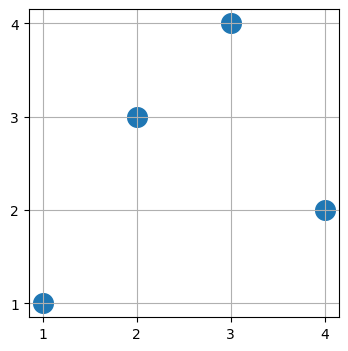

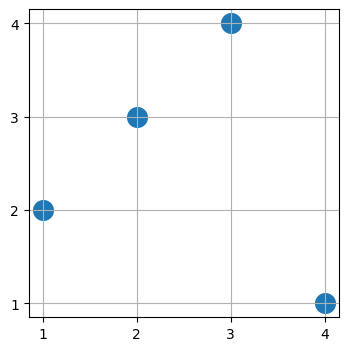

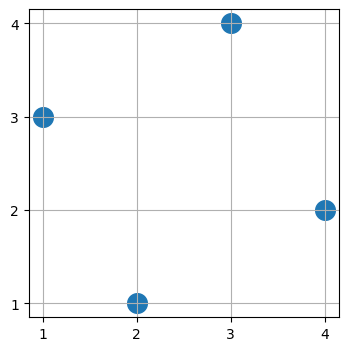

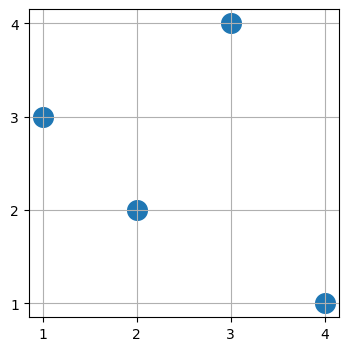

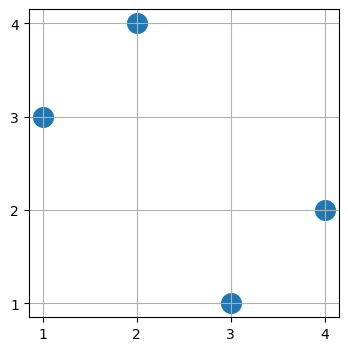

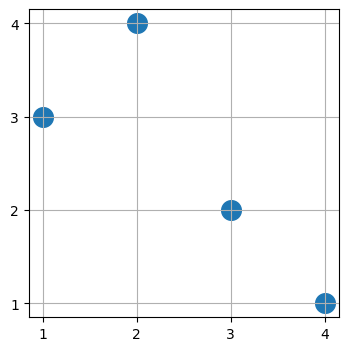

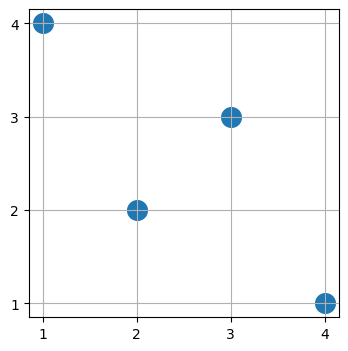

In [ ]:
plotPermutations(conjure_solutions)

## Boxed Mesh avoidance
We say that a permutation $\sigma$ avoids a boxed mesh pattern $(\pi,R)$ if $\sigma$ classically avoids $\pi$ or for each occurence of $\pi$ in $\sigma$ one or more of the other box mesh pattern constraints are violated.

For example the boxed pattern $231$ is avoided by the permutation $465123$.

In [24]:
length = 4
boxed_mesh_avoidance = [ [2,3,1] ]


In [25]:
%%conjure --number-of-solutions=all --solver=minion

$ This of mesh patterns to avoid
given boxed_mesh_avoidance : set of sequence(injective) of int

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ av is the pattern, mesh is the mesh as a relation
    forAll av in boxed_mesh_avoidance .
    $ Build the inverse of 'av'. This is completely evaluated before solving.
    exists avinv: matrix indexed by [int(0..|av|+1)] of int(0..|av|+1),
                avinv[0] = 0 /\ avinv[|av|+1] = |av|+1 /\
                (forAll i: int(1..|av|) . avinv[av(i)] = i).
        $ Look for all places where the pattern can occur
        forAll ix : matrix indexed by [int(0..|av|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|av|+1]=length+1
                , forAll i : int(0..|av|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|av|) , n1 < n2 .
                    av(n1) < av(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            (
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists i : int(1..|av|-1) .
                exists j : int(1..|av|-1) .
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[avinv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[avinv[j+1]]])
            )


```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5}}, {"perm": [1, 2, 4, 3], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 4, "4": 3, "5": 5}}, {"perm": [1, 3, 2, 4], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 2, "4": 4, "5": 5}}, {"perm": [1, 4, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 2, "4": 3, "5": 5}}, {"perm": [1, 4, 3, 2], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 3, "4": 2, "5": 5}}, {"perm": [2, 1, 3, 4], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 3, "4": 4, "5": 5}}, {"perm": [2, 1, 4, 3], "permPadded": {"0": 0, "1": 2, "2": 1, "3": 4, "4": 3, "5": 5}}, {"perm": [3, 1, 2, 4], "permPadded": {"0": 0, "1": 3, "2": 1, "3": 2, "4": 4, "5": 5}}, {"perm": [3, 2, 1, 4], "permPadded": {"0": 0, "1": 3, "2": 2, "3": 1, "4": 4, "5": 5}}, {"perm": [4, 1, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 2, "4": 3, "5": 5}}, {"perm": [4, 1, 3, 2], "permPadded": {"0": 0, "1": 4, "2": 1, "3": 3, "4": 2, "5": 5}}, {"perm": [4, 2, 1, 3], "permPadded": {"0": 0, "1": 4, "2": 2, "3": 1, "4": 3, "5": 5}}, {"perm": [4, 3, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 1, "4": 2, "5": 5}}, {"perm": [4, 3, 2, 1], "permPadded": {"0": 0, "1": 4, "2": 3, "3": 2, "4": 1, "5": 5}}]}
```

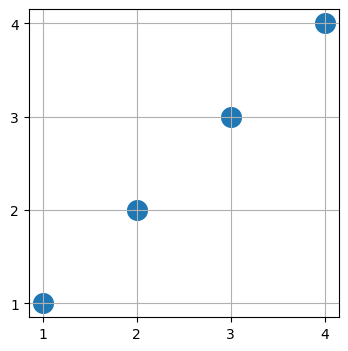

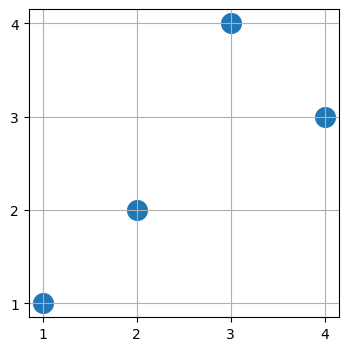

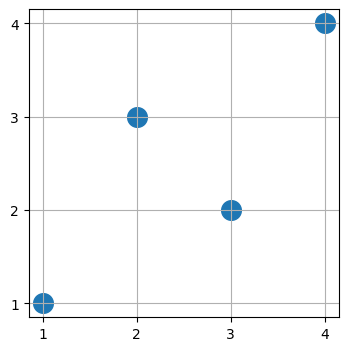

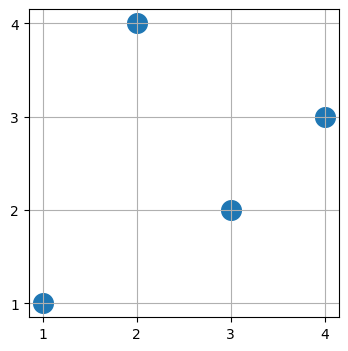

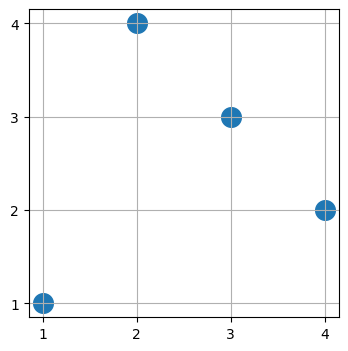

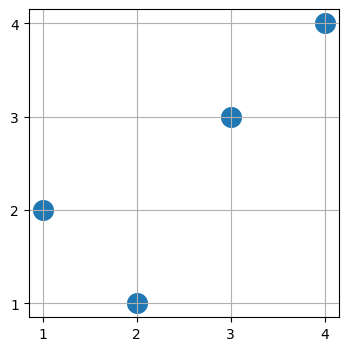

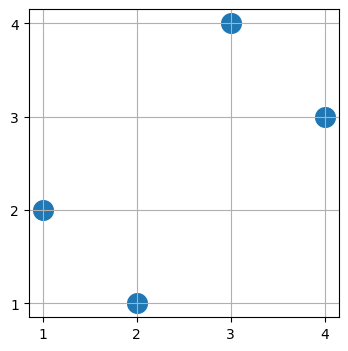

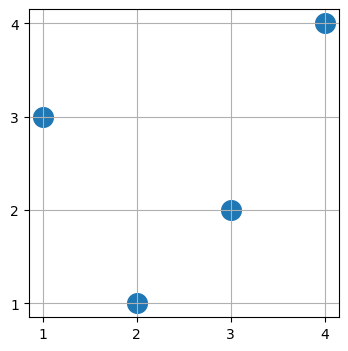

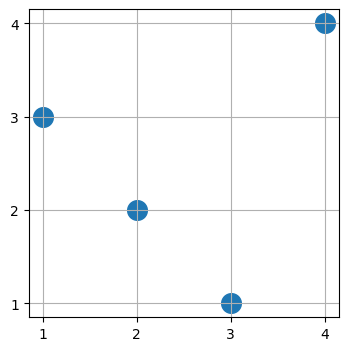

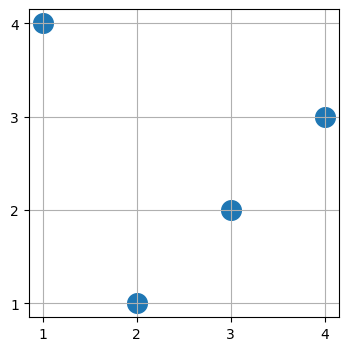

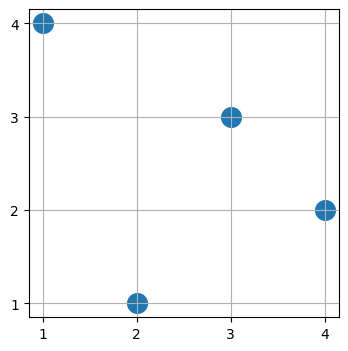

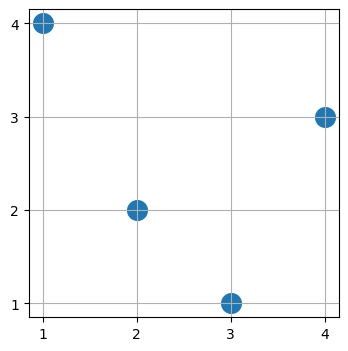

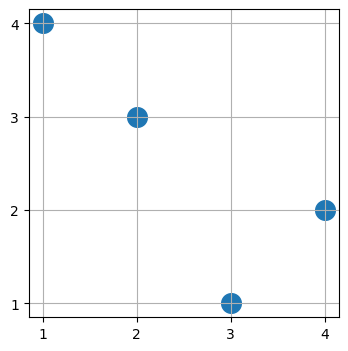

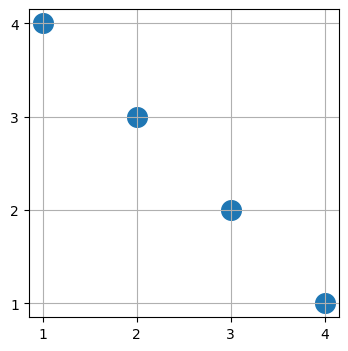

In [27]:
# Using the helper function from the very top here to illustrate the solutions.
plotPermutations(conjure_solutions)

## Consecutive containment

*Consecutive patterns* are a special case of vincular patterns, where it is necessary that *all* entries are adjacent. So the pattern is always $(\pi,\{1,\ldots,|\pi|-1\})$.

For example, the consecutive pattern $(312,\{1,2\})$ can be found inside $152463$ as the subsequence $524$.

In [28]:
length = 4
consecutive_containment = [ [3,1,2] ]

In [29]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given consecutive_containment : set of sequence (injective) of int

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll pattern in consecutive_containment .
        exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length)

            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            (forAll bar : int(1..|pattern|-1) . ix[bar] + 1 = ix[bar+1])



```json
{"conjure_solutions": [{"perm": [1, 4, 2, 3]}, {"perm": [2, 4, 1, 3]}, {"perm": [3, 1, 2, 4]}, {"perm": [3, 4, 1, 2]}, {"perm": [4, 1, 2, 3]}, {"perm": [4, 1, 3, 2]}, {"perm": [4, 2, 3, 1]}, {"perm": [4, 3, 1, 2]}]}
```

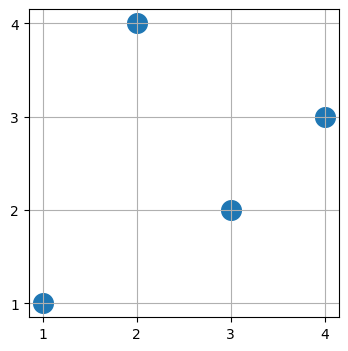

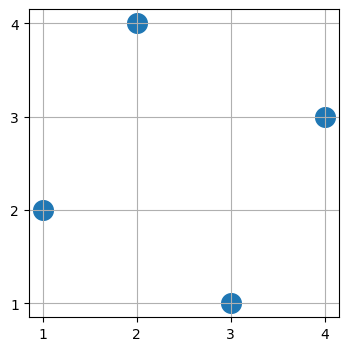

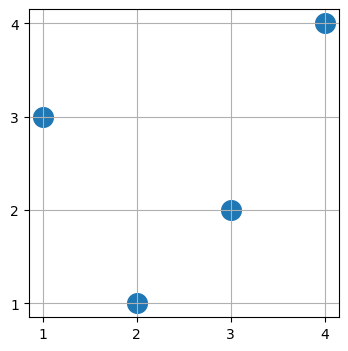

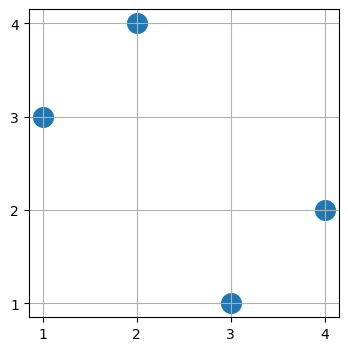

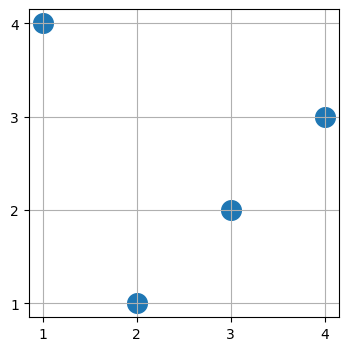

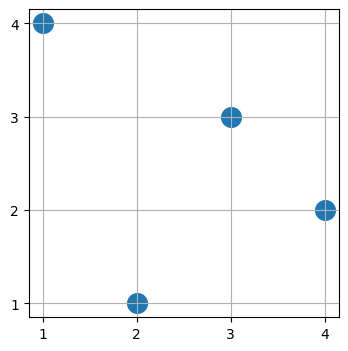

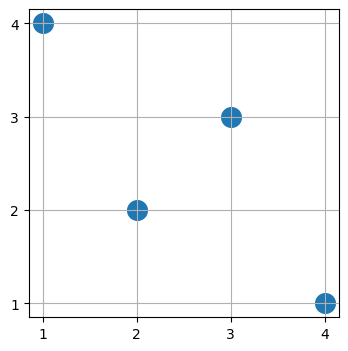

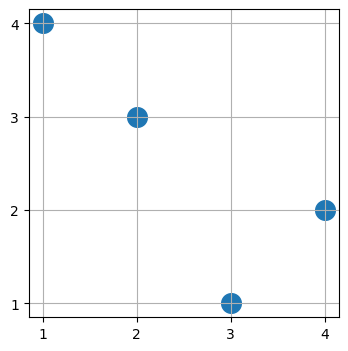

In [30]:
plotPermutations(conjure_solutions)

## Consecutive avoidance

A permutation $\sigma$ avoids a consecutive pattern $(\pi,\{1,\ldots,|\pi|-1\})$ if it either classically avoids $\pi$ or for all occurences of $\pi$ in $\sigma$ none are a contiguious subsequence of $\sigma$.

For example, the permutation $416325$ avoids the consecutive pattern $\underline{312}$.

In [31]:
length = 4
consecutive_avoidance = [ [3,1,2] ]

In [32]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given consecutive_avoidance : set of sequence (injective) of int

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll pattern in consecutive_avoidance .
        forAll ix : matrix indexed by [int(1..|pattern|)] of int(1..length)

            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            !(forAll bar : int(1..|pattern|-1) . ix[bar] + 1 = ix[bar+1])


```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4]}, {"perm": [1, 2, 4, 3]}, {"perm": [1, 3, 2, 4]}, {"perm": [1, 3, 4, 2]}, {"perm": [1, 4, 3, 2]}, {"perm": [2, 1, 3, 4]}, {"perm": [2, 1, 4, 3]}, {"perm": [2, 3, 1, 4]}, {"perm": [2, 3, 4, 1]}, {"perm": [2, 4, 3, 1]}, {"perm": [3, 1, 4, 2]}, {"perm": [3, 2, 1, 4]}, {"perm": [3, 2, 4, 1]}, {"perm": [3, 4, 2, 1]}, {"perm": [4, 2, 1, 3]}, {"perm": [4, 3, 2, 1]}]}
```

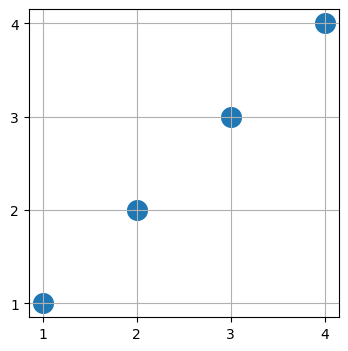

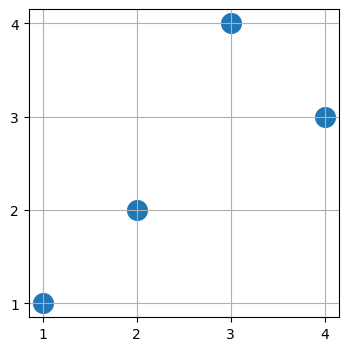

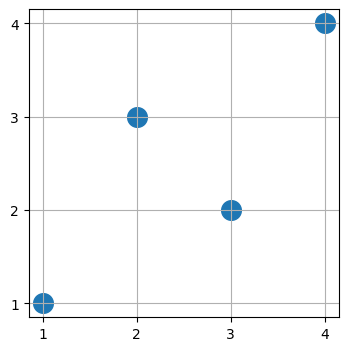

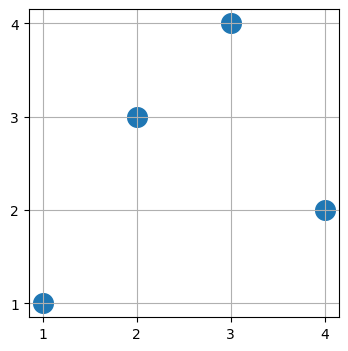

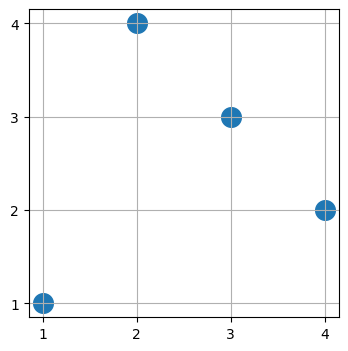

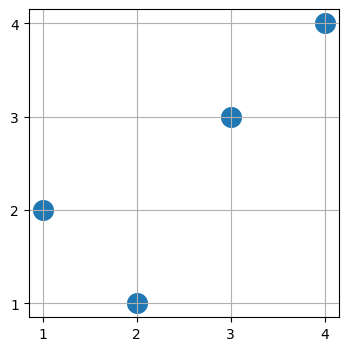

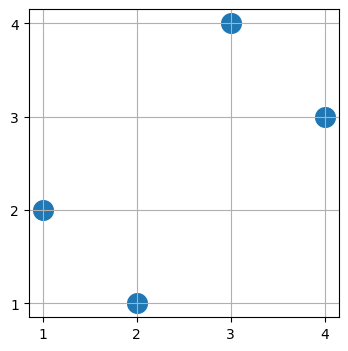

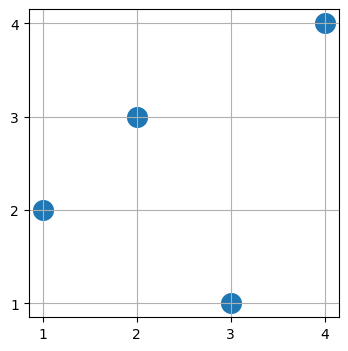

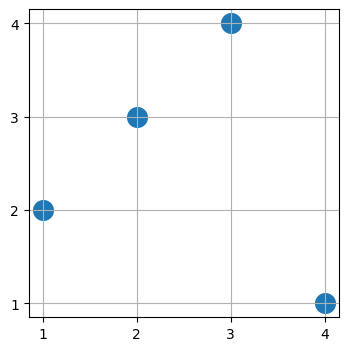

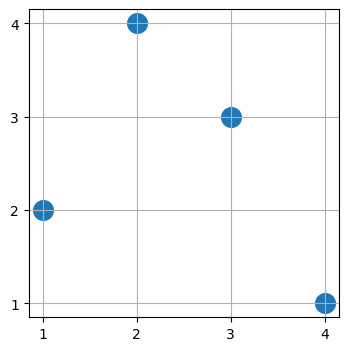

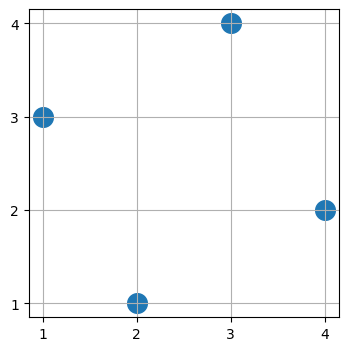

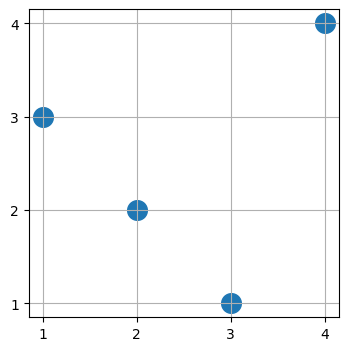

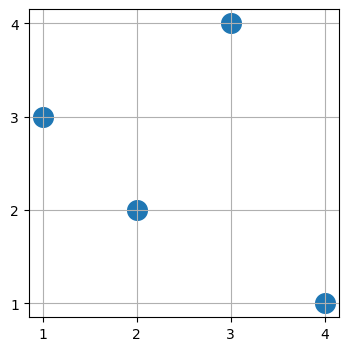

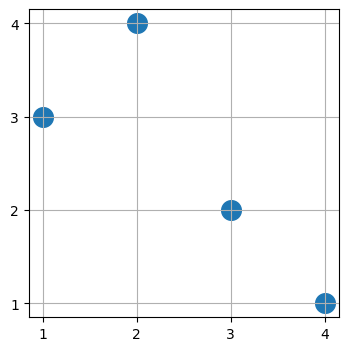

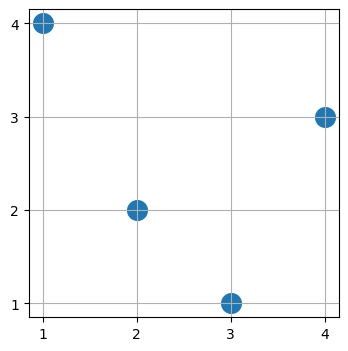

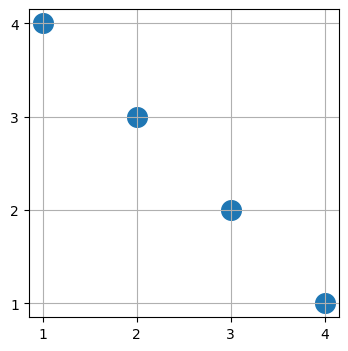

In [ ]:
plotPermutations(conjure_solutions)

# Permutation properties

We have 8 permutation properties and have turned 5 statistics about permutations into properties as well.


## Simple permutation

An *interval* of a permutation $\pi$ corresponds to a set of contiguous indices $I = [a, b]$ such that the set of values $\pi(I) = \{\pi(i) : i \in I\}$ is also contiguous.
Every permutation of length $n$ has intervals of lengths 0, 1 and $n$.
If a permutation $\pi$ has no other intervals, then $\pi$ is said to be *simple*.

For example the permutation $251364$ is simple, but the permutation $635241$ is not as $63524$ or $3524$ are intervals (amongst others).

In [39]:
length = 4

In [40]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ Simple permutations do not contain intervals.
$ An interval is a set of contiguous indices such that the values are also contiguous.

$ perm is a simple permutation
such that
   and ( [ max(subperm) - min(subperm) + 1 != |subperm|          $ the values are not contiguous
    | i : int(1..length)                                    $ start index of the sub perm
    , j : int(1..length)                                    $ end index of the sub perm
    , i < j                                                 $ start comes before end
    , (i,j) != (1,length)                                   $ it's not the full permutation
    , letting subperm be [perm(k) | k : int(i..j)]          $ give the sub perm a name
    ])


```json
{"conjure_solutions": [{"perm": [2, 4, 1, 3]}, {"perm": [3, 1, 4, 2]}]}
```

## Block-wise simple

A permutation $\pi\in S_n$ is *block-wise simple* if and only if it has no interval (including the full permutation) which can be decomposed into $12[\alpha_1,\alpha_2]$ or $21[\alpha_1,\alpha_2]$.

In [36]:
length = 4

In [38]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

such that
    [ and([ max([ perm(i) | i : int(start..middle) ]) > min([ perm(i) | i : int(middle+1..end) ])
          , min([ perm(i) | i : int(start..middle) ]) < max([ perm(i) | i : int(middle+1..end) ])
          $ , forAll i : int(1..start-1) . perm(i) < minSE \/ perm(i) > maxSE
          $ , forAll i : int(end+1..length) . perm(i) < minSE \/ perm(i) > maxSE
          ])
    | start, middle, end : int(1..length)
    , start <= middle
    , middle < end
    , letting minSE be min([ perm(i) | i : int(start..end) ])
    , letting maxSE be max([ perm(i) | i : int(start..end) ])
    , maxSE - minSE = end - start
    ]

```json
{"conjure_solutions": [{"perm": [2, 4, 1, 3]}, {"perm": [3, 1, 4, 2]}]}
```

## Plus-decomposable

Given a permutation $\sigma=\sigma(1)\ldots\sigma(m)$ of length $m$ and non-empty permutations $\alpha_{1},\ldots,\alpha_{m}$ the *inflation* of $\sigma$ by $\alpha_{1},\ldots,\alpha_{m}$, written as $\sigma[\alpha_{1},\ldots,\alpha_{m}]$, is the unique permutation obtained by replacing each entry $\sigma(i)$ by an interval that is order isomorphic to $\alpha_{i}$, where the relative ordering of the intervals corresponds to the ordering of the entries of $\sigma$. Conversely, a *block-decomposition* or *deflation* of a permutation $\pi$ is any expression of $\pi$ written as an inflation $\pi=\sigma[\alpha_{1},\ldots,\alpha_{m}]$.

A permutation $\pi$ is *plus-decomposable* if it has a deflation of the form $\pi = 12 [\alpha_1,\alpha_2]$ for non-empty permutations $\alpha_1$ and $\alpha_2$.

For example $213654$ is a plus-decomposable permutation.
But $546123$ (which is minus-decomposable) or $236145$ (which is not simple) are not.

In [41]:
length = 4

In [42]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ perm is plus-decomposable
such that
    exists sep : int(1..length-1) .
        max([ perm(i) | i : int(1..sep) ]) < min([ perm(i) | i : int(sep+1..length) ])


```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4]}, {"perm": [1, 2, 4, 3]}, {"perm": [1, 3, 2, 4]}, {"perm": [1, 3, 4, 2]}, {"perm": [1, 4, 2, 3]}, {"perm": [1, 4, 3, 2]}, {"perm": [2, 1, 3, 4]}, {"perm": [2, 1, 4, 3]}, {"perm": [2, 3, 1, 4]}, {"perm": [3, 1, 2, 4]}, {"perm": [3, 2, 1, 4]}]}
```

## Minus-decomposable

A permutation $\pi$ is *minus-decomposable* if it has a deflation of the form $\pi = 21 [\alpha_1,\alpha_2]$ for non-empty permutations $\alpha_1$ and $\alpha_2$.

For example $546123$ is a minus-decomposable permutation.
But $213654$ (which is plus-decomposable) or $236145$ (which is not simple) are not.



In [43]:
length = 4

In [44]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ perm is minus-decomposable
such that
    exists sep : int(1..length-1) .
        min([ perm(i) | i : int(1..sep) ]) > max([ perm(i) | i : int(sep+1..length) ])


```json
{"conjure_solutions": [{"perm": [2, 3, 4, 1]}, {"perm": [2, 4, 3, 1]}, {"perm": [3, 2, 4, 1]}, {"perm": [3, 4, 1, 2]}, {"perm": [3, 4, 2, 1]}, {"perm": [4, 1, 2, 3]}, {"perm": [4, 1, 3, 2]}, {"perm": [4, 2, 1, 3]}, {"perm": [4, 2, 3, 1]}, {"perm": [4, 3, 1, 2]}, {"perm": [4, 3, 2, 1]}]}
```

## Involution

A permutation $\pi\in S_n$ is called an *involution*, if $\pi=\pi^{-1}$.

A permutation is an involution precisely if and only if it can be written as a finite product of disjoint transpositions.

$1243=(12)(43)$ is an involution but $2431=(124)(3)=(12)(24)(41)(3)$ is not.

In [45]:
length = 4

In [46]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ perm is an involution
$ perm * perm = id
such that
    forAll i : int(1..length) .
        perm(perm(i)) = i


```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4]}, {"perm": [1, 2, 4, 3]}, {"perm": [1, 3, 2, 4]}, {"perm": [1, 4, 3, 2]}, {"perm": [2, 1, 3, 4]}, {"perm": [2, 1, 4, 3]}, {"perm": [3, 2, 1, 4]}, {"perm": [3, 4, 1, 2]}, {"perm": [4, 2, 3, 1]}, {"perm": [4, 3, 2, 1]}]}
```

In [ ]:
# testing

for sol in conjure_solutions:
    perm = sol["perm"]
    for i in range(1, length+1):
        iVal = perm[i-1] # applied once
        iValVal = perm[iVal-1] # applied twice
        if i != iValVal:
            print("Not an involution:", perm)
            break


## Derangement


A *derangement* is a permutation with no fixed point. Which means that in each index the value of the element is not equal to the index value, so $\pi(i)\neq i$.

$4312$ is a derangement whereas $1234$ is not.

In [56]:
length = 4

In [57]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

such that
    forAll i : int(1..length) .
        perm(i) != i


```json
{"conjure_solutions": [{"perm": [2, 1, 4, 3]}, {"perm": [2, 3, 4, 1]}, {"perm": [2, 4, 1, 3]}, {"perm": [3, 1, 4, 2]}, {"perm": [3, 4, 1, 2]}, {"perm": [3, 4, 2, 1]}, {"perm": [4, 1, 2, 3]}, {"perm": [4, 3, 1, 2]}, {"perm": [4, 3, 2, 1]}]}
```

In [58]:
# testing

for sol in conjure_solutions:
    perm = sol["perm"]
    for i in range(1, length+1):
        iVal = perm[i-1] # applied once
        if i == iVal:
            print("Not a derangement:", perm)
            break


## Non-derangement

A *nonderangement* is a permutation with at least one fixed
point. i.e. there is at least one $i$ such that $\pi(i)=i$.

$2431$ is a non-derangement whereas $4321$ is not.

In [49]:
length = 4

In [50]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

such that
    exists i : int(1..length) .
        perm(i) = i


```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4]}, {"perm": [1, 2, 4, 3]}, {"perm": [1, 3, 2, 4]}, {"perm": [1, 3, 4, 2]}, {"perm": [1, 4, 2, 3]}, {"perm": [1, 4, 3, 2]}, {"perm": [2, 1, 3, 4]}, {"perm": [2, 3, 1, 4]}, {"perm": [2, 4, 3, 1]}, {"perm": [3, 1, 2, 4]}, {"perm": [3, 2, 1, 4]}, {"perm": [3, 2, 4, 1]}, {"perm": [4, 1, 3, 2]}, {"perm": [4, 2, 1, 3]}, {"perm": [4, 2, 3, 1]}]}
```

In [52]:
# testing to see that our results are correct

for sol in conjure_solutions:
    perm = sol["perm"]
    if any([i == perm[i-1] for i in range(1, length+1)]):
        # it is a non-derangement
        pass
    else:
        print("Not a non-derangement:", perm)

## Parity
A permutation $\pi$ is called a parity permutation if and only if for all $i$, if $i$ is odd then $\pi(i)$ is odd too and if $i$ is even then $\pi(i)$ is even.

In [53]:
length = 4

In [54]:
%%conjure --number-of-solutions=all --solver=minion
given length : int
find perm : sequence (size length, injective) of int(1..length)

$ parity permutation
$ perm(i) is odd if i is odd, perm(i) is even if i is even.

such that
    forAll i : int(1..length) .
        (perm(i) % 2) = i % 2

```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4]}, {"perm": [1, 4, 3, 2]}, {"perm": [3, 2, 1, 4]}, {"perm": [3, 4, 1, 2]}]}
```

## $n$ inversions

An *inversion* in a permutation is a pair of numbers such that the larger number appears to the left of the smaller one in the permutation. The formal definition of inversions is in the Permutation Statistics Section. We can (and have) turn statistics into properties by limiting how many of the statistic (in this case the number of inversions) exactly have to occur in a permutation.

In [59]:
length = 4
nInversions = 6

In [60]:
%%conjure --number-of-solutions=all --solver=minion
given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
given nInversions : int
such that
    nInversions =
        sum([ 1
            | i,j : int(1..length)
            , i < j
            , perm(i) > perm(j)
            ])

```json
{"perm": [4, 3, 2, 1]}
```

## $n$ descents
A *descent* in a permutation occurs at an index $i$ in which the value is higher than at index $i+1$.
The formal definition of descent is in the Permutation Statistics Section. We can (and have) turn statistics into properties by limiting how many of the statistic (in this case the number of descents) exactly have to occur in a permutation.

In [61]:
length = 4
nDescents = 1

In [62]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ descent count
given nDescents : int
such that
    nDescents =
        sum([ 1
            | i : int(1..length-1)
            , perm(i) > perm(i+1)
            ])


```json
{"conjure_solutions": [{"perm": [1, 2, 4, 3]}, {"perm": [1, 3, 2, 4]}, {"perm": [1, 3, 4, 2]}, {"perm": [1, 4, 2, 3]}, {"perm": [2, 1, 3, 4]}, {"perm": [2, 3, 1, 4]}, {"perm": [2, 3, 4, 1]}, {"perm": [2, 4, 1, 3]}, {"perm": [3, 1, 2, 4]}, {"perm": [3, 4, 1, 2]}, {"perm": [4, 1, 2, 3]}]}
```

## $n$ ascents
An *ascent* in a permutation occurs at an index $i$ in which the value is lower than the value at index $i+1$.
The formal definition of ascent is in the Permutation Statistics Section. We can (and have) turn statistics into properties by limiting how many of the statistic (in this case the number of ascents) exactly have to occur in a permutation.

In [63]:
length = 4
nAscents = 1

In [64]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
given nAscents : int
such that
    nAscents =
        sum([ 1
            | i : int(1..length-1)
            , perm(i) < perm(i+1)
            ])


```json
{"conjure_solutions": [{"perm": [1, 4, 3, 2]}, {"perm": [2, 1, 4, 3]}, {"perm": [2, 4, 3, 1]}, {"perm": [3, 1, 4, 2]}, {"perm": [3, 2, 1, 4]}, {"perm": [3, 2, 4, 1]}, {"perm": [3, 4, 2, 1]}, {"perm": [4, 1, 3, 2]}, {"perm": [4, 2, 1, 3]}, {"perm": [4, 2, 3, 1]}, {"perm": [4, 3, 1, 2]}]}
```

## $n$ excedenaces

An *excedenace* in a permutation occurs is a value at index $i$ which is larger than the index.
The formal definition of excedenaces is in the Permutation Statistics Section. We can (and have) turn statistics into properties by limiting how many of the statistic (in this case the number of excedenaces) exactly have to occur in a permutation.

In [65]:
length = 4
nExcedances = 1

In [66]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
given nExcedances : int
such that
    nExcedances =
        sum([ 1
            | i : int(1..length)
            , perm(i) > i
            ])

```json
{"conjure_solutions": [{"perm": [1, 2, 4, 3]}, {"perm": [1, 3, 2, 4]}, {"perm": [1, 4, 2, 3]}, {"perm": [1, 4, 3, 2]}, {"perm": [2, 1, 3, 4]}, {"perm": [3, 1, 2, 4]}, {"perm": [3, 2, 1, 4]}, {"perm": [4, 1, 2, 3]}, {"perm": [4, 1, 3, 2]}, {"perm": [4, 2, 1, 3]}, {"perm": [4, 2, 3, 1]}]}
```

## $n$ Major Index

The *Major Index* is sum of the positions of the descents in a permutation.
The formal definition of Major Index is in the Permutation Statistics Section. We can (and have) turn statistics into properties by limiting how many of the statistic (in this case the number of Major Index) exactly have to occur in a permutation.

In [67]:
length = 4
nMajorIndex = 1

In [68]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the major index
given nMajorIndex : int
such that
    nMajorIndex =
        sum([ i
            | i : int(1..length-1)
            , perm(i) > perm(i+1)
            ])

```json
{"conjure_solutions": [{"perm": [2, 1, 3, 4]}, {"perm": [3, 1, 2, 4]}, {"perm": [4, 1, 2, 3]}]}
```

# Permutation Statistics

We support 5 different statistics in permutations.
The solver will report the statistic alongside the permutation.
If there are no other constraints provided the solver will produce all permutations (as in our models below in this section).

## Number of inversions

inv$(\sigma) = |\{(i,j): i < j \text{ and } \sigma(i) > \sigma(j)\}|$

In [69]:
length = 4

In [70]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
find inversionCount : int(0..length**2) $ upper bound is not tight
such that
    inversionCount =
        sum([ 1
            | i,j : int(1..length)
            , i < j
            , perm(i) > perm(j)
            ])


```json
{"conjure_solutions": [{"inversionCount": 0, "perm": [1, 2, 3, 4]}, {"inversionCount": 1, "perm": [1, 2, 4, 3]}, {"inversionCount": 1, "perm": [1, 3, 2, 4]}, {"inversionCount": 2, "perm": [1, 3, 4, 2]}, {"inversionCount": 2, "perm": [1, 4, 2, 3]}, {"inversionCount": 3, "perm": [1, 4, 3, 2]}, {"inversionCount": 1, "perm": [2, 1, 3, 4]}, {"inversionCount": 2, "perm": [2, 1, 4, 3]}, {"inversionCount": 2, "perm": [2, 3, 1, 4]}, {"inversionCount": 3, "perm": [2, 3, 4, 1]}, {"inversionCount": 3, "perm": [2, 4, 1, 3]}, {"inversionCount": 4, "perm": [2, 4, 3, 1]}, {"inversionCount": 2, "perm": [3, 1, 2, 4]}, {"inversionCount": 3, "perm": [3, 1, 4, 2]}, {"inversionCount": 3, "perm": [3, 2, 1, 4]}, {"inversionCount": 4, "perm": [3, 2, 4, 1]}, {"inversionCount": 4, "perm": [3, 4, 1, 2]}, {"inversionCount": 5, "perm": [3, 4, 2, 1]}, {"inversionCount": 3, "perm": [4, 1, 2, 3]}, {"inversionCount": 4, "perm": [4, 1, 3, 2]}, {"inversionCount": 4, "perm": [4, 2, 1, 3]}, {"inversionCount": 5, "perm": [4, 2, 3, 1]}, {"inversionCount": 5, "perm": [4, 3, 1, 2]}, {"inversionCount": 6, "perm": [4, 3, 2, 1]}]}
```

## Number of descents

des$(\sigma) = |\{i : \sigma(i) > \sigma(i + 1)\}|$

In [71]:
length = 4

In [72]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the descent count
find descentCount : int(0..length)
such that
    descentCount =
        sum([ 1
            | i : int(1..length-1)
            , perm(i) > perm(i+1)
            ])


```json
{"conjure_solutions": [{"descentCount": 0, "perm": [1, 2, 3, 4]}, {"descentCount": 1, "perm": [1, 2, 4, 3]}, {"descentCount": 1, "perm": [1, 3, 2, 4]}, {"descentCount": 1, "perm": [1, 3, 4, 2]}, {"descentCount": 1, "perm": [1, 4, 2, 3]}, {"descentCount": 2, "perm": [1, 4, 3, 2]}, {"descentCount": 1, "perm": [2, 1, 3, 4]}, {"descentCount": 2, "perm": [2, 1, 4, 3]}, {"descentCount": 1, "perm": [2, 3, 1, 4]}, {"descentCount": 1, "perm": [2, 3, 4, 1]}, {"descentCount": 1, "perm": [2, 4, 1, 3]}, {"descentCount": 2, "perm": [2, 4, 3, 1]}, {"descentCount": 1, "perm": [3, 1, 2, 4]}, {"descentCount": 2, "perm": [3, 1, 4, 2]}, {"descentCount": 2, "perm": [3, 2, 1, 4]}, {"descentCount": 2, "perm": [3, 2, 4, 1]}, {"descentCount": 1, "perm": [3, 4, 1, 2]}, {"descentCount": 2, "perm": [3, 4, 2, 1]}, {"descentCount": 1, "perm": [4, 1, 2, 3]}, {"descentCount": 2, "perm": [4, 1, 3, 2]}, {"descentCount": 2, "perm": [4, 2, 1, 3]}, {"descentCount": 2, "perm": [4, 2, 3, 1]}, {"descentCount": 2, "perm": [4, 3, 1, 2]}, {"descentCount": 3, "perm": [4, 3, 2, 1]}]}
```

In [ ]:
for p in conjure_solutions:
  print(p["descentCount"])

0
1
1
1
1
2
1
2
1
1
1
2
1
2
2
2
1
2
1
2
2
2
2
3


## Number of ascents

asc$(\sigma) = |\{i : \sigma(i) < \sigma(i + 1)\}|$

In [73]:
length = 3

In [74]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
find ascentCount : int(0..length)
such that
    ascentCount =
        sum([ 1
            | i : int(1..length-1)
            , perm(i) < perm(i+1)
            ])


```json
{"conjure_solutions": [{"ascentCount": 2, "perm": [1, 2, 3]}, {"ascentCount": 1, "perm": [1, 3, 2]}, {"ascentCount": 1, "perm": [2, 1, 3]}, {"ascentCount": 1, "perm": [2, 3, 1]}, {"ascentCount": 1, "perm": [3, 1, 2]}, {"ascentCount": 0, "perm": [3, 2, 1]}]}
```

## Number of excedances

exc$(\sigma) = |\{i : \sigma(i) > i\}|$

In [75]:
length = 3

In [76]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
find excedanceCount : int(0..length)
such that
    excedanceCount =
        sum([ 1
            | i : int(1..length)
            , perm(i) > i
            ])


```json
{"conjure_solutions": [{"excedanceCount": 0, "perm": [1, 2, 3]}, {"excedanceCount": 1, "perm": [1, 3, 2]}, {"excedanceCount": 1, "perm": [2, 1, 3]}, {"excedanceCount": 2, "perm": [2, 3, 1]}, {"excedanceCount": 1, "perm": [3, 1, 2]}, {"excedanceCount": 1, "perm": [3, 2, 1]}]}
```

## Major Index
The sum of the positions of the descents.

maj$(\sigma) = \sum_{\sigma(i)>\sigma(i+1)} i$

In [77]:
length = 3

In [78]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
find majorIndex : int(0..length**2)
such that
    majorIndex =
        sum([ i
            | i : int(1..length-1)
            , perm(i) > perm(i+1)
            ])


```json
{"conjure_solutions": [{"majorIndex": 0, "perm": [1, 2, 3]}, {"majorIndex": 2, "perm": [1, 3, 2]}, {"majorIndex": 1, "perm": [2, 1, 3]}, {"majorIndex": 2, "perm": [2, 3, 1]}, {"majorIndex": 1, "perm": [3, 1, 2]}, {"majorIndex": 3, "perm": [3, 2, 1]}]}
```

# Hypothetical Example
Find all permutations of length 5 which

1. avoid ($\{1324,(213,(0,0),(0,1),(1,0),(1,0))\}$)
2. contain ($\{132,(123,(1,2),(2,1),(1,3),(3,1))\}$)
3. are minus-decomposable
4. and are involutions.


In [100]:
length = 5
classic_avoidance = [ [1,3,2,4] ]
mesh_avoidance = [ [ [2,1,3], [ [0,0] , [0,1] , [1,0] , [1,1] ] ] ]

## Step 1
Avoid $1324$ and $(213,(0,0),(0,1),(1,0),(1,0))$

In [101]:
%%conjure --number-of-solutions=all --solver=minion

given length : int

given classic_avoidance : set of sequence of int
given mesh_avoidance : set of (sequence(injective) of int, relation of (int * int))

find perm : sequence (size length, injective) of int(1..length)

$ Mesh Setup
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

$ Classic Avoidance
such that
    forAll pattern in classic_avoidance .
        !(exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length) .
            (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2])))

$$ Mesh Avoidance
such that
    $ pattern is the pattern, mesh is the mesh as a relation
    forAll (pattern, mesh) in mesh_avoidance .
    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).
        $ Look for all places where the pattern can occur
        forAll ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            (
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists (i,j) in mesh.
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[patterninv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[patterninv[j+1]]])
            )

```json
{"conjure_solutions": [{"perm": [1, 2, 3, 4, 5], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6}}, {"perm": [1, 2, 3, 5, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 3, "4": 5, "5": 4, "6": 6}}, {"perm": [1, 2, 4, 5, 3], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 4, "4": 5, "5": 3, "6": 6}}, {"perm": [1, 2, 5, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 5, "4": 3, "5": 4, "6": 6}}, {"perm": [1, 2, 5, 4, 3], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 5, "4": 4, "5": 3, "6": 6}}, {"perm": [1, 3, 4, 5, 2], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 4, "4": 5, "5": 2, "6": 6}}, {"perm": [1, 3, 5, 4, 2], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 5, "4": 4, "5": 2, "6": 6}}, {"perm": [1, 4, 5, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 5, "4": 2, "5": 3, "6": 6}}, {"perm": [1, 4, 5, 3, 2], "permPadded": {"0": 0, "1": 1, "2": 4, "3": 5, "4": 3, "5": 2, "6": 6}}, {"perm": [1, 5, 2, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 2, "4": 3, "5": 4, "6": 6}}, {"perm": [1, 5, 2, 4, 3], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 2, "4": 4, "5": 3, "6": 6}}, {"perm": [1, 5, 3, 4, 2], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 3, "4": 4, "5": 2, "6": 6}}, {"perm": [1, 5, 4, 2, 3], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 4, "4": 2, "5": 3, "6": 6}}, {"perm": [1, 5, 4, 3, 2], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 4, "4": 3, "5": 2, "6": 6}}, {"perm": [2, 3, 4, 5, 1], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 4, "4": 5, "5": 1, "6": 6}}, {"perm": [2, 3, 5, 4, 1], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 5, "4": 4, "5": 1, "6": 6}}, {"perm": [2, 4, 5, 3, 1], "permPadded": {"0": 0, "1": 2, "2": 4, "3": 5, "4": 3, "5": 1, "6": 6}}, {"perm": [2, 5, 3, 4, 1], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 3, "4": 4, "5": 1, "6": 6}}, {"perm": [2, 5, 4, 3, 1], "permPadded": {"0": 0, "1": 2, "2": 5, "3": 4, "4": 3, "5": 1, "6": 6}}, {"perm": [3, 4, 5, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 5, "4": 1, "5": 2, "6": 6}}, {"perm": [3, 4, 5, 2, 1], "permPadded": {"0": 0, "1": 3, "2": 4, "3": 5, "4": 2, "5": 1, "6": 6}}, {"perm": [3, 5, 4, 1, 2], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 4, "4": 1, "5": 2, "6": 6}}, {"perm": [3, 5, 4, 2, 1], "permPadded": {"0": 0, "1": 3, "2": 5, "3": 4, "4": 2, "5": 1, "6": 6}}, {"perm": [4, 5, 1, 2, 3], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 1, "4": 2, "5": 3, "6": 6}}, {"perm": [4, 5, 1, 3, 2], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 1, "4": 3, "5": 2, "6": 6}}, {"perm": [4, 5, 2, 3, 1], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 2, "4": 3, "5": 1, "6": 6}}, {"perm": [4, 5, 3, 1, 2], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 3, "4": 1, "5": 2, "6": 6}}, {"perm": [4, 5, 3, 2, 1], "permPadded": {"0": 0, "1": 4, "2": 5, "3": 3, "4": 2, "5": 1, "6": 6}}, {"perm": [5, 1, 2, 3, 4], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 2, "4": 3, "5": 4, "6": 6}}, {"perm": [5, 1, 2, 4, 3], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 2, "4": 4, "5": 3, "6": 6}}, {"perm": [5, 1, 3, 4, 2], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 3, "4": 4, "5": 2, "6": 6}}, {"perm": [5, 1, 4, 2, 3], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 4, "4": 2, "5": 3, "6": 6}}, {"perm": [5, 1, 4, 3, 2], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 4, "4": 3, "5": 2, "6": 6}}, {"perm": [5, 2, 3, 4, 1], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 3, "4": 4, "5": 1, "6": 6}}, {"perm": [5, 2, 4, 3, 1], "permPadded": {"0": 0, "1": 5, "2": 2, "3": 4, "4": 3, "5": 1, "6": 6}}, {"perm": [5, 3, 4, 1, 2], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 4, "4": 1, "5": 2, "6": 6}}, {"perm": [5, 3, 4, 2, 1], "permPadded": {"0": 0, "1": 5, "2": 3, "3": 4, "4": 2, "5": 1, "6": 6}}, {"perm": [5, 4, 1, 2, 3], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 1, "4": 2, "5": 3, "6": 6}}, {"perm": [5, 4, 1, 3, 2], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 1, "4": 3, "5": 2, "6": 6}}, {"perm": [5, 4, 2, 3, 1], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 2, "4": 3, "5": 1, "6": 6}}, {"perm": [5, 4, 3, 1, 2], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 3, "4": 1, "5": 2, "6": 6}}, {"perm": [5, 4, 3, 2, 1], "permPadded": {"0": 0, "1": 5, "2": 4, "3": 3, "4": 2, "5": 1, "6": 6}}]}
```

In [102]:
print(len(conjure_solutions))
# We DO NOT recommend running this loop!
# for p in conjure_solutions:
#  plotPermutation(p["perm"])

42


## Step 2

Contain $132$ and $(123,(1,2),(2,1),(1,3),(3,1))$.


In [103]:
classic_containment = [ [1,3,2] ]
mesh_containment = [ [ [1,2,3] , [ [1,2] , [2,1] , [1,3] , [3,1] ] ] ]

In [104]:
%%conjure+ --number-of-solutions=all --solver=minion

given classic_containment : set of sequence of int
given mesh_containment : set of (sequence(injective) of int, relation of (int * int))

$ Classic containment
such that
    forAll pattern in classic_containment .
         (exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length) .
            (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2])))

$ Mesh Containment
such that
    $ pattern is the pattern, mesh is the mesh as a relation
    forAll (pattern, mesh) in mesh_containment .
    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).
        $ Look for all places where the pattern can occur
        exists ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            !(
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists (i,j) in mesh.
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[patterninv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[patterninv[j+1]]])
            )


```json
{"conjure_solutions": [{"perm": [1, 2, 3, 5, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 3, "4": 5, "5": 4, "6": 6}}, {"perm": [1, 2, 4, 5, 3], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 4, "4": 5, "5": 3, "6": 6}}, {"perm": [1, 2, 5, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 5, "4": 3, "5": 4, "6": 6}}, {"perm": [1, 2, 5, 4, 3], "permPadded": {"0": 0, "1": 1, "2": 2, "3": 5, "4": 4, "5": 3, "6": 6}}, {"perm": [1, 3, 4, 5, 2], "permPadded": {"0": 0, "1": 1, "2": 3, "3": 4, "4": 5, "5": 2, "6": 6}}, {"perm": [1, 5, 2, 3, 4], "permPadded": {"0": 0, "1": 1, "2": 5, "3": 2, "4": 3, "5": 4, "6": 6}}, {"perm": [2, 3, 5, 4, 1], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 5, "4": 4, "5": 1, "6": 6}}, {"perm": [5, 1, 2, 4, 3], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 2, "4": 4, "5": 3, "6": 6}}]}
```

8


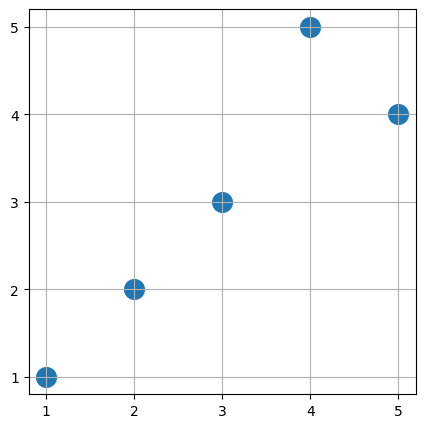

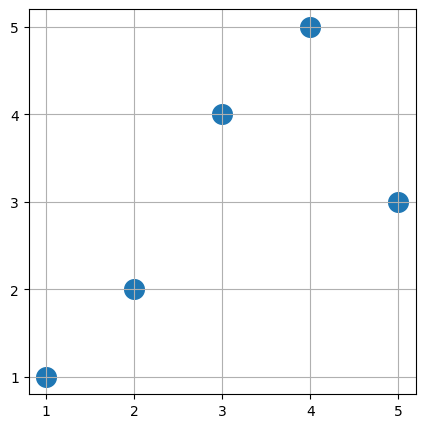

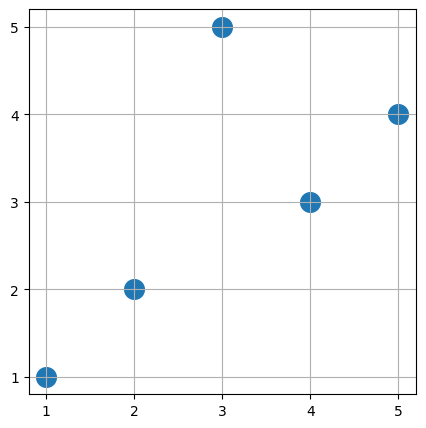

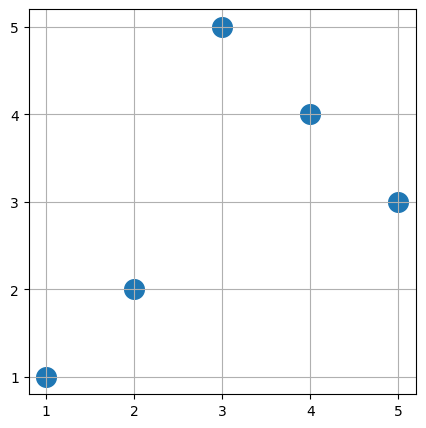

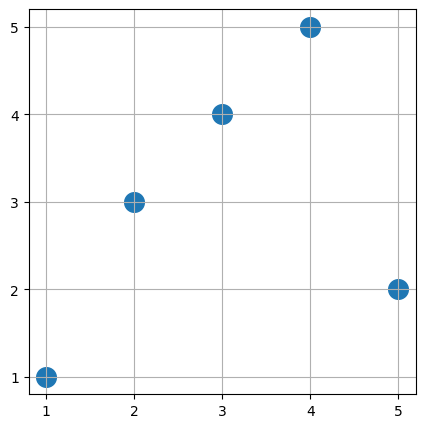

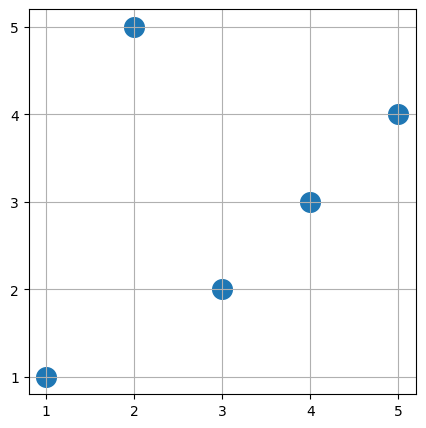

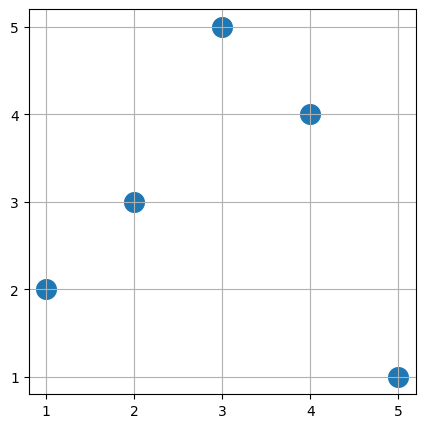

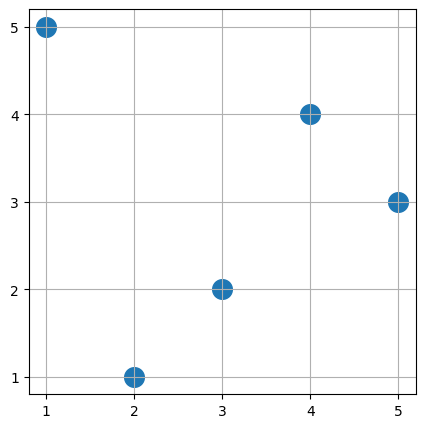

In [105]:
print(len(conjure_solutions))
for p in conjure_solutions:
  plotPermutation(p["perm"])

## Step 3

The permutations are minus-decomposable.

In [106]:
%%conjure+ --number-of-solutions=all --solver=minion
$ perm is minus-decomposable
such that
    exists sep : int(1..length-1) .
        min([ perm(i) | i : int(1..sep) ]) > max([ perm(i) | i : int(sep+1..length) ])

```json
{"conjure_solutions": [{"perm": [2, 3, 5, 4, 1], "permPadded": {"0": 0, "1": 2, "2": 3, "3": 5, "4": 4, "5": 1, "6": 6}}, {"perm": [5, 1, 2, 4, 3], "permPadded": {"0": 0, "1": 5, "2": 1, "3": 2, "4": 4, "5": 3, "6": 6}}]}
```

2


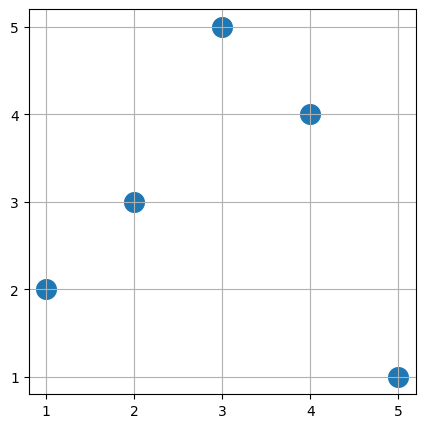

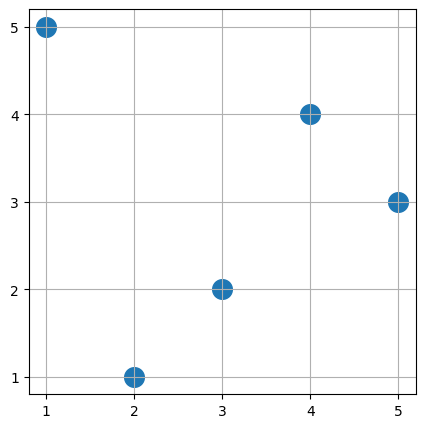

In [107]:
print(len(conjure_solutions))
for p in conjure_solutions:
  plotPermutation(p["perm"])

## Step 4

The permutations are involutions.

In [112]:
%%conjure+ --number-of-solutions=all --solver=minion
such that
    forAll i : int(1..length) .
        perm(perm(i)) = i

KeyboardInterrupt: ignored

In [ ]:
print(len(conjure_solutions))

## 1324-avoiding permutations with a fixed number of inversions

Find all permutations of length 5 which avoid 1324, with a fixed number (9) of inversions.

In [110]:
length = 5
classic_avoidance = [[1,3,2,4]]
nInversions = 9

In [111]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given classic_avoidance : set of sequence of int
given nInversions : int

find perm : sequence (size length, injective) of int(1..length)

such that
    nInversions =
        sum([ 1
            | i,j : int(1..length)
            , i < j
            , perm(i) > perm(j)
            ])

such that
    forAll pattern in classic_avoidance .
        !(exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length) .
            (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2])))

```json
{"conjure_solutions": [{"perm": [4, 5, 3, 2, 1]}, {"perm": [5, 3, 4, 2, 1]}, {"perm": [5, 4, 2, 3, 1]}, {"perm": [5, 4, 3, 1, 2]}]}
```

4


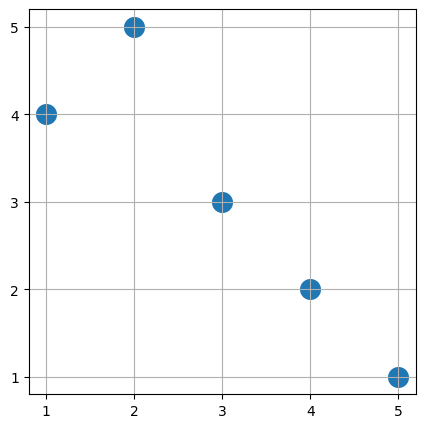

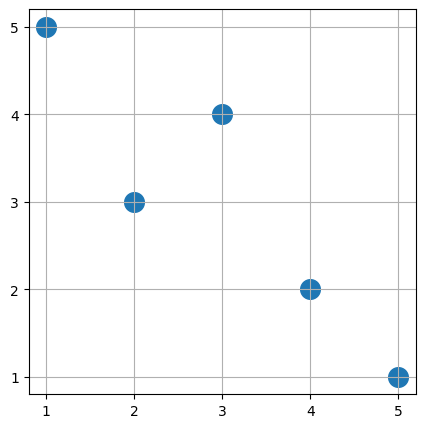

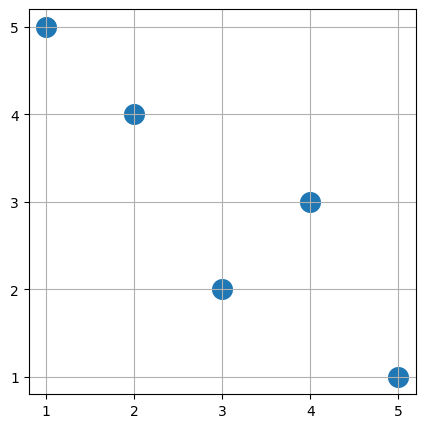

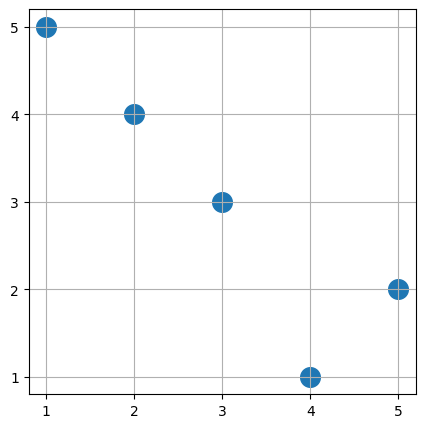

In [113]:
print(len(conjure_solutions))
for p in conjure_solutions:
  plotPermutation(p["perm"])